In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn
from pandas import DataFrame
from tqdm import tqdm
from imblearn.under_sampling import RandomUnderSampler #アンダーサンプリング用
from sklearn.model_selection import train_test_split
import pickle
# 機械学習用
from sklearn.cluster import KMeans #クラスタリング用
from sklearn.decomposition import PCA  #次元削減用
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト
from copy import deepcopy as cp
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression as LR
import time
import datetime
import os #ディレクトリ作成用
import xgboost as xgb
import sys


#自作のモジュールのインポート
import module.master as master
import module.graph as graph
import module.trans_text_code as trans
import module.data_making as making
import module.model_analysis as analysis#今回メインで使うモデル分析用のモジュール


from sklearn.preprocessing import StandardScaler#モデルの評価用に標準化する関数
import scipy.stats#モデルの評価用に標準化する関数

pd.set_option('display.width',400)#勝手に改行コードを入れられるのを防ぐ

# スコア格納用の箱の作成と名前の取得

In [2]:
place_master=master.get_place_master()
for place in place_master.items():
    #print(place[0],place[1],'\n')
    place_name=place[1]
    dir_path = "../bot_database/{place_name}/model_score_{place_name}/good_model/".format(place_name=place_name)#作成したデータの書き込み先#使用するデータの読み込み
    if os.path.exists(dir_path)==False:
        os.makedirs(dir_path)
    else:
        pass
    

## 分析対象のモデルスコアシート

In [3]:

#データ格納用のディレクトリ作り
version='V2_2'#バージョン


place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の学習したモデルのスコアの読み込み
    score_file_path= "../bot_database/{place_name}/model_score_{place_name}/{place_name}_model_score_{V}.csv".format(place_name=place_name,V=version)#作成したデータの書き込み先#使用するデータの読み込み
    score_df=pd.read_csv(score_file_path)
    score_df=score_df.drop(["Unnamed: 0"],axis=1)
    
    
    #analysis.model_analysis(score_df,place_name,version)
    analysis.model_analysis_2_2(score_df,place_name,version)

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [03:09<00:00,  7.89s/it]


In [4]:
place_master=master.get_place_master()
for place in place_master.items():
    #print(place[0],place[1],'\n')
    place_name=place[1]
    dir_path = "../bot_database/{place_name}/model_score_{place_name}/use_model/".format(place_name=place_name)#作成したデータの書き込み先#使用するデータの読み込み
    if os.path.exists(dir_path)==False:
        os.makedirs(dir_path)
    else:
        pass
    

## good_modelのスコアからさらに一つのcomごとに一つのモデルに絞り込む

In [5]:

#データ格納用のディレクトリ作り
#version='V2_1'#バージョ
version='V2_2'#バージョン


place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の成績の良かったモデルのスコアの読み込み
    dir_path = "../bot_database/{place_name}/model_score_{place_name}/good_model/good_model_{place_name}_{V}.csv".format(place_name=place_name,V=version)#作成したデータの書き込み先#使用するデータの読み込み
    good_score_df=pd.read_csv(dir_path)
    good_score_df=good_score_df.drop(["Unnamed: 0"],axis=1)
    
    
    analysis.use_model_para(good_score_df,place_name,version)

  0%|                                                                                           | 0/24 [00:00<?, ?it/s]C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zsc

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

kiryu
toda
edogawa
heiwazima
tamagawa


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

hamanako


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['score']=target_com_df['的中数_std']+target_com_df['利益率_std']
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

 33%|███████████████████████████▋                                                       | 8/24 [00:00<00:00, 30.44it/s]C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zsc

gamagori
tokoname
tu
mikuni
biwako


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['score']=target_com_df['的中数_std']+target_com_df['利益率_std']
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

 50%|█████████████████████████████████████████                                         | 12/24 [00:00<00:00, 31.34it/s]

suminoe
amagasaki


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['score']=target_com_df['的中数_std']+target_com_df['利益率_std']
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

naruto
marugame
kozima
miyazima
tokuyama


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['score']=target_com_df['的中数_std']+target_com_df['利益率_std']
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

simonoseki
wakamatu


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['score']=target_com_df['的中数_std']+target_com_df['利益率_std']
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [00:00<00:00, 32.52it/s]C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['的中数_std']=scipy.stats.zscore(target_com_df['的中数'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zsc

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['score']=target_com_df['的中数_std']+target_com_df['利益率_std']
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['利益率_std']=scipy.stats.zscore(target_com_df['利益率'].values)
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_com_df['score']=target_com_df['的中数_std']+target_com_df['利益率_std']
C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\model_analysis.

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 32.31it/s]

asiya
fukuoka
karatu
omura


 ## use_modelを参考にモデルを保存する。

## モデル格納用の箱作り

In [6]:
place_master=master.get_place_master()
for place in place_master.items():
    #print(place[0],place[1],'\n')
    place_name=place[1]
    dir_path = "../bot_database/{place_name}/model_pickle_{place_name}/".format(place_name=place_name)#作成したデータの書き込み先#使用するデータの読み込み
    if os.path.exists(dir_path)==False:
        os.makedirs(dir_path)
    else:
        pass
    

## 予測用モデルの保存

In [2]:

#データ格納用のディレクトリ作り
version='V2_2'#バージョン


place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の成績の良かったモデルのスコアの読み込み
    dir_path = "../bot_database/{place_name}/{place_name}_train/train_{place_name}.csv".format(place_name=place_name)#学習のためのベースになるリザルトデータ
    result_base_df=pd.read_csv(dir_path)
    result_base_df=result_base_df.drop(["Unnamed: 0"],axis=1)

    model_dir_path = "../bot_database/{place_name}/model_score_{place_name}/use_model/use_model_{place_name}_{V}.csv".format(place_name=place_name,V=version)#使用するモデルのパラメータ読み込み
    use_model_df=pd.read_csv(model_dir_path)
    use_model_df=use_model_df.drop(["Unnamed: 0"],axis=1)

    making.save_model_V2_2(result_base_df,use_model_df,place_name,version)
    
    
    
    
    
    #model_analysis.use_model_para(good_score_df,place_name,version)

  0%|                                                                                           | 0/24 [00:00<?, ?it/s]

kiryu


  4%|███▍                                                                               | 1/24 [00:09<03:36,  9.42s/it]

toda


  8%|██████▉                                                                            | 2/24 [00:18<03:25,  9.34s/it]

edogawa


 12%|██████████▍                                                                        | 3/24 [00:36<04:41, 13.41s/it]

heiwazima


 17%|█████████████▊                                                                     | 4/24 [00:52<04:47, 14.37s/it]

tamagawa


 21%|█████████████████▎                                                                 | 5/24 [01:04<04:16, 13.48s/it]

hamanako


 25%|████████████████████▊                                                              | 6/24 [01:20<04:14, 14.16s/it]

gamagori


 29%|████████████████████████▏                                                          | 7/24 [01:35<04:08, 14.59s/it]

tokoname


 33%|███████████████████████████▋                                                       | 8/24 [01:49<03:51, 14.49s/it]

tu


 38%|███████████████████████████████▏                                                   | 9/24 [02:06<03:46, 15.13s/it]

mikuni


 42%|██████████████████████████████████▏                                               | 10/24 [02:17<03:13, 13.79s/it]

biwako


 46%|█████████████████████████████████████▌                                            | 11/24 [02:28<02:50, 13.10s/it]

suminoe


 50%|█████████████████████████████████████████                                         | 12/24 [02:40<02:32, 12.72s/it]

amagasaki


 54%|████████████████████████████████████████████▍                                     | 13/24 [02:53<02:19, 12.70s/it]

naruto


 58%|███████████████████████████████████████████████▊                                  | 14/24 [03:09<02:17, 13.70s/it]

marugame


 62%|███████████████████████████████████████████████████▎                              | 15/24 [03:19<01:52, 12.50s/it]

kozima


 67%|██████████████████████████████████████████████████████▋                           | 16/24 [03:32<01:41, 12.71s/it]

miyazima


 71%|██████████████████████████████████████████████████████████                        | 17/24 [03:40<01:19, 11.32s/it]

tokuyama


 75%|█████████████████████████████████████████████████████████████▌                    | 18/24 [03:52<01:08, 11.45s/it]

simonoseki


 79%|████████████████████████████████████████████████████████████████▉                 | 19/24 [04:08<01:04, 12.96s/it]

wakamatu


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [04:21<00:52, 13.09s/it]

asiya


 88%|███████████████████████████████████████████████████████████████████████▊          | 21/24 [04:30<00:35, 11.68s/it]

fukuoka


 92%|███████████████████████████████████████████████████████████████████████████▏      | 22/24 [04:37<00:20, 10.23s/it]

karatu


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 23/24 [04:50<00:11, 11.04s/it]

omura


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [05:08<00:00, 12.83s/it]


## 学習データのラベル付けのためのモデルを保存。

In [3]:

#データ格納用のディレクトリ作り
version='V2_2'#バージョン


place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の成績の良かったモデルのスコアの読み込み
    dir_path = "../bot_database/{place_name}/{place_name}_train/train_{place_name}.csv".format(place_name=place_name)#学習のためのベースになるリザルトデータ
    result_base_df=pd.read_csv(dir_path)
    result_base_df=result_base_df.drop(["Unnamed: 0"],axis=1)

    analysis.save_clustar_model(result_base_df,place_name,version)
    
    
    
    
    
    #model_analysis.use_model_para(good_score_df,place_name,version)

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:45<00:00,  1.90s/it]


# モデルを全部pickleで読み込んでテスト

In [3]:

#データ格納用のディレクトリ作り

version='V2_2'#バージョン



place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の成績の良かったモデルのスコアの読み込み
    dir_path = "../bot_database/{place_name}/{place_name}_train/train_{place_name}.csv".format(place_name=place_name)#学習のためのベースになるリザルトデータ
    result_base_df=pd.read_csv(dir_path)
    result_base_df=result_base_df.drop(["Unnamed: 0"],axis=1)

    model_dir_path = "../bot_database/{place_name}/model_score_{place_name}/use_model/use_model_{place_name}_{V}.csv".format(place_name=place_name,V=version)#使用するモデルのパラメータ読み込み
    use_model_df=pd.read_csv(model_dir_path)
    use_model_df=use_model_df.drop(["Unnamed: 0"],axis=1)

    analysis.check_model_V2_2(result_base_df,use_model_df,place_name,version)
    
    
    
    
    
    #model_analysis.use_model_para(good_score_df,place_name,version)



  0%|                                                                                           | 0/24 [00:00<?, ?it/s]

kiryu


  4%|███▍                                                                               | 1/24 [00:02<01:04,  2.79s/it]

toda


  8%|██████▉                                                                            | 2/24 [00:05<01:02,  2.82s/it]

edogawa


 12%|██████████▍                                                                        | 3/24 [00:11<01:29,  4.25s/it]

heiwazima


 17%|█████████████▊                                                                     | 4/24 [00:16<01:29,  4.50s/it]

tamagawa


 21%|█████████████████▎                                                                 | 5/24 [00:20<01:19,  4.19s/it]

hamanako


 25%|████████████████████▊                                                              | 6/24 [00:25<01:20,  4.49s/it]

gamagori


 29%|████████████████████████▏                                                          | 7/24 [00:30<01:19,  4.70s/it]

tokoname


 33%|███████████████████████████▋                                                       | 8/24 [00:35<01:15,  4.71s/it]

tu


 38%|███████████████████████████████▏                                                   | 9/24 [00:40<01:13,  4.92s/it]

mikuni


 42%|██████████████████████████████████▏                                               | 10/24 [00:43<01:02,  4.44s/it]

biwako


 46%|█████████████████████████████████████▌                                            | 11/24 [00:47<00:54,  4.21s/it]

suminoe


 50%|█████████████████████████████████████████                                         | 12/24 [00:51<00:48,  4.04s/it]

amagasaki


 54%|████████████████████████████████████████████▍                                     | 13/24 [00:55<00:44,  4.03s/it]

naruto


 58%|███████████████████████████████████████████████▊                                  | 14/24 [01:00<00:44,  4.44s/it]

marugame


 62%|███████████████████████████████████████████████████▎                              | 15/24 [01:03<00:35,  3.97s/it]

kozima


 67%|██████████████████████████████████████████████████████▋                           | 16/24 [01:07<00:32,  4.04s/it]

miyazima


 71%|██████████████████████████████████████████████████████████                        | 17/24 [01:10<00:24,  3.55s/it]

tokuyama


 75%|█████████████████████████████████████████████████████████████▌                    | 18/24 [01:13<00:21,  3.64s/it]

simonoseki


 79%|████████████████████████████████████████████████████████████████▉                 | 19/24 [01:19<00:20,  4.14s/it]

wakamatu


 83%|████████████████████████████████████████████████████████████████████▎             | 20/24 [01:23<00:16,  4.10s/it]

asiya


 88%|███████████████████████████████████████████████████████████████████████▊          | 21/24 [01:25<00:10,  3.61s/it]

fukuoka


 92%|███████████████████████████████████████████████████████████████████████████▏      | 22/24 [01:27<00:06,  3.11s/it]

karatu


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 23/24 [01:31<00:03,  3.41s/it]

omura


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [01:37<00:00,  4.07s/it]


## 年、月ごとの利益率の推移を見る。

In [3]:
# 箱作り
place_master=master.get_place_master()
for place in place_master.items():
    #print(place[0],place[1],'\n')
    place_name=place[1]
    dir_path="../bot_database/{place_name}/model_analysis_{place_name}/monthly_score/".format(place_name=place_name)#作成したデータの書き込み先#使用するデータの読み込み
    if os.path.exists(dir_path)==False:
        os.makedirs(dir_path)
    else:
        pass


  0%|                                                                                           | 0/24 [00:00<?, ?it/s]

kiryu
2019
利益率平均 1.0181431608788094
kiryu


  4%|███▍                                                                               | 1/24 [00:09<03:41,  9.64s/it]

2020
利益率平均 0.8905660377358491
toda
2019
利益率平均 1.3231908831908832
toda


  8%|██████▉                                                                            | 2/24 [00:18<03:26,  9.40s/it]

2020
利益率平均 1.1401515151515151
edogawa
2019
利益率平均 1.1408201744049022
edogawa


 12%|██████████▍                                                                        | 3/24 [00:29<03:26,  9.85s/it]

2020
利益率平均 1.170875
heiwazima
2019
利益率平均 0.9785688207374954
heiwazima


 17%|█████████████▊                                                                     | 4/24 [00:40<03:29, 10.47s/it]

2020
利益率平均 0.9283933024581403
tamagawa
2019
利益率平均 0.9678691275167786
tamagawa


 21%|█████████████████▎                                                                 | 5/24 [00:51<03:18, 10.45s/it]

2020
利益率平均 1.0863636363636364
hamanako
2019
利益率平均 0.9519119351100811
hamanako


 25%|████████████████████▊                                                              | 6/24 [01:02<03:12, 10.69s/it]

2020
利益率平均 1.112803180914513
gamagori
2019
利益率平均 1.1311003123915306
gamagori


 29%|████████████████████████▏                                                          | 7/24 [01:13<03:03, 10.77s/it]

2020
利益率平均 0.9032424465733235
tokoname
2019
利益率平均 0.9694542877391921
tokoname


 33%|███████████████████████████▋                                                       | 8/24 [01:24<02:54, 10.91s/it]

2020
利益率平均 1.122076923076923
tu
2019
利益率平均 1.1542230517965468
tu


 38%|███████████████████████████████▏                                                   | 9/24 [01:35<02:44, 10.97s/it]

2020
利益率平均 1.0602708803611738
mikuni
2019
利益率平均 1.1526701570680629
mikuni


 42%|██████████████████████████████████▏                                               | 10/24 [01:45<02:28, 10.58s/it]

2020
利益率平均 0.9263703703703704
biwako
2019
利益率平均 1.0219233355749833
biwako


C:\Users\takuma\nabepy\boatracer_BOT_making\boatrace_bot_factry\module\graph.py:204: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)
 46%|█████████████████████████████████████▌                                            | 11/24 [01:54<02:13, 10.27s/it]

2020
利益率平均 1.0093303235515425
suminoe
2019
利益率平均 0.9764432647644327
suminoe


 50%|█████████████████████████████████████████                                         | 12/24 [02:04<02:01, 10.15s/it]

2020
利益率平均 0.9817345597897503
amagasaki
2019
利益率平均 1.1092651757188499
amagasaki


 54%|████████████████████████████████████████████▍                                     | 13/24 [02:14<01:50, 10.04s/it]

2020
利益率平均 1.2296137339055795
naruto
2019
利益率平均 1.0103846153846154
naruto


 58%|███████████████████████████████████████████████▊                                  | 14/24 [02:24<01:39,  9.95s/it]

2020
利益率平均 0.9617832283725555
marugame
2019
利益率平均 0.9771731448763251
marugame


 62%|███████████████████████████████████████████████████▎                              | 15/24 [02:34<01:31, 10.15s/it]

2020
利益率平均 1.0507142857142857
kozima
2019
利益率平均 0.8700214132762313
kozima


 67%|██████████████████████████████████████████████████████▋                           | 16/24 [02:45<01:22, 10.37s/it]

2020
利益率平均 1.3257738471257108
miyazima
2019
利益率平均 0.8308360477741585
miyazima


 71%|██████████████████████████████████████████████████████████                        | 17/24 [02:54<01:10, 10.05s/it]

2020
利益率平均 0.7691109074243813
tokuyama


 71%|██████████████████████████████████████████████████████████                        | 17/24 [02:59<01:13, 10.56s/it]


KeyError: "None of [Index([('p', 'r', 'e', 'd', '_', '1', '0'), ('p', 'r', 'e', 'd', '_', '1', '0')], dtype='object')] are in the [index]"

findfont: Font family ['VL Gothic'] not found. Falling back to DejaVu Sans.
c:\users\takuma\nabepy\env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['VL Gothic'] not found. Falling back to DejaVu Sans.
c:\users\takuma\nabepy\env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)


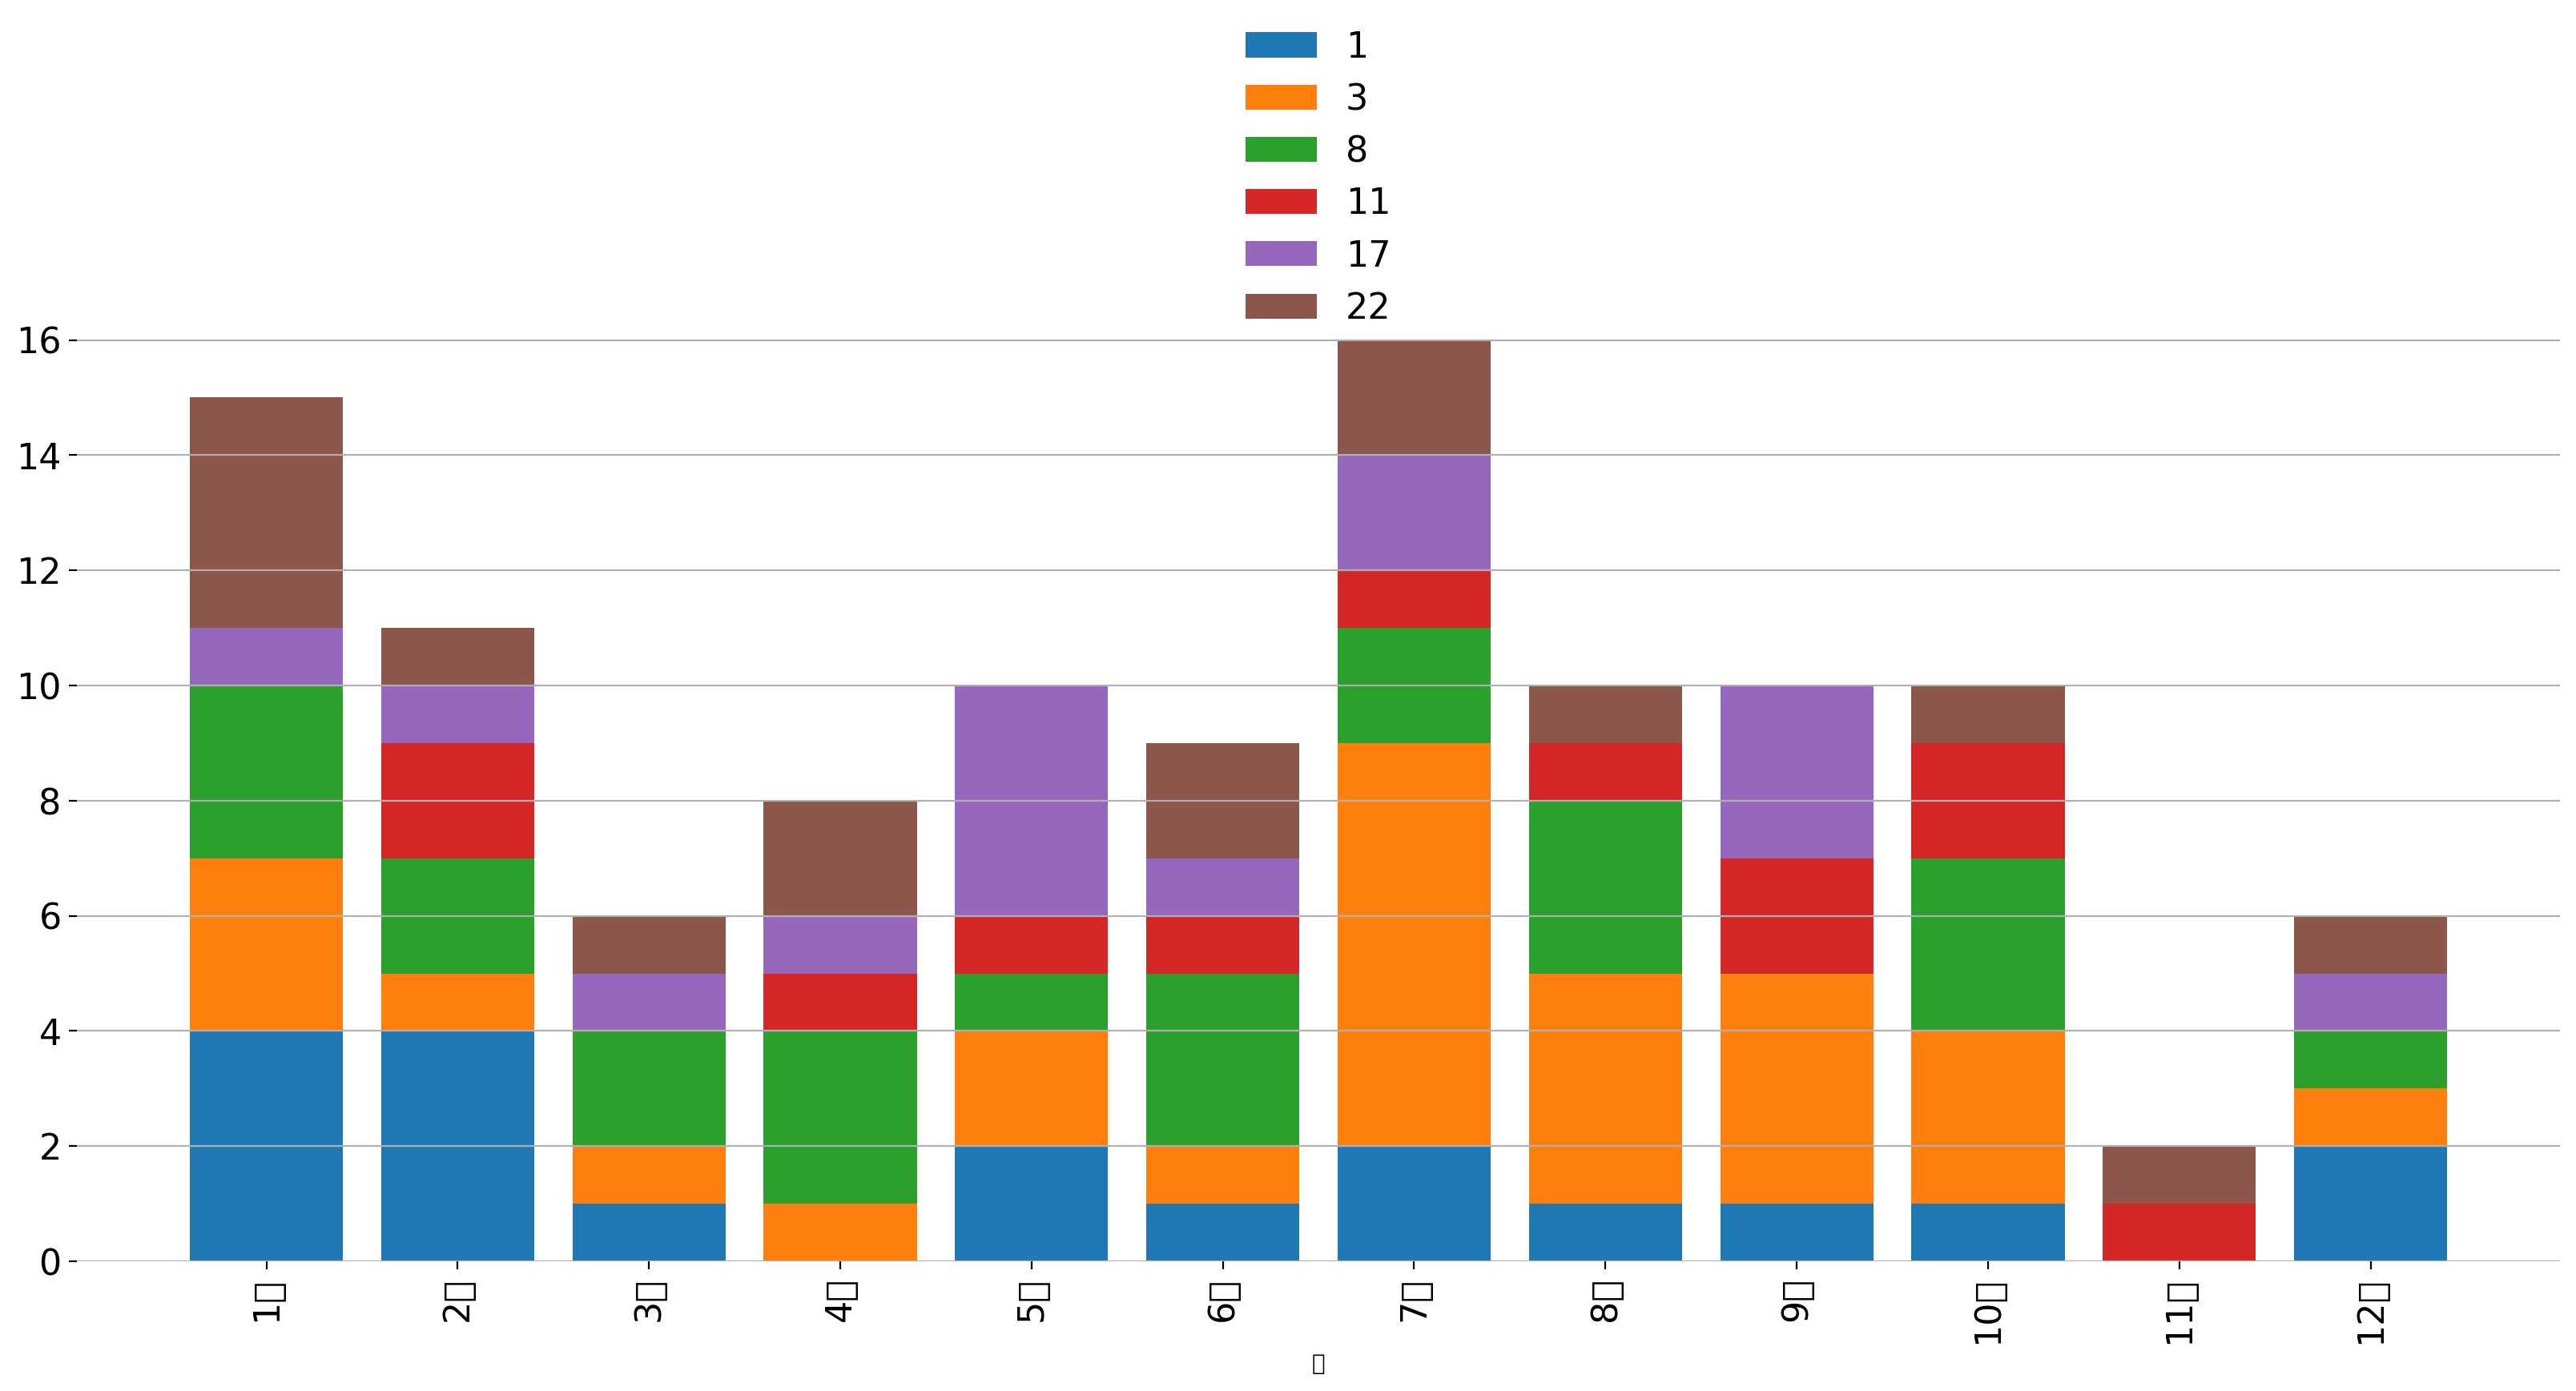

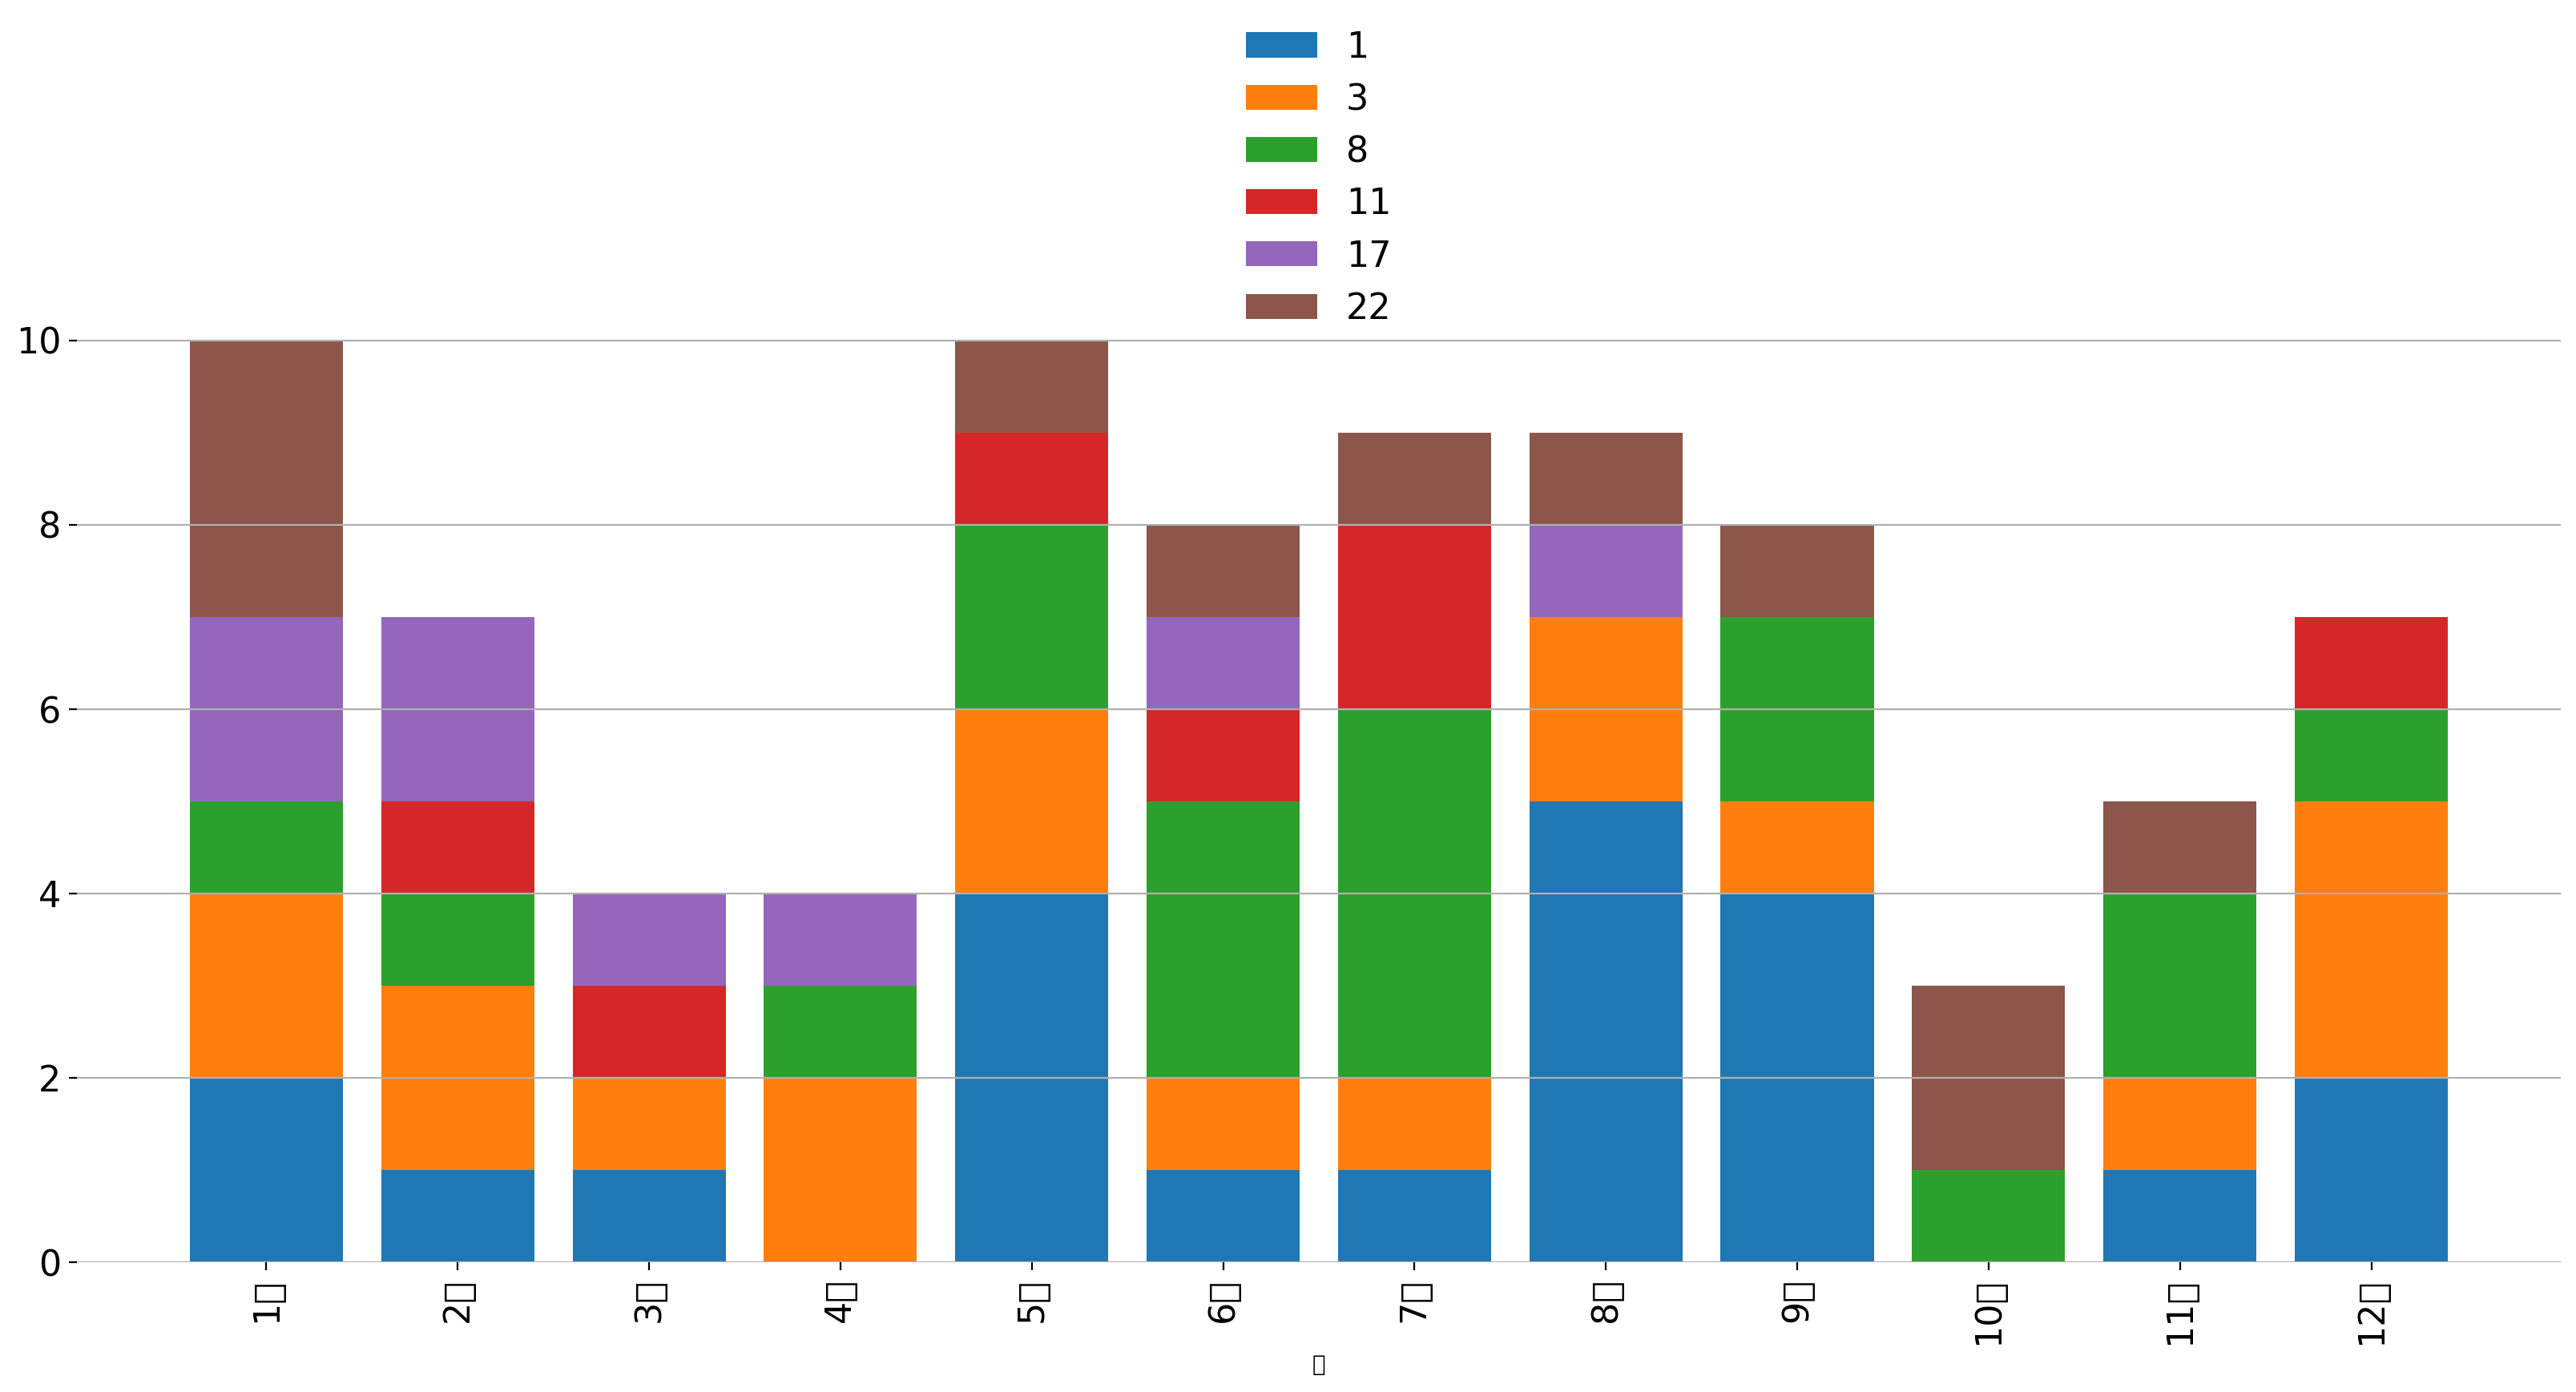

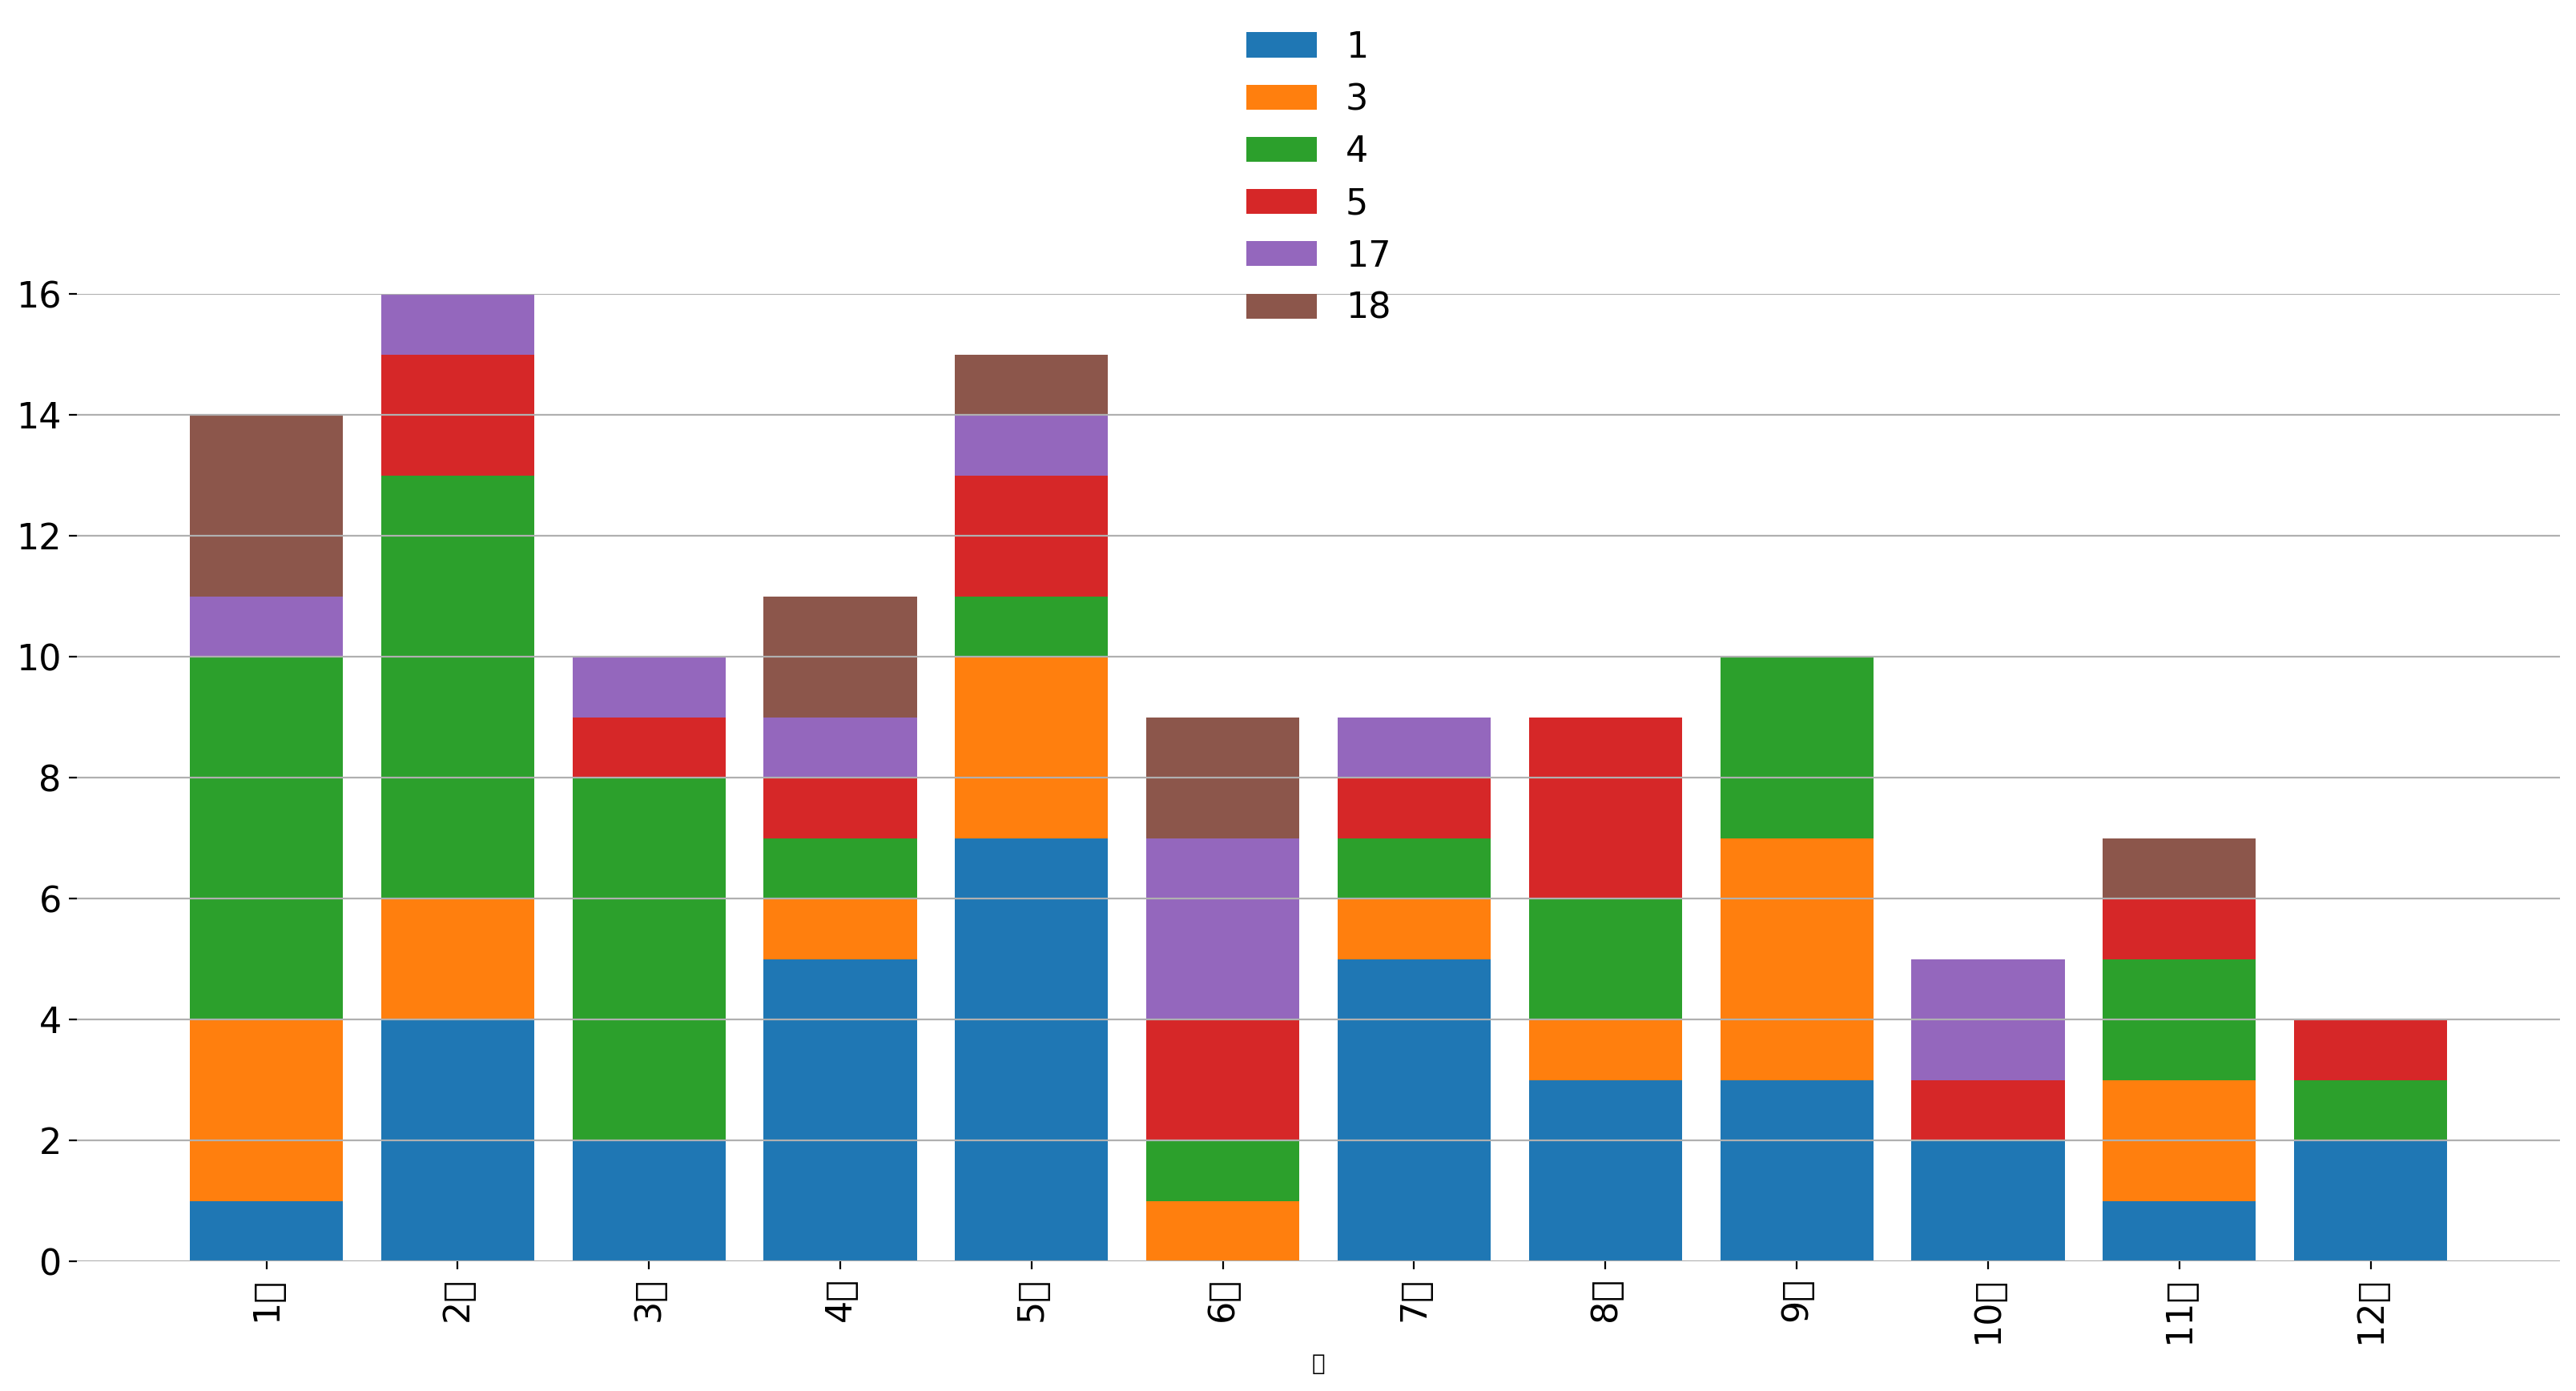

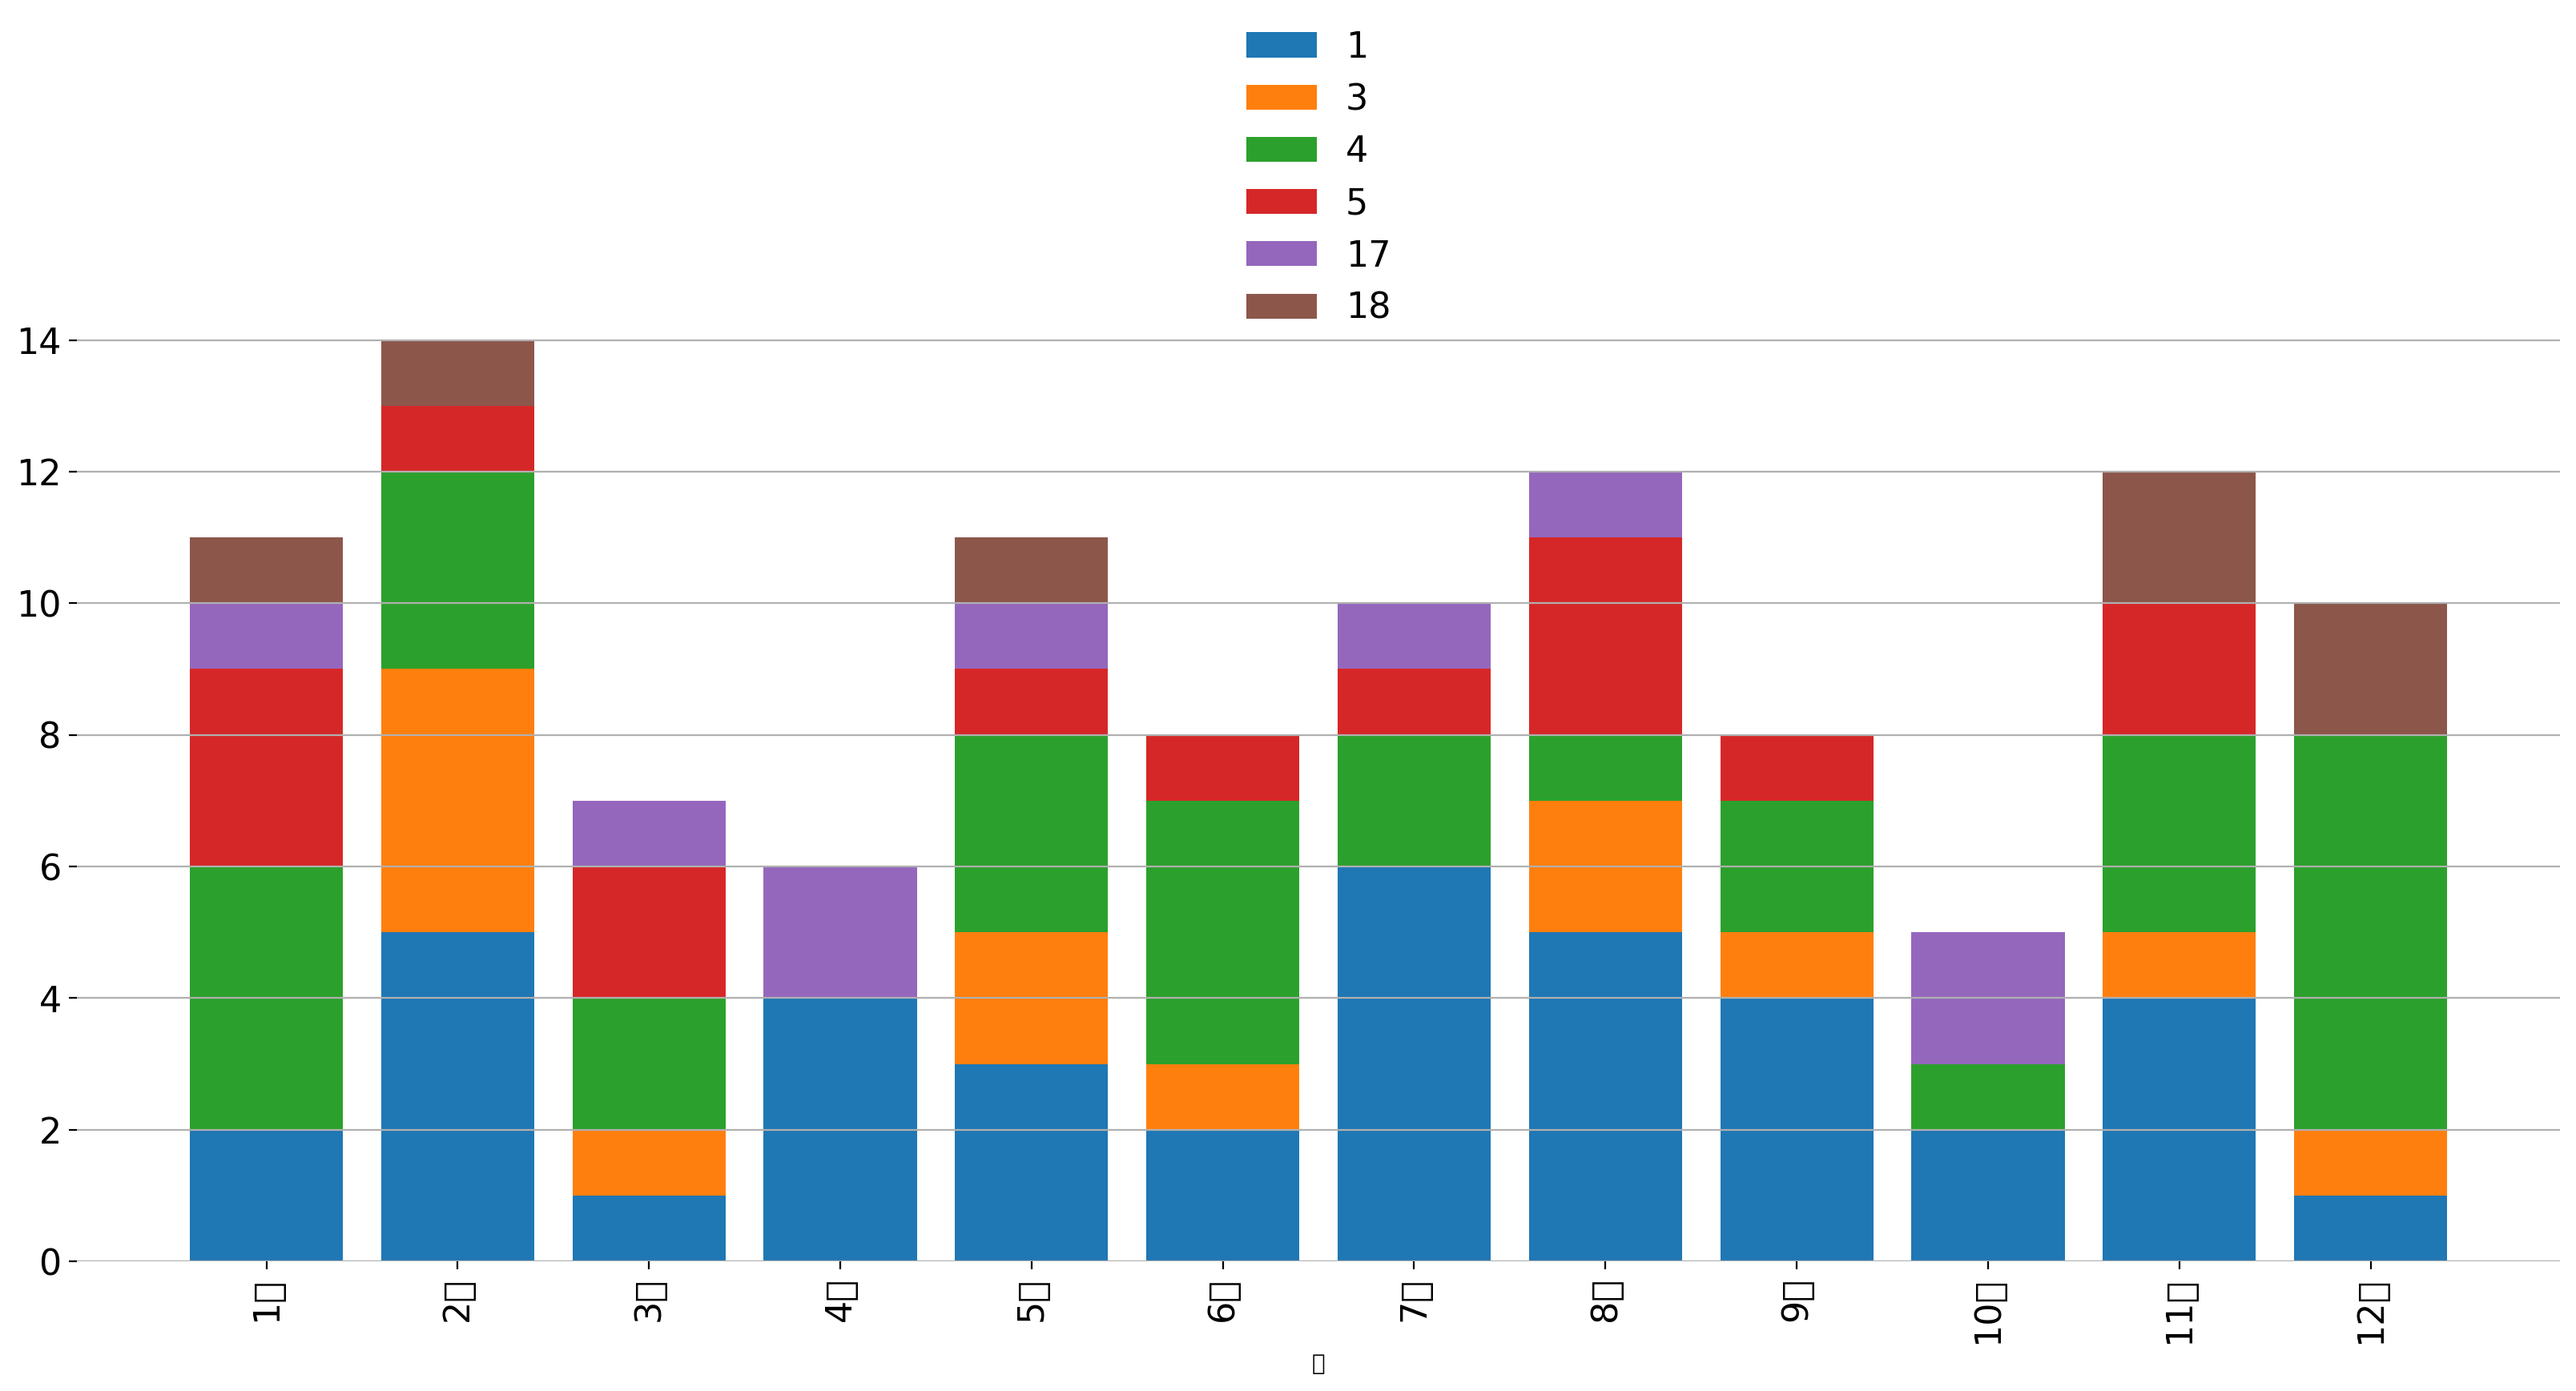

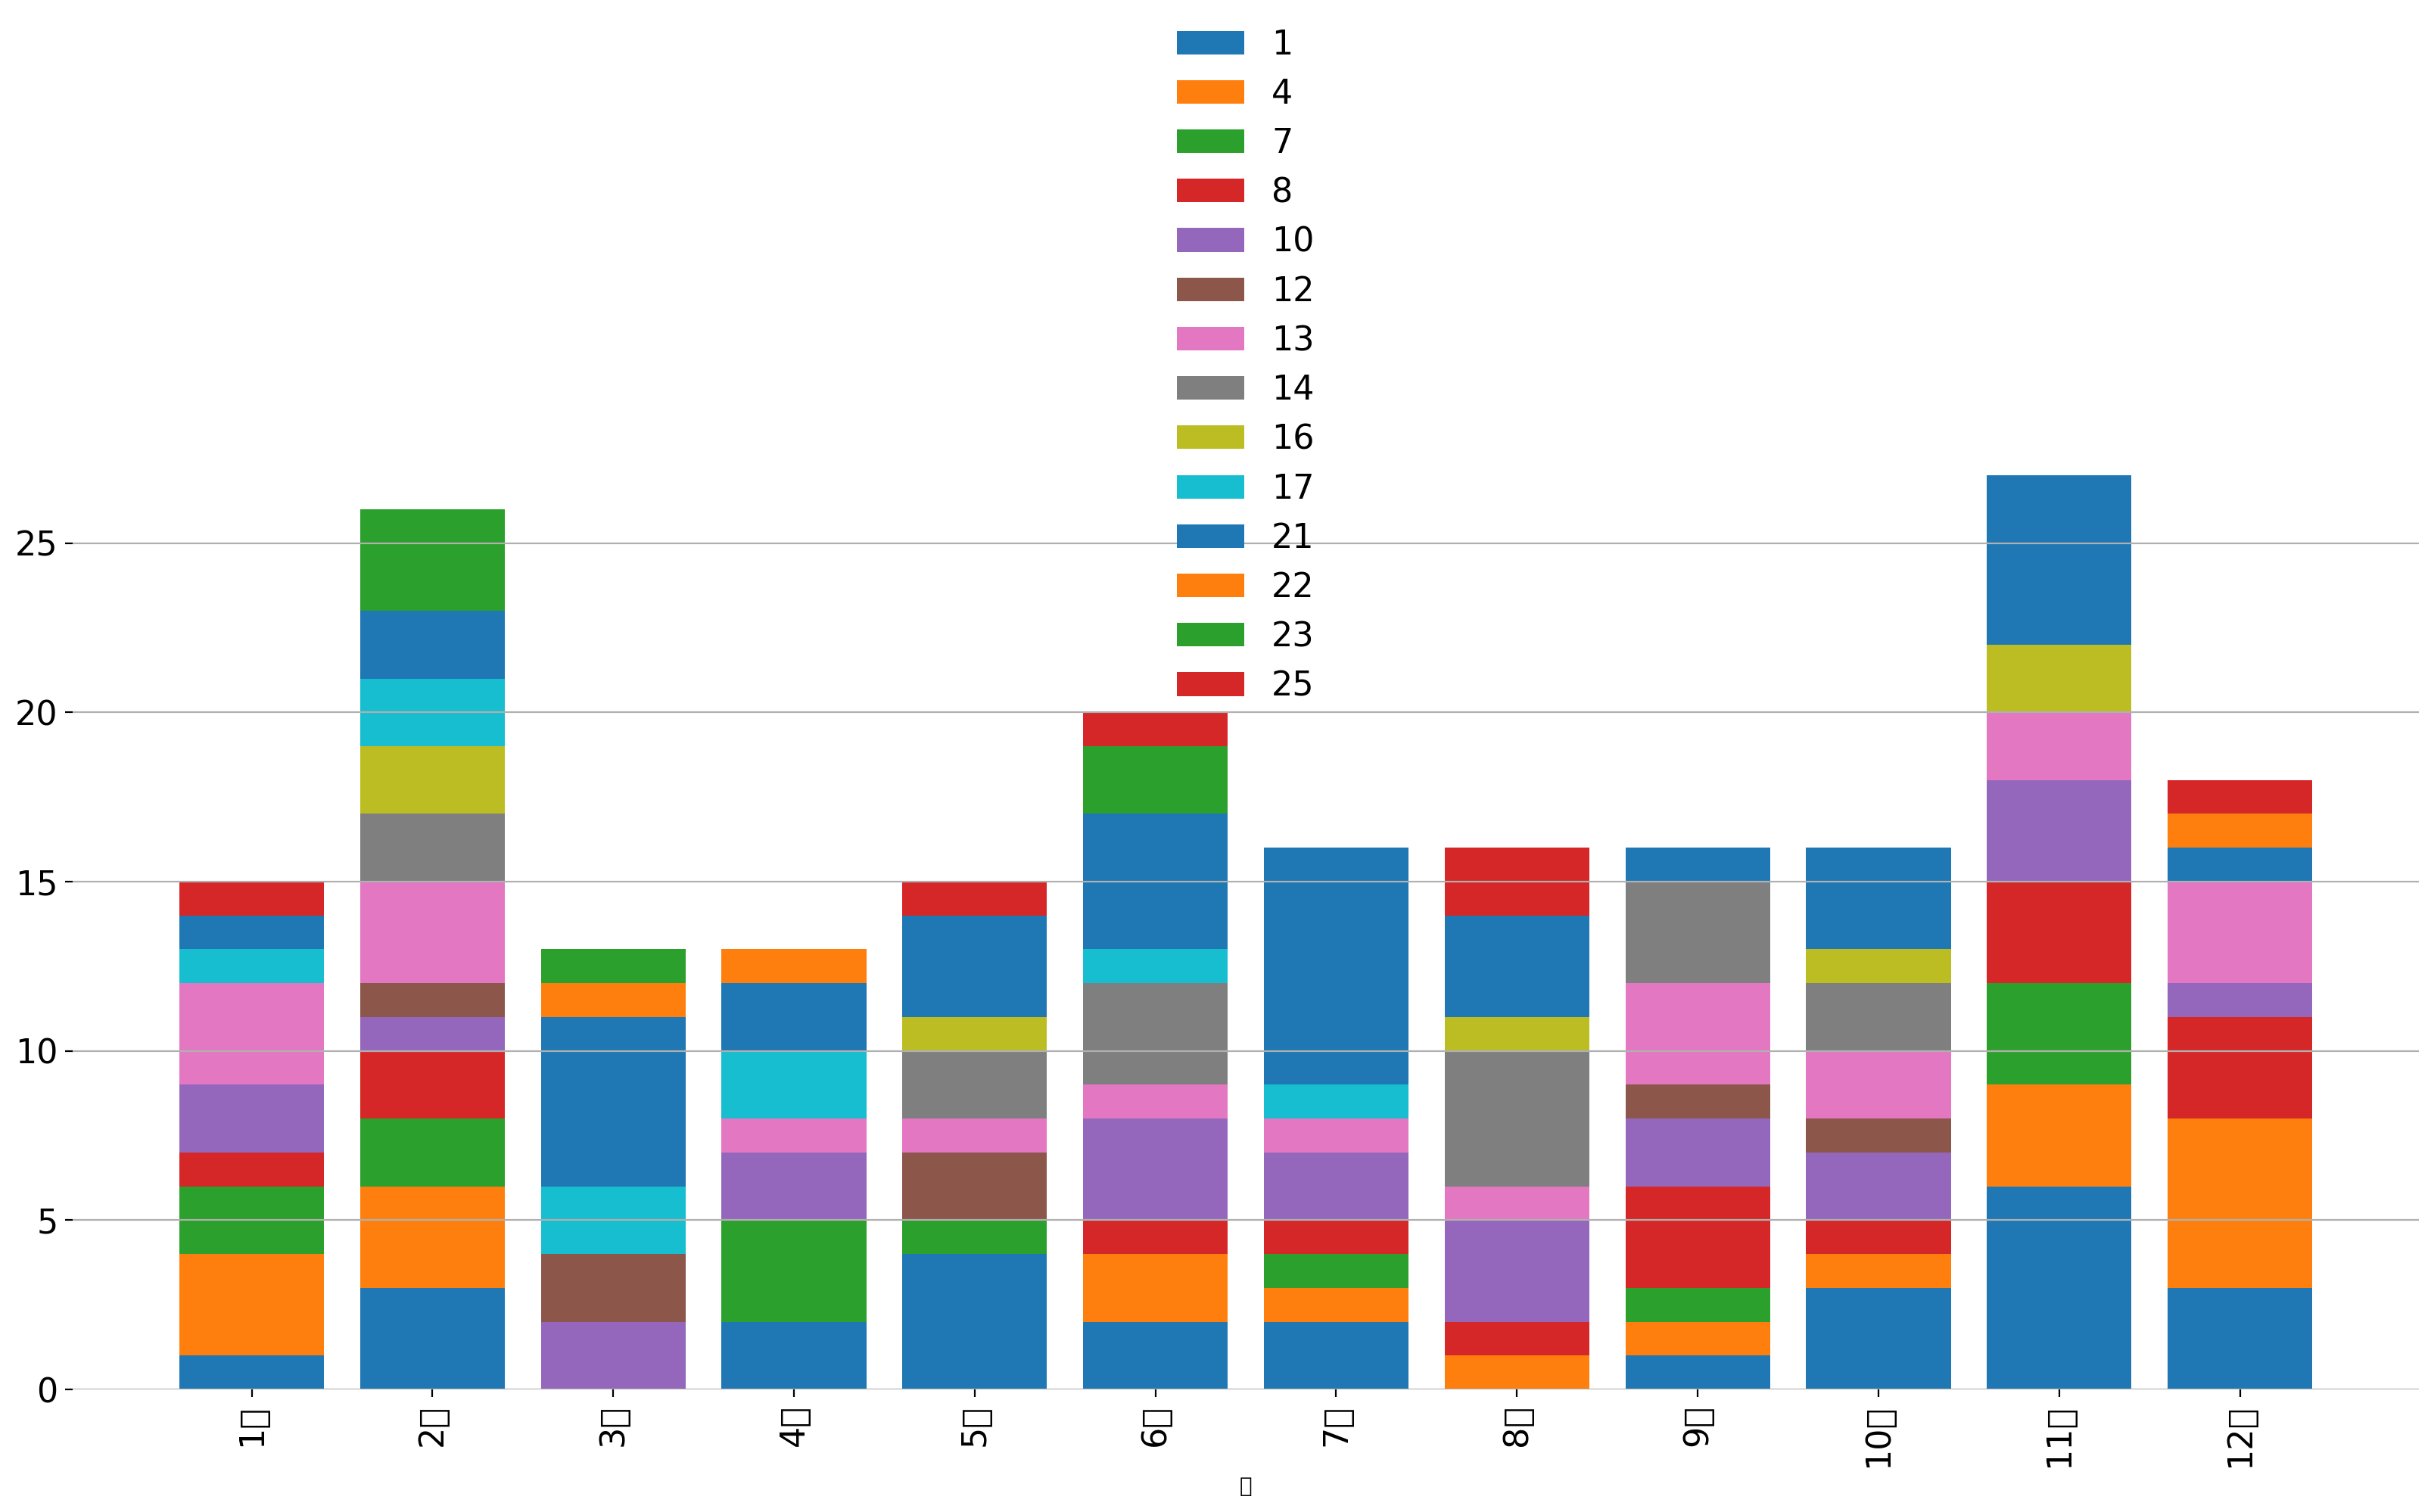

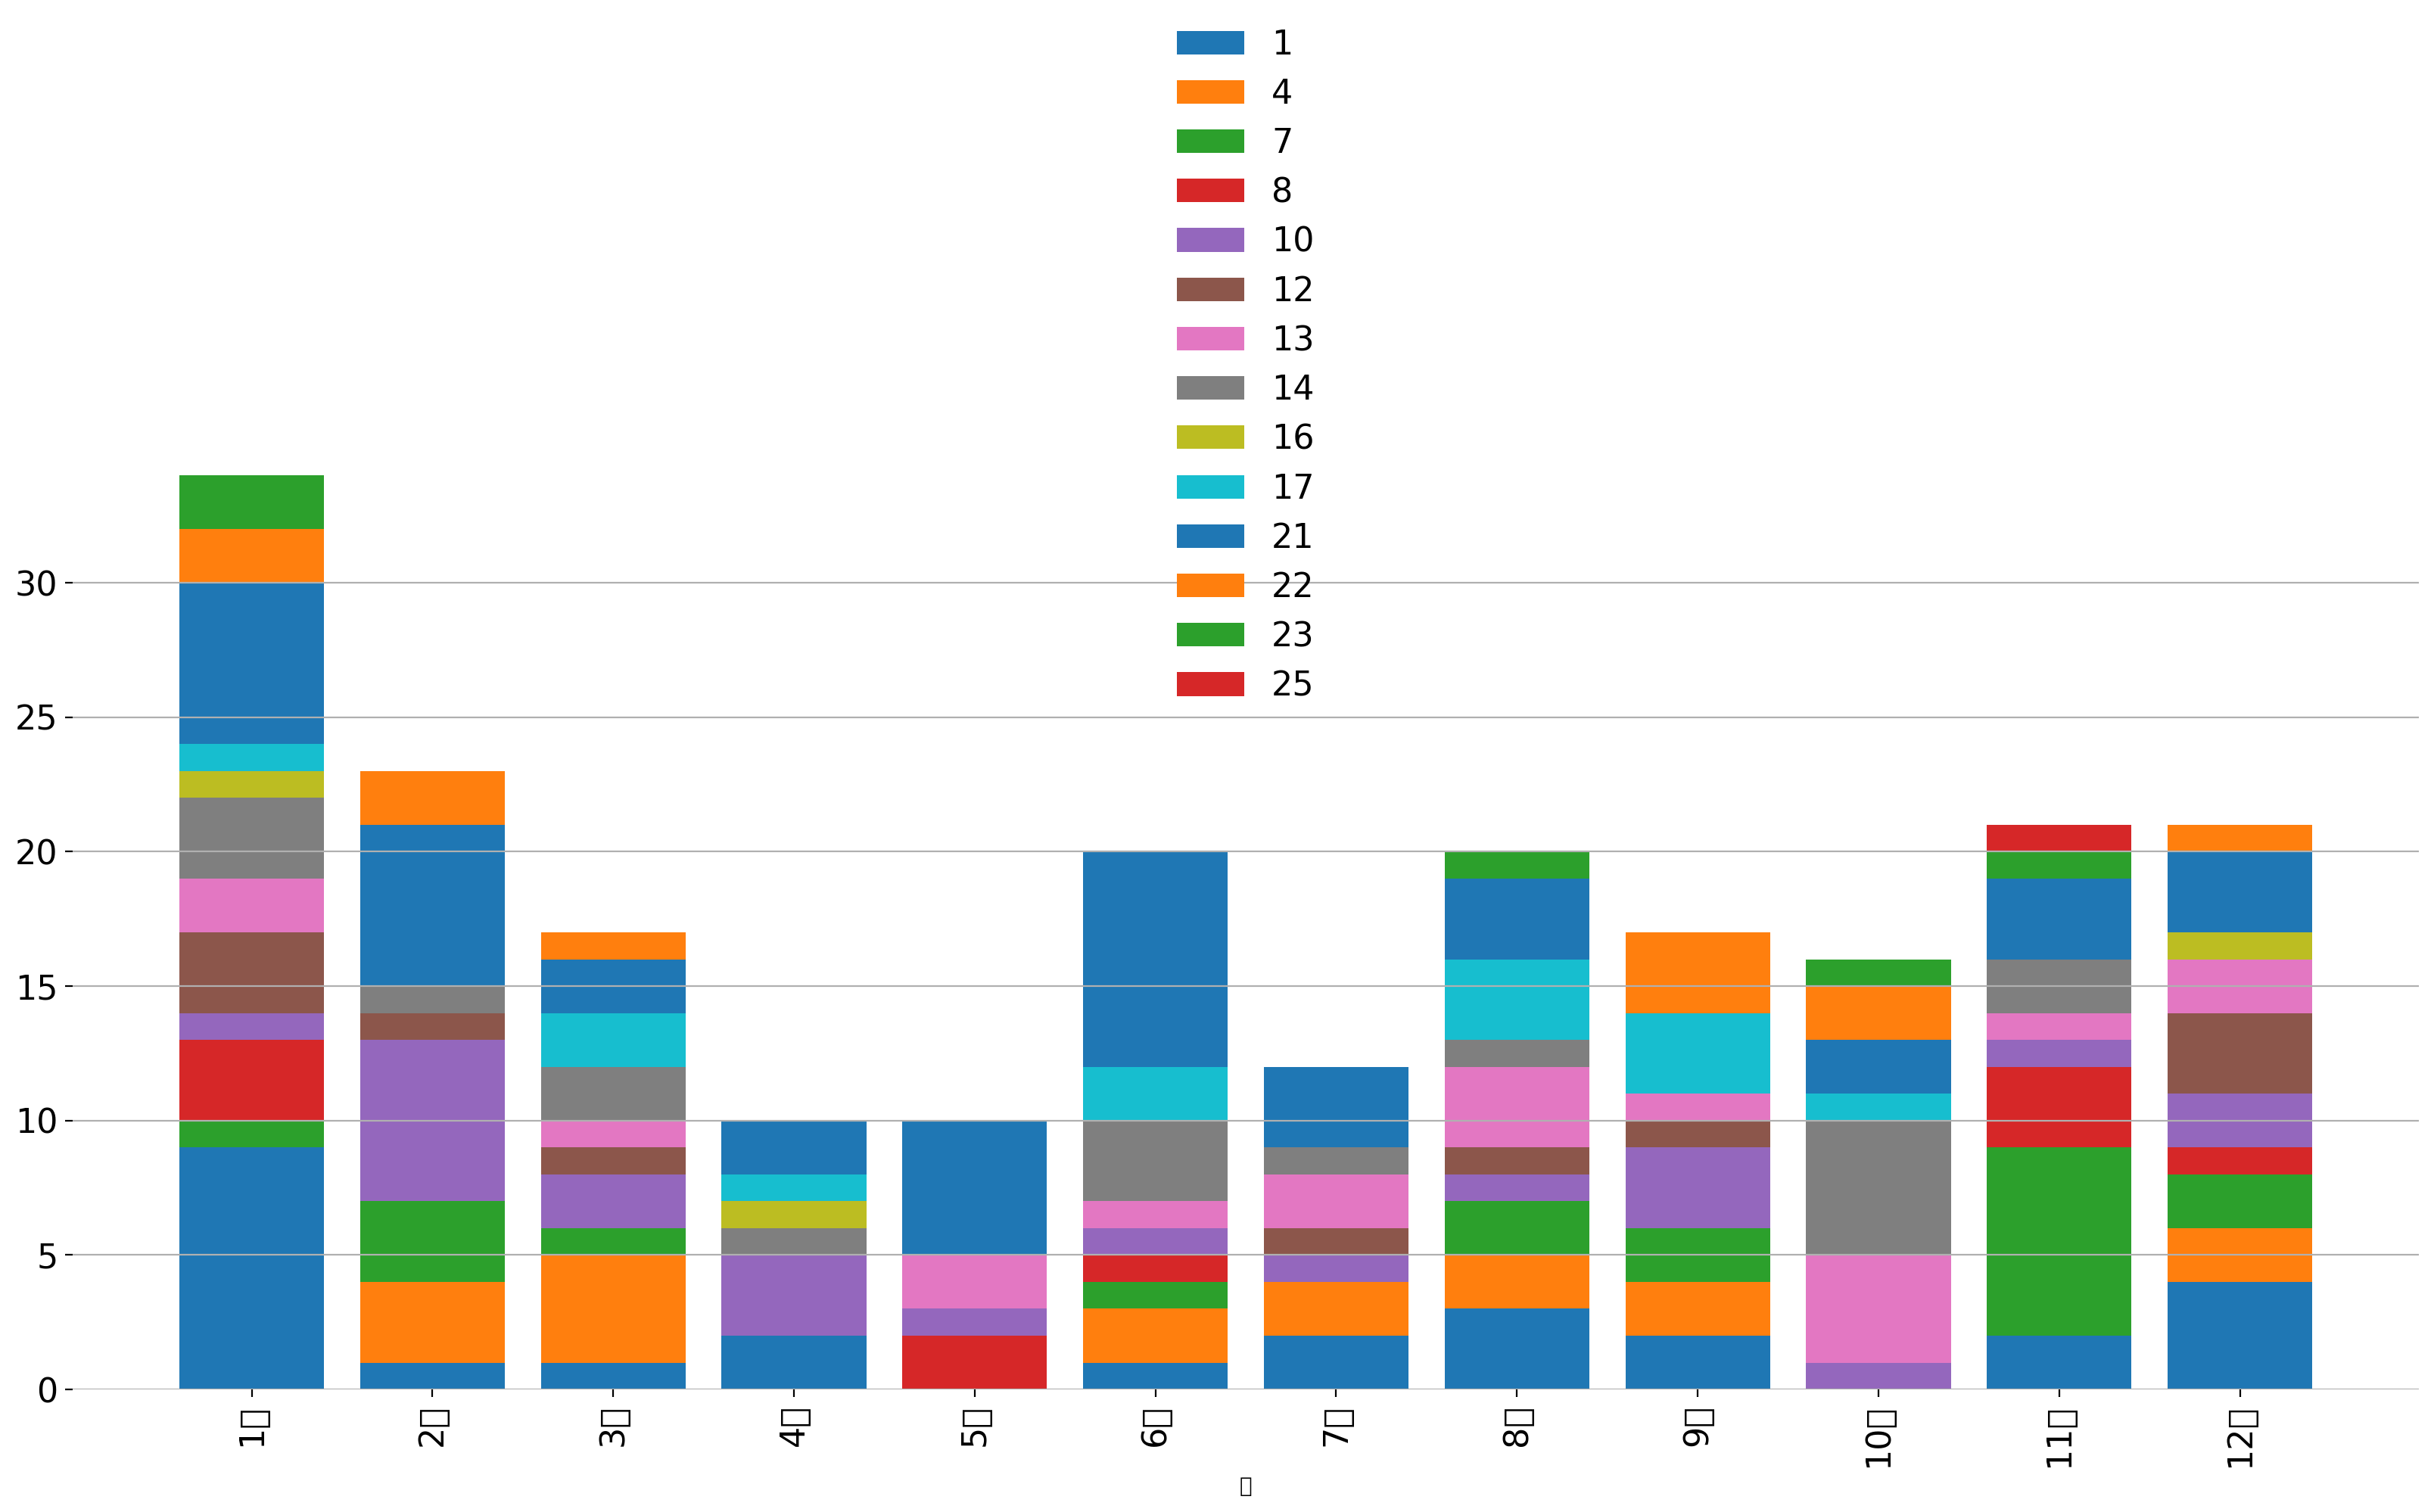

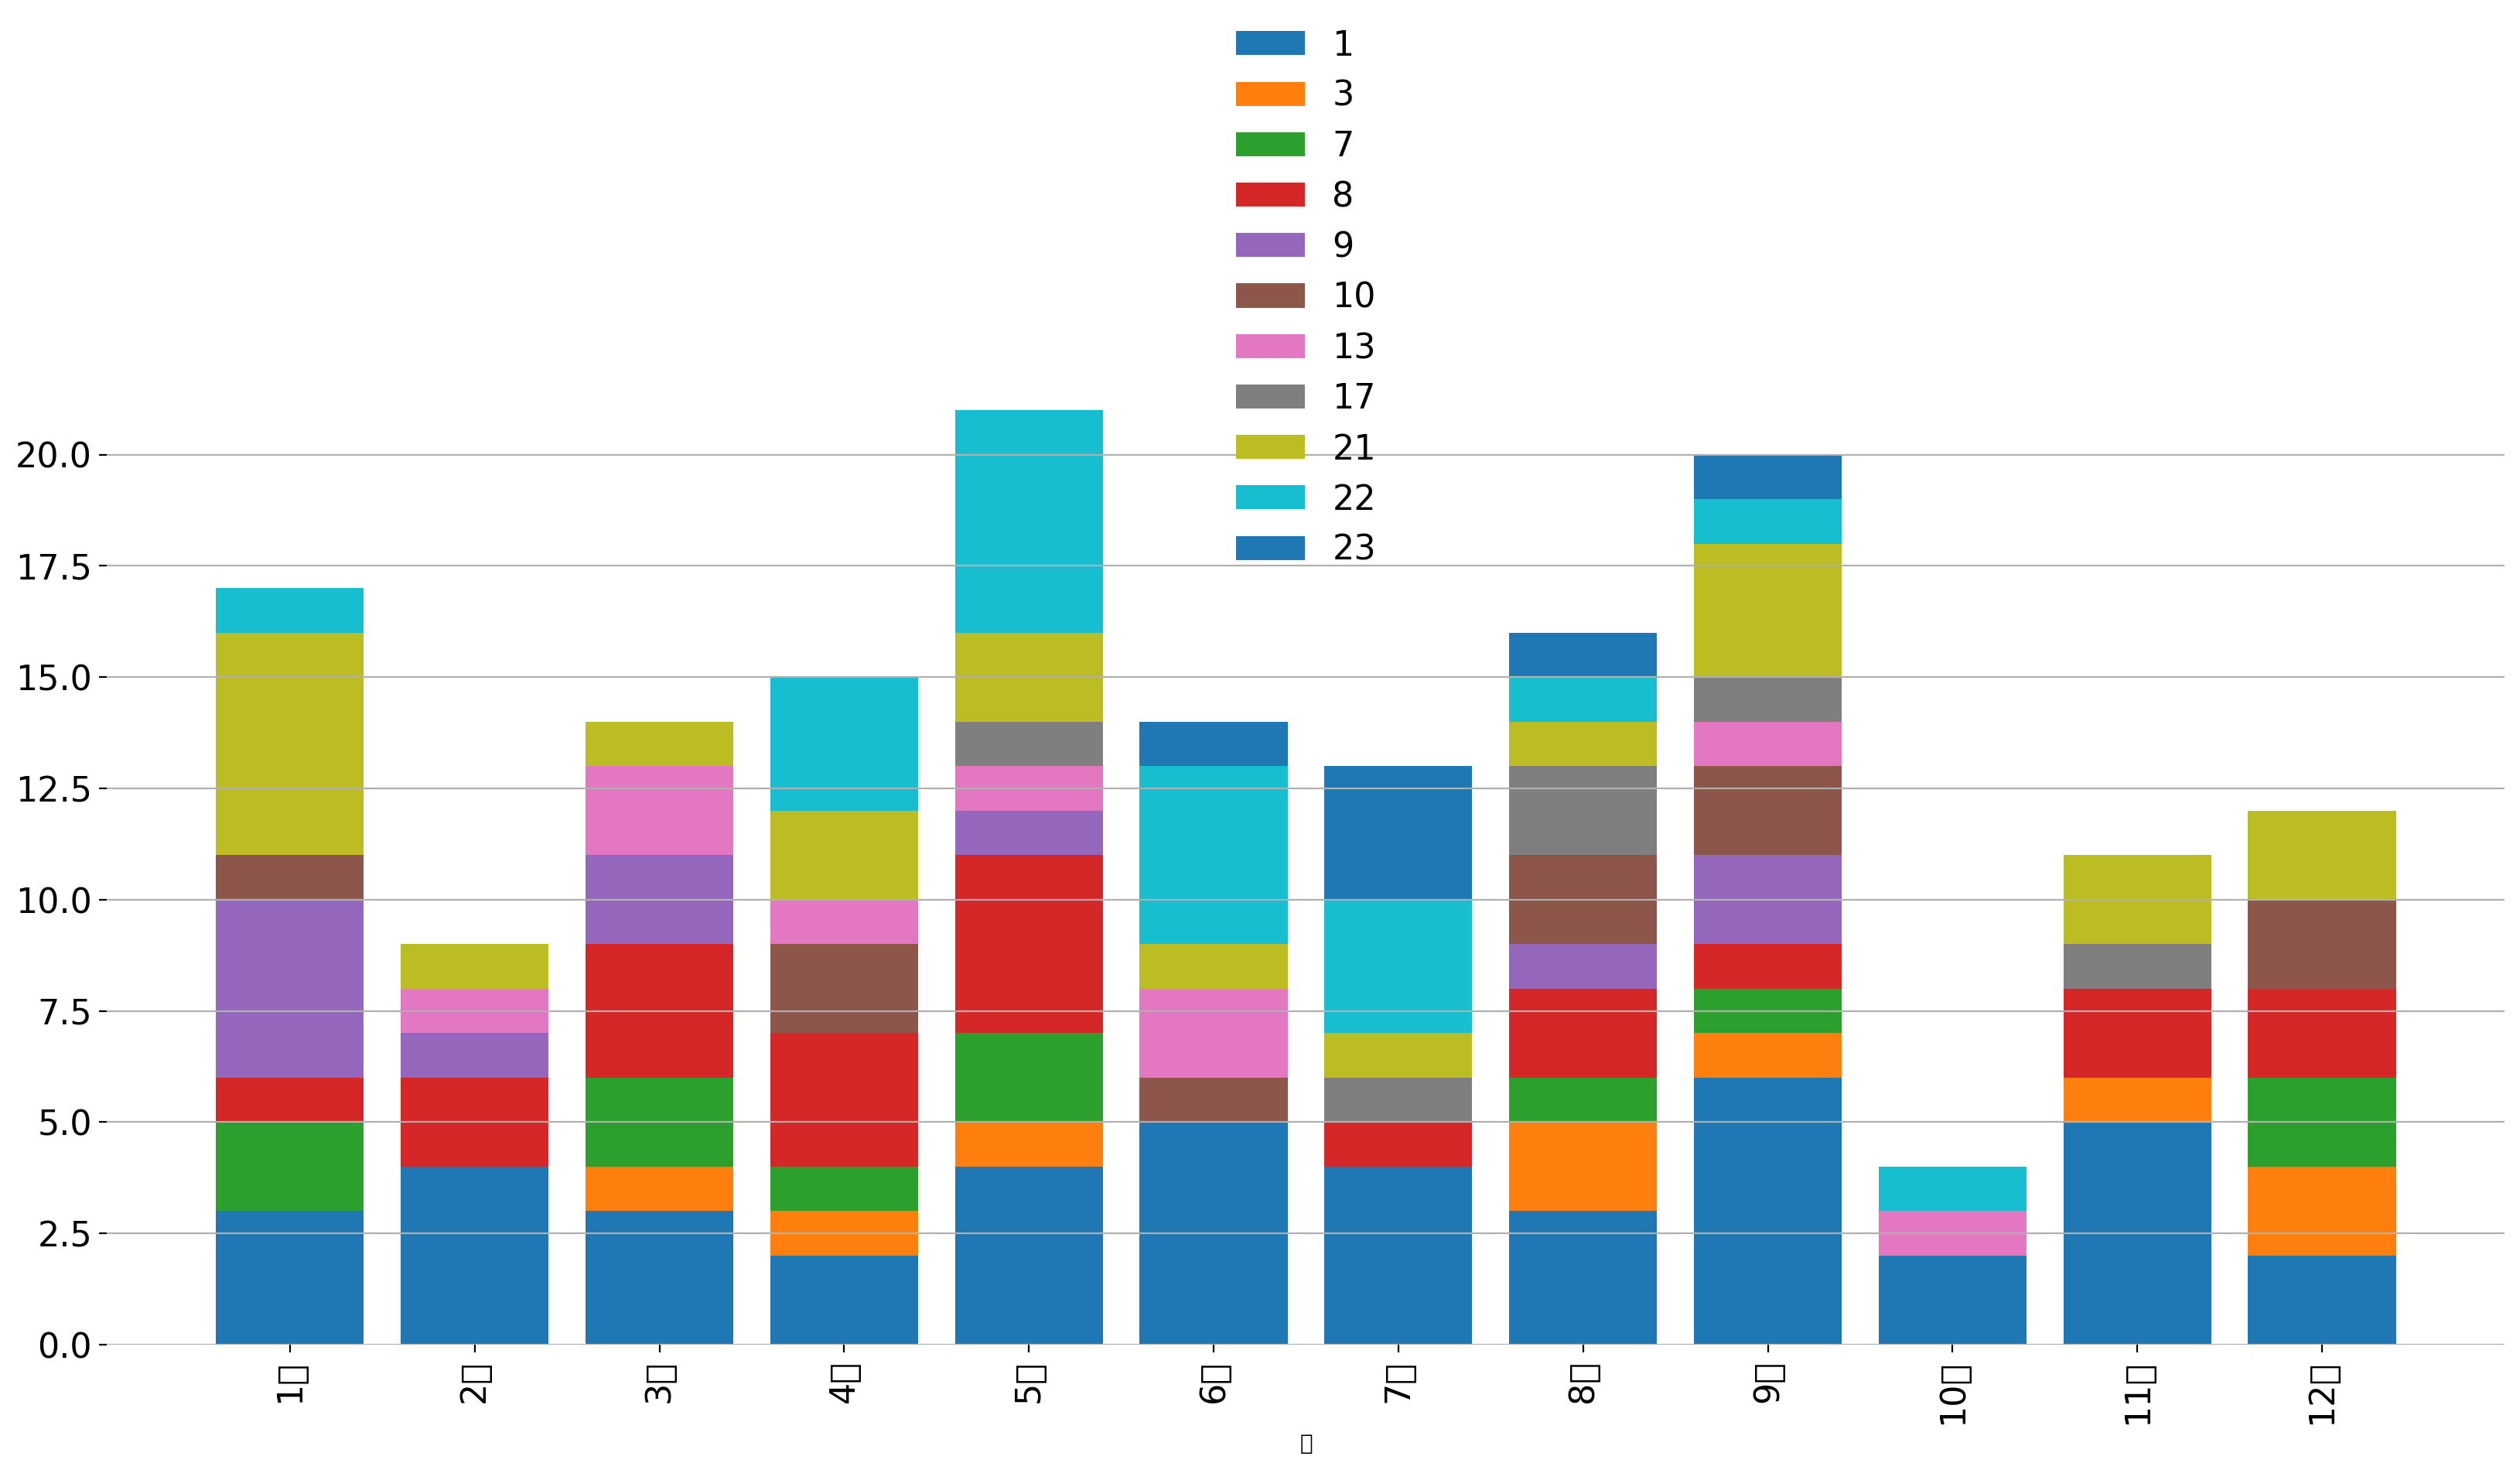

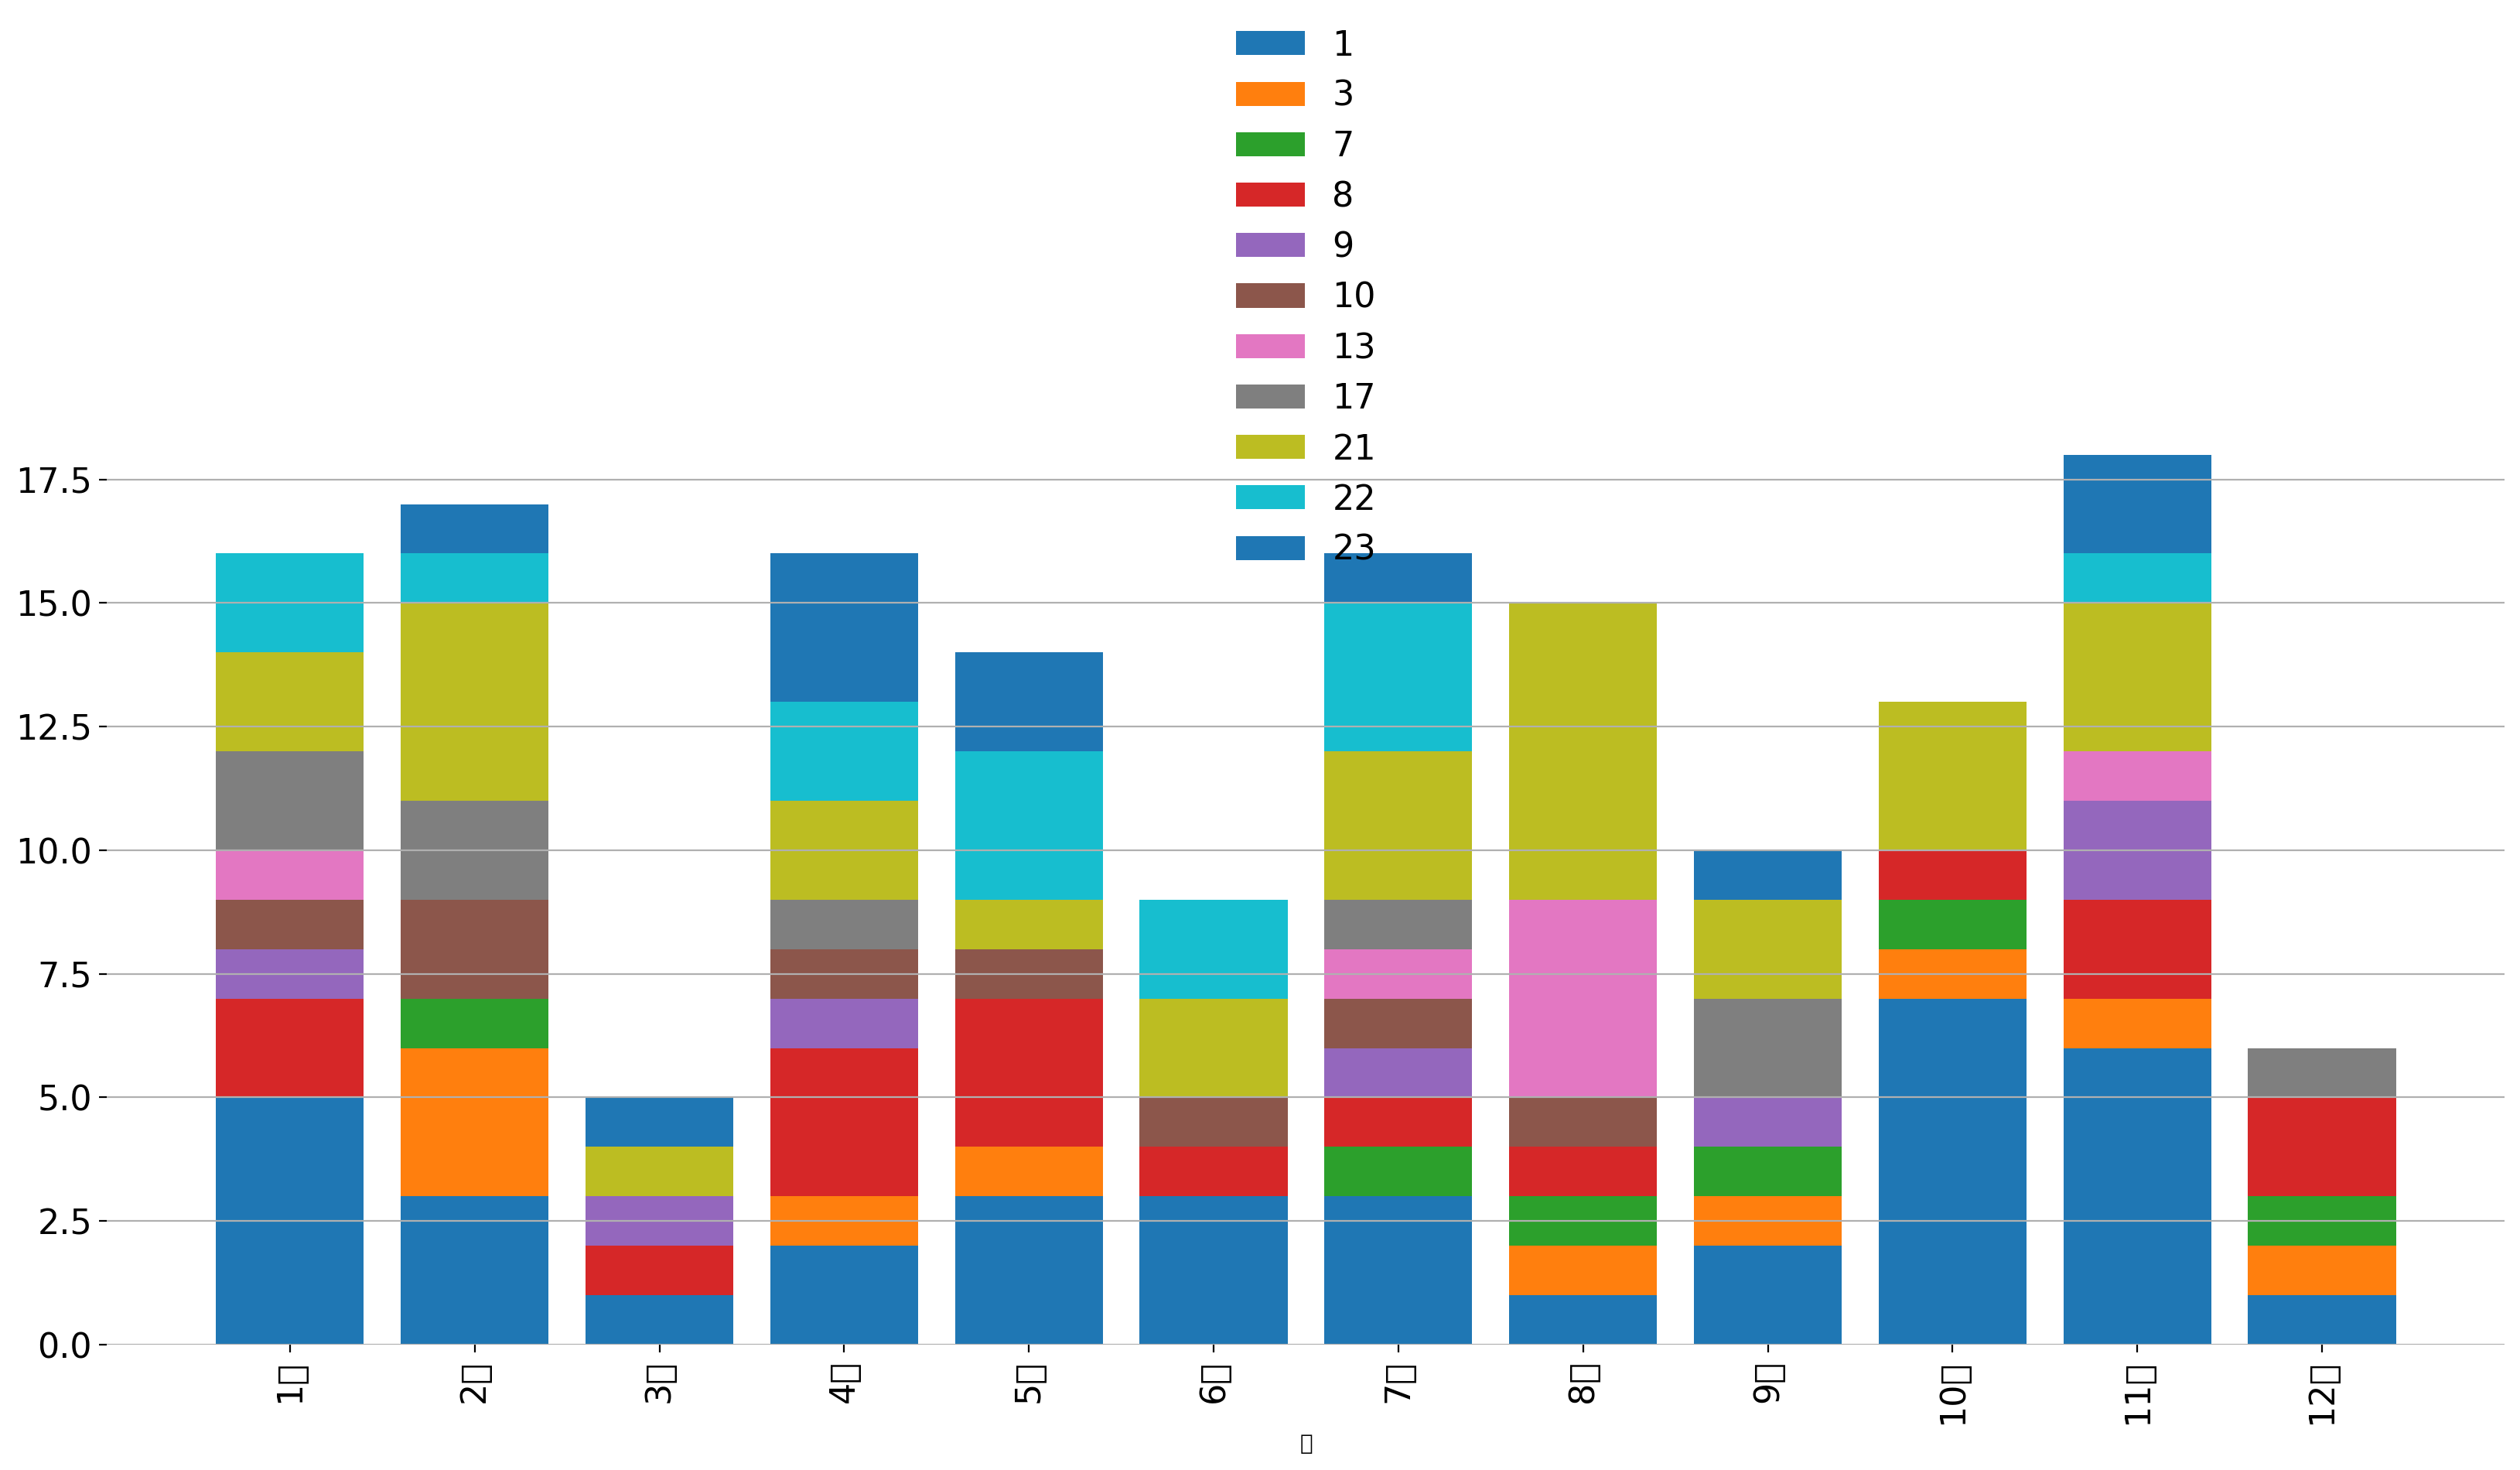

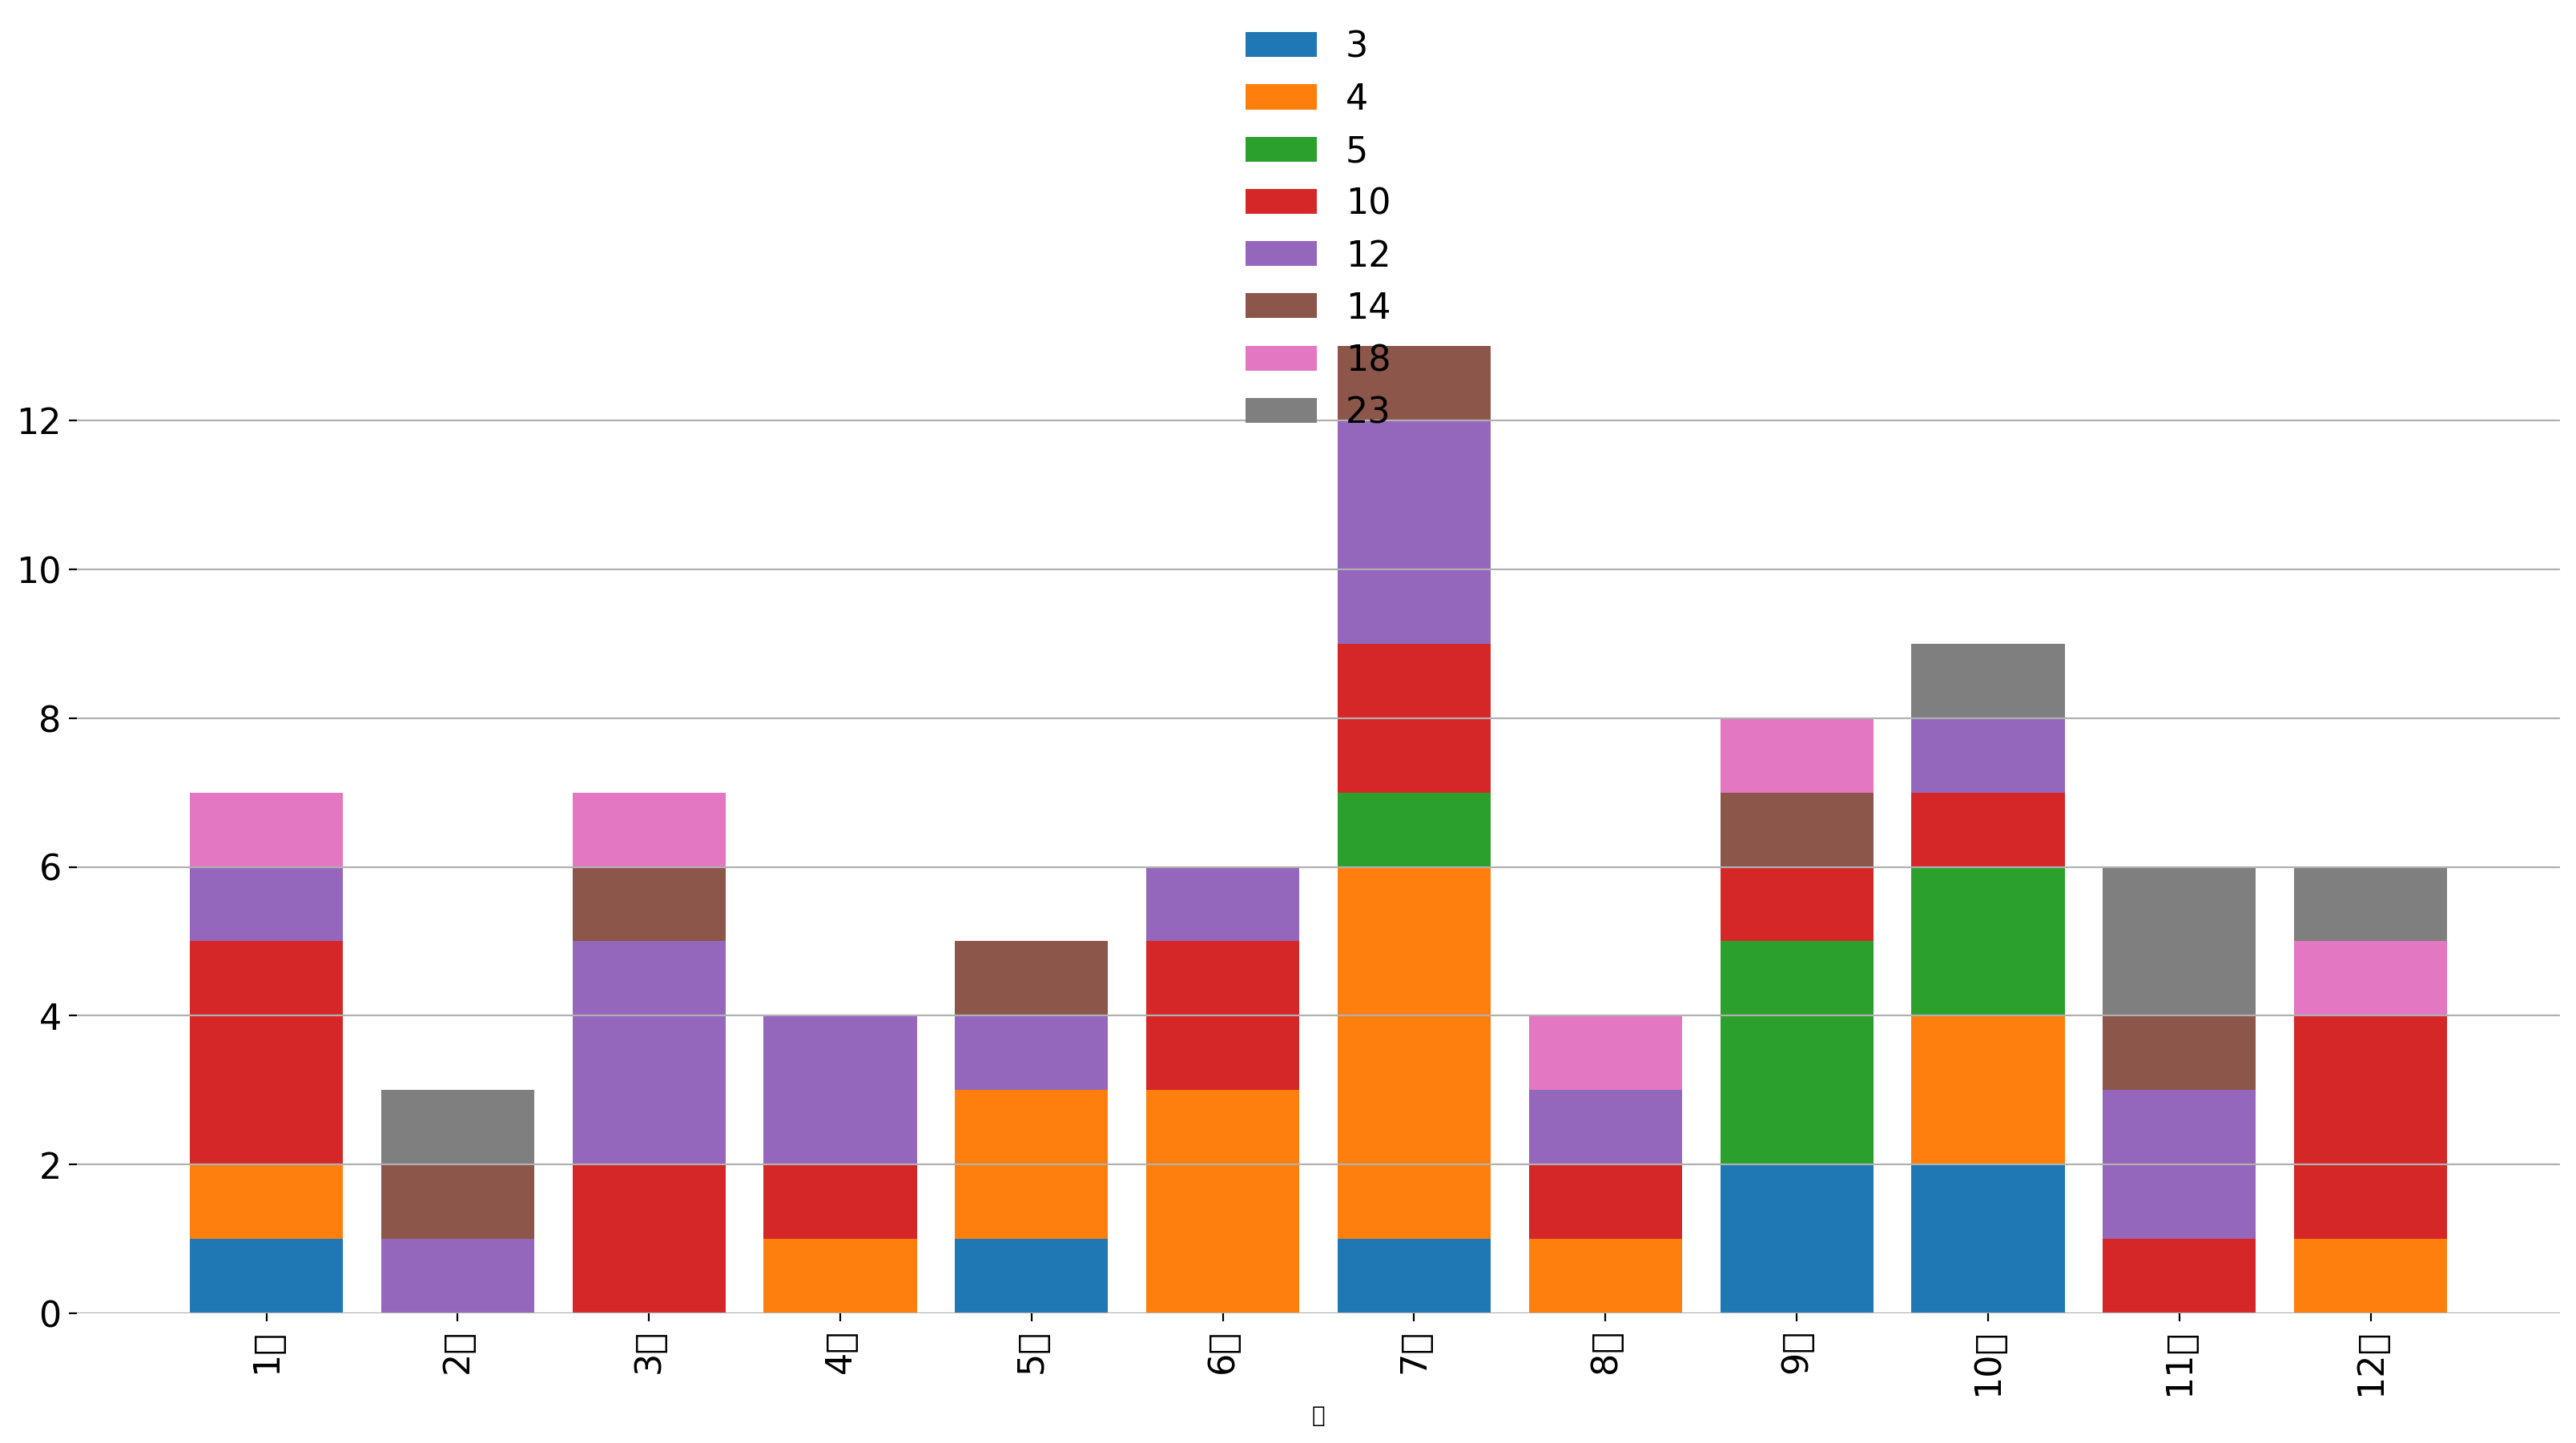

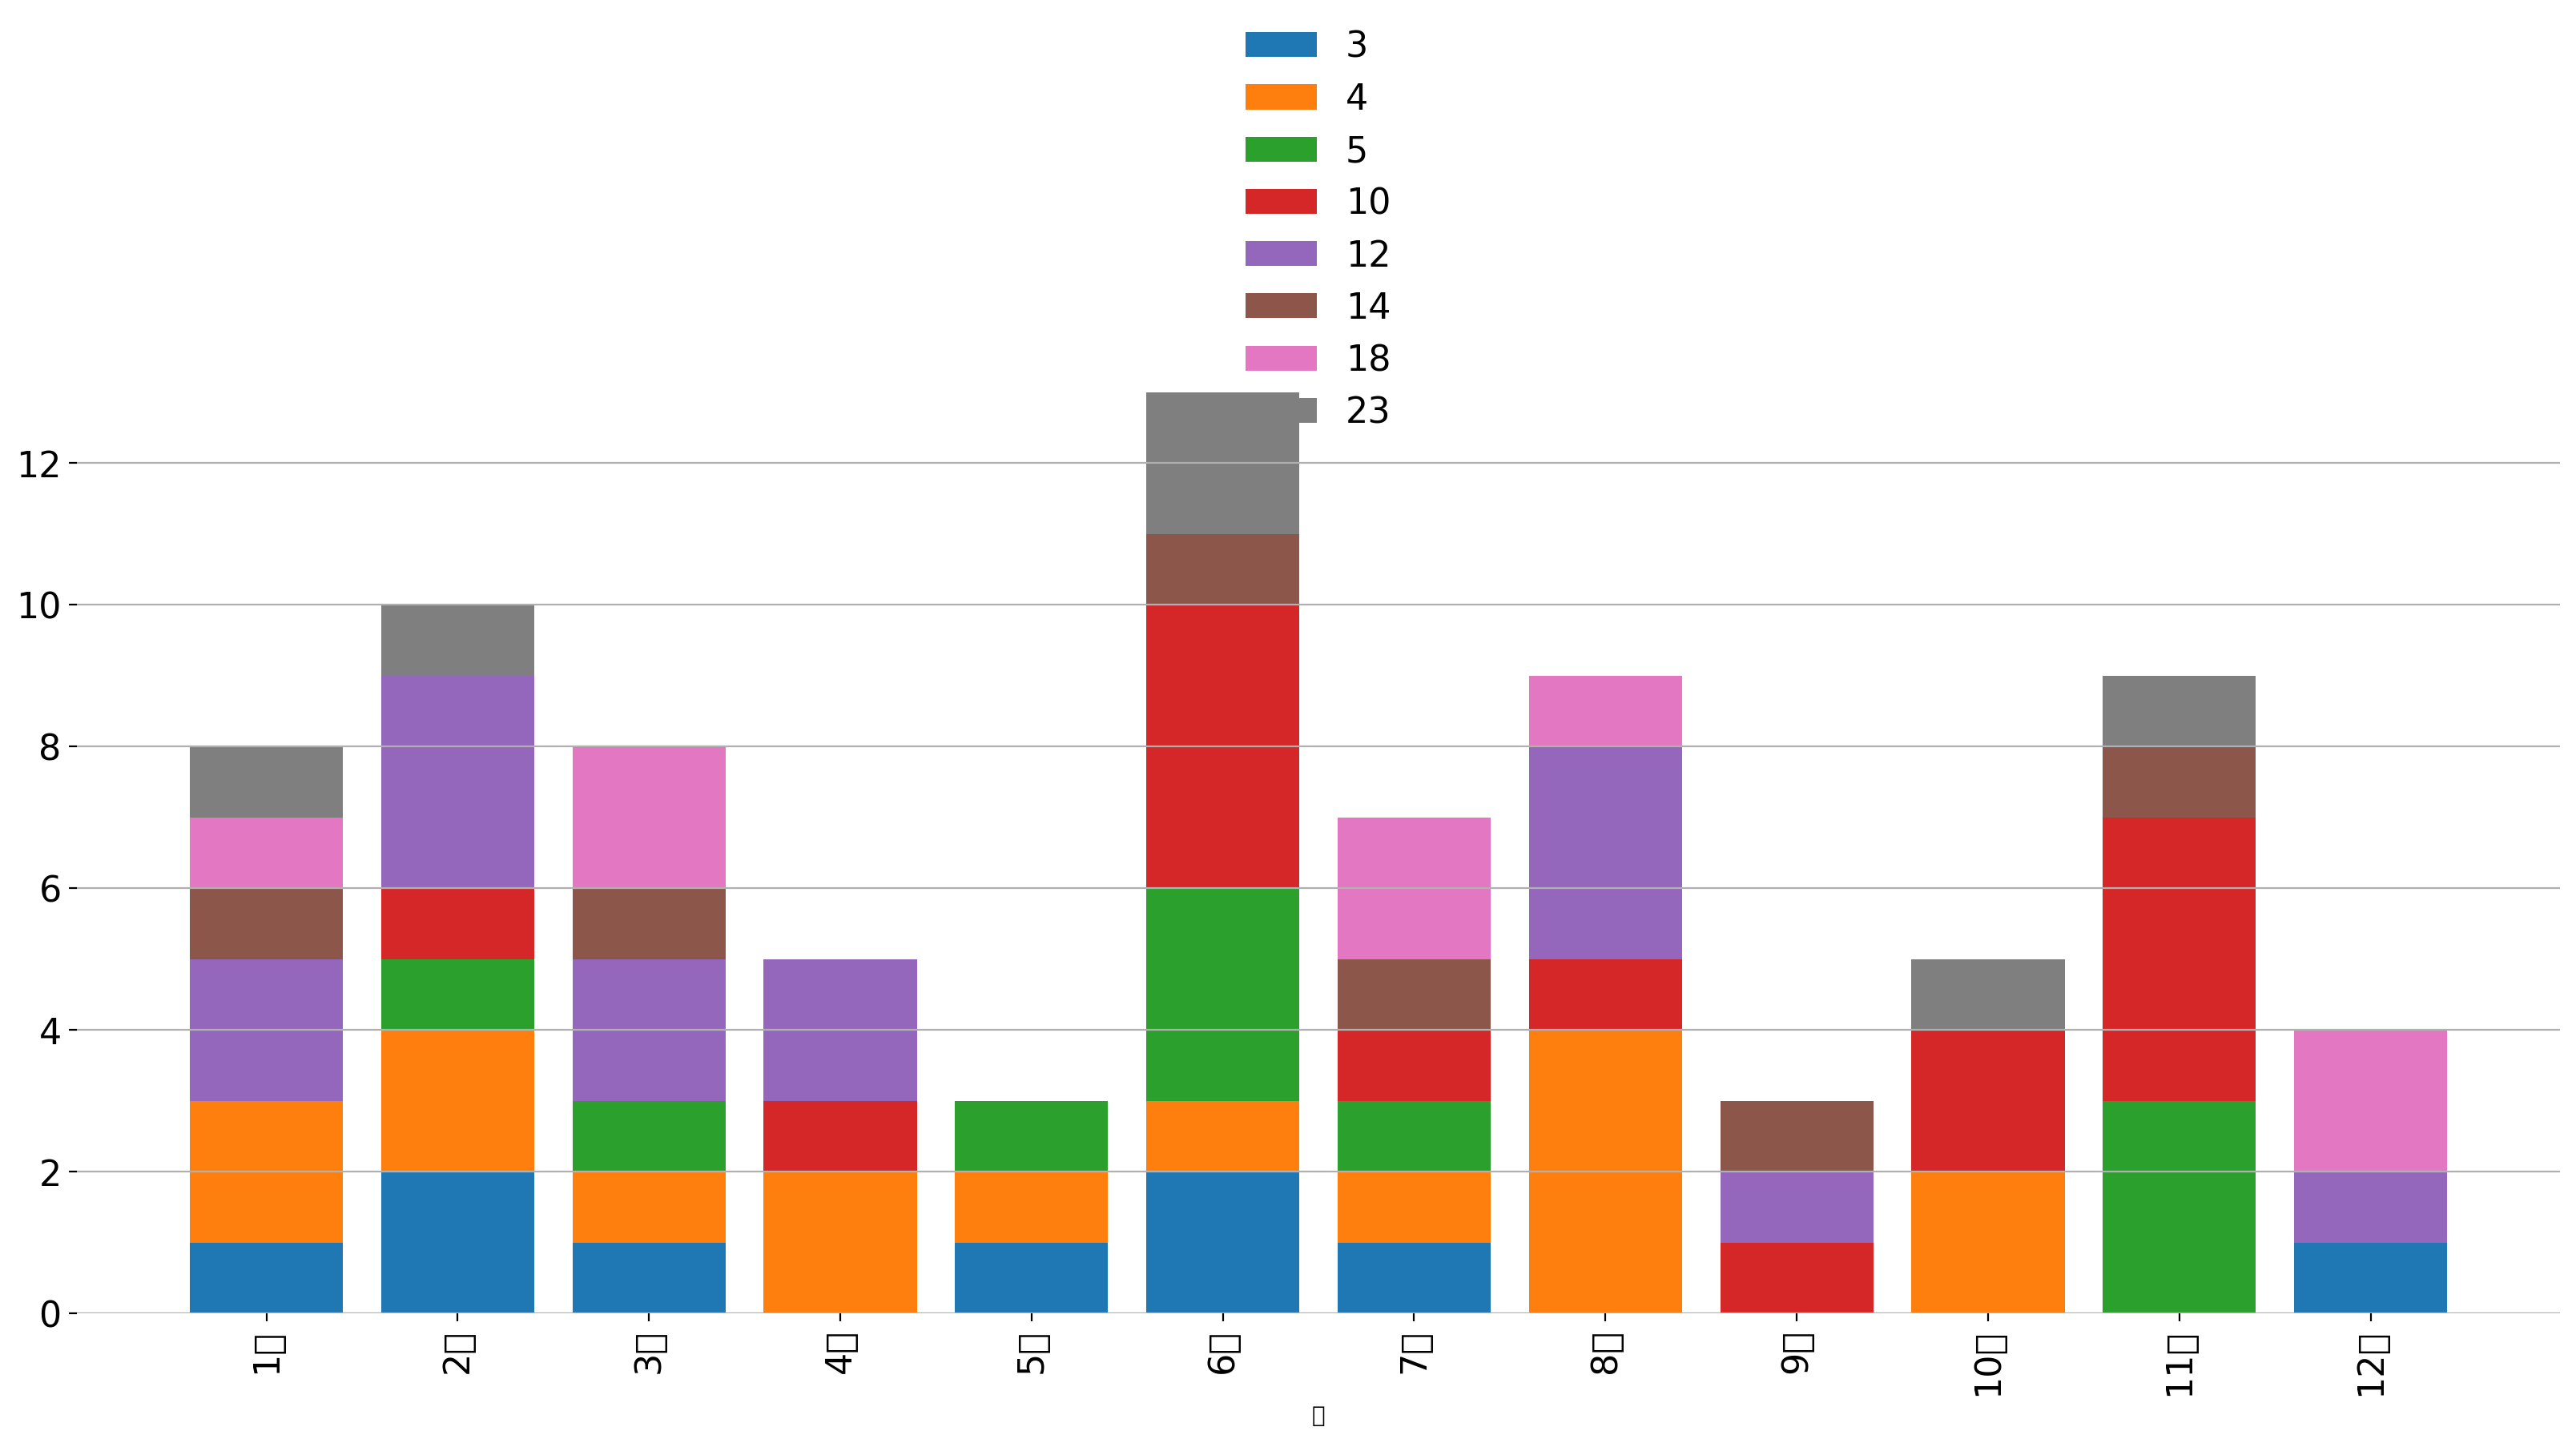

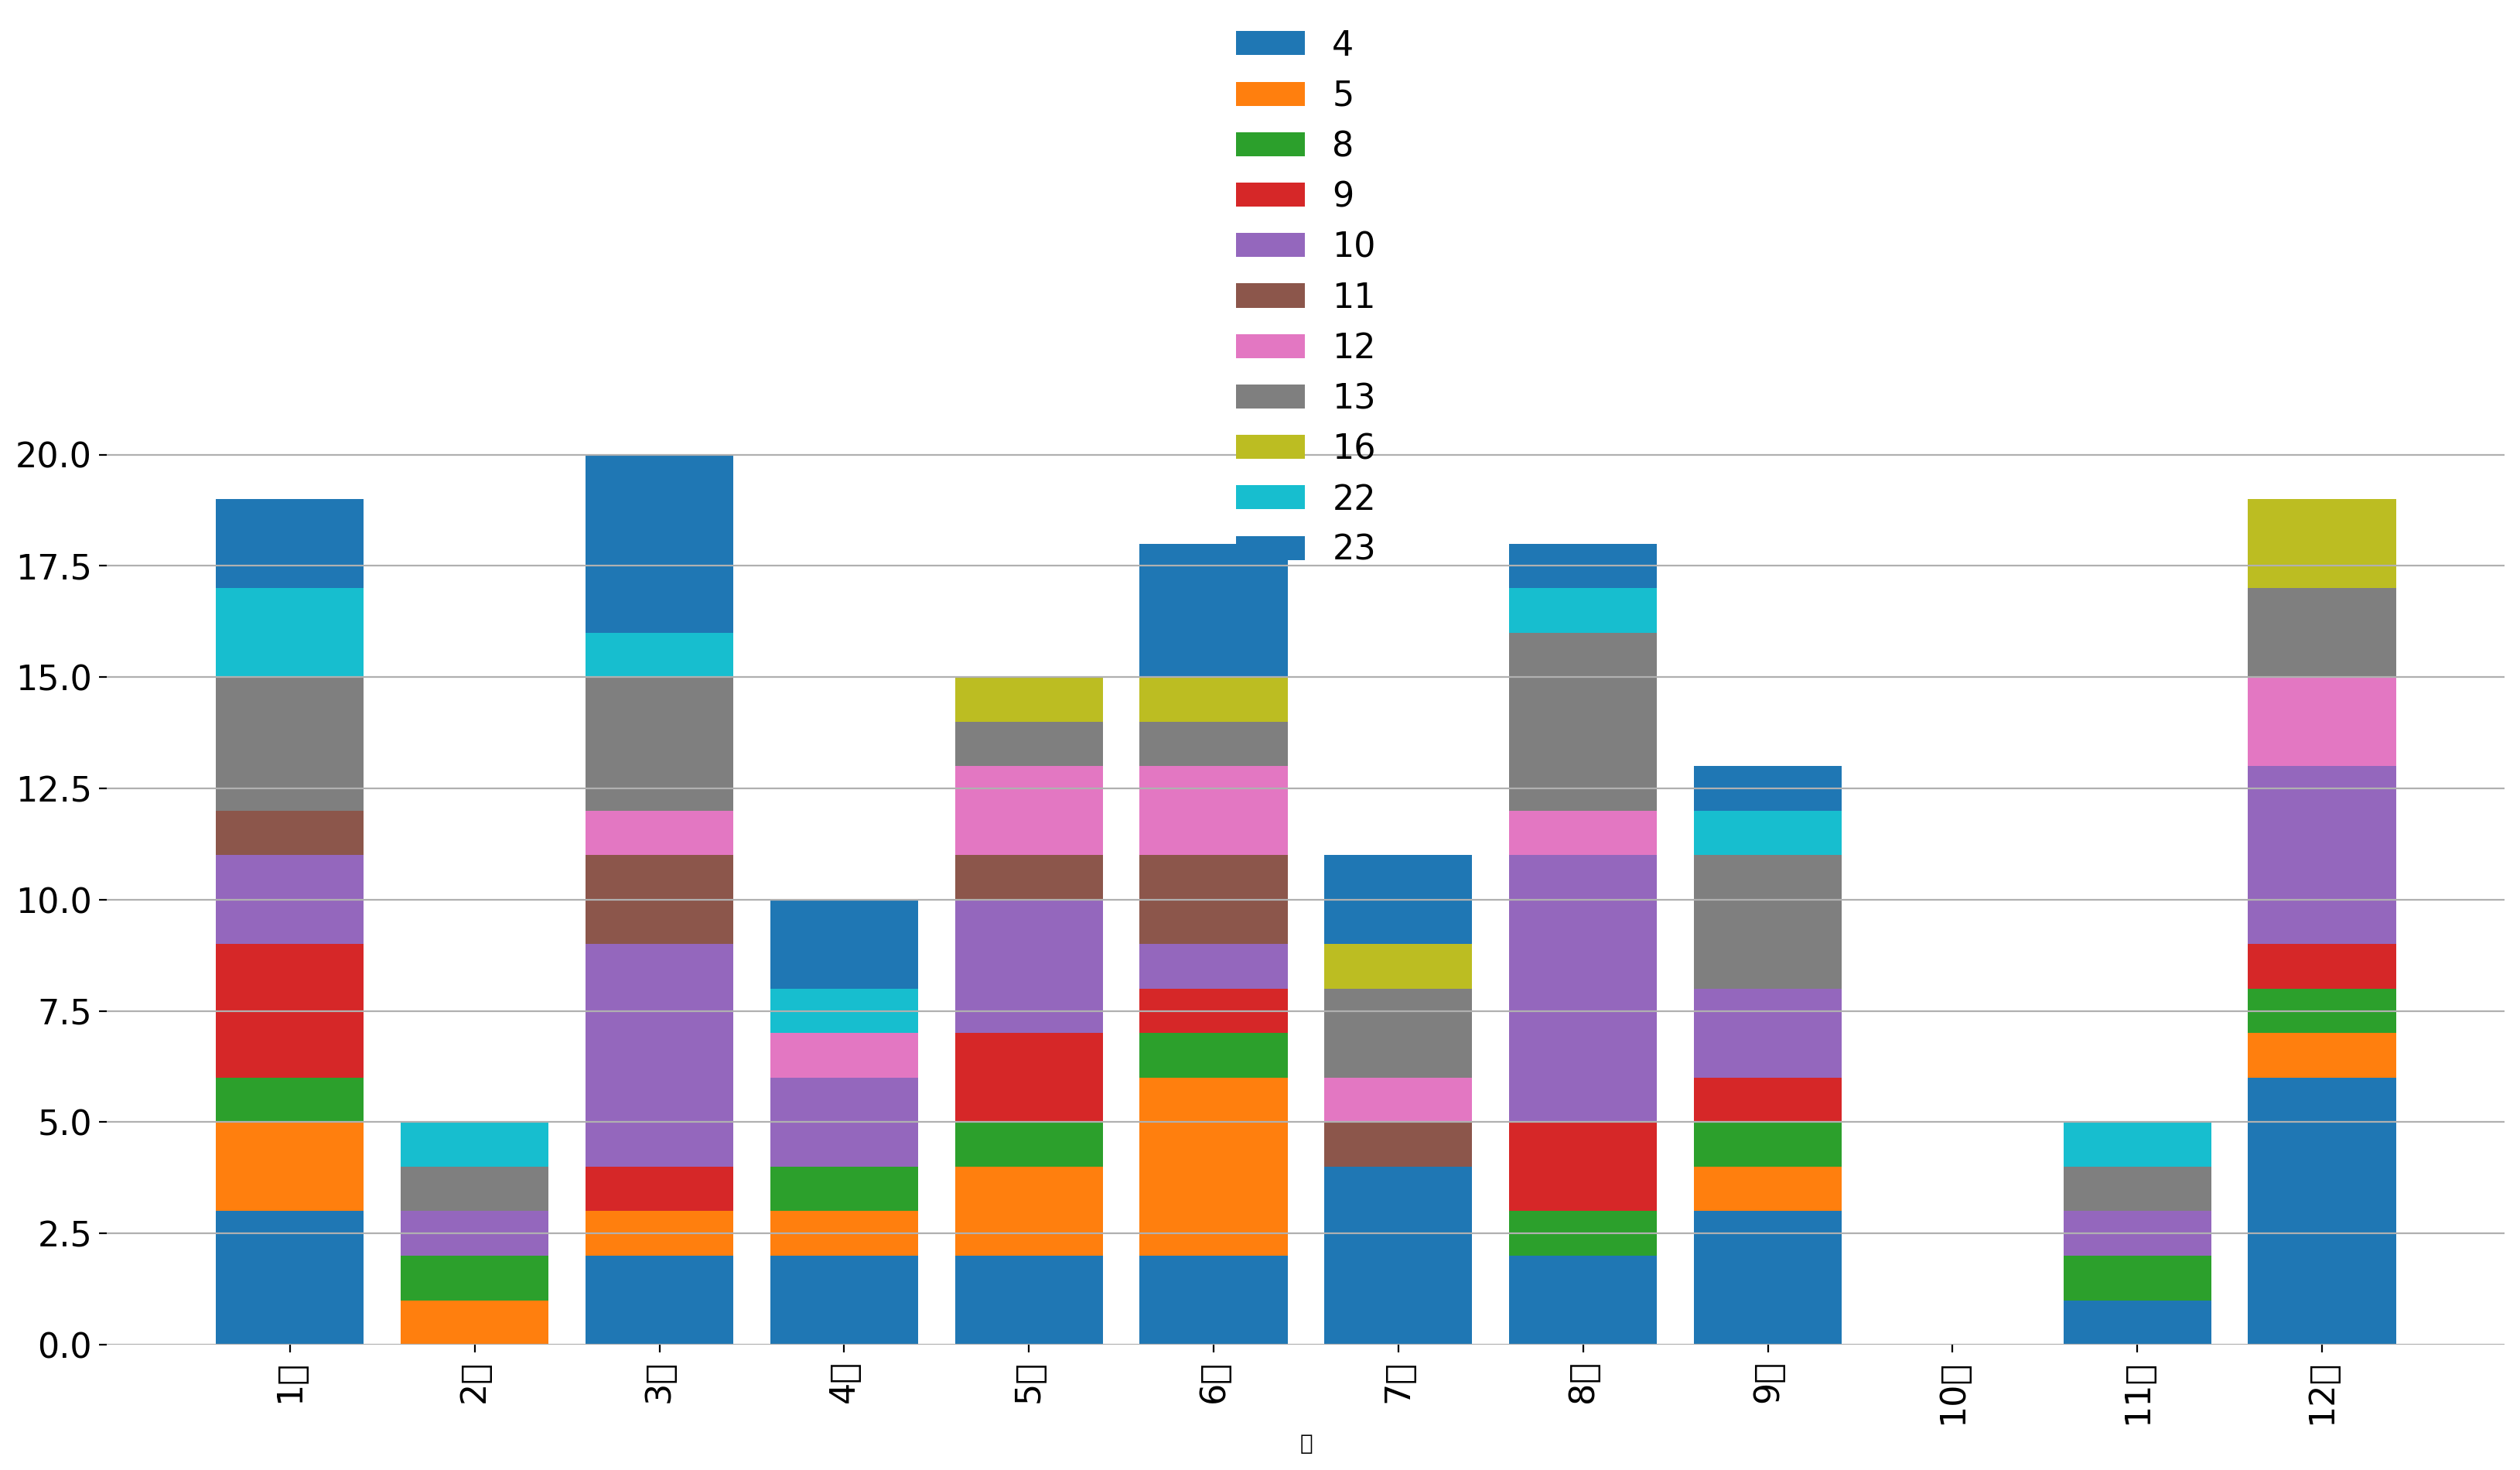

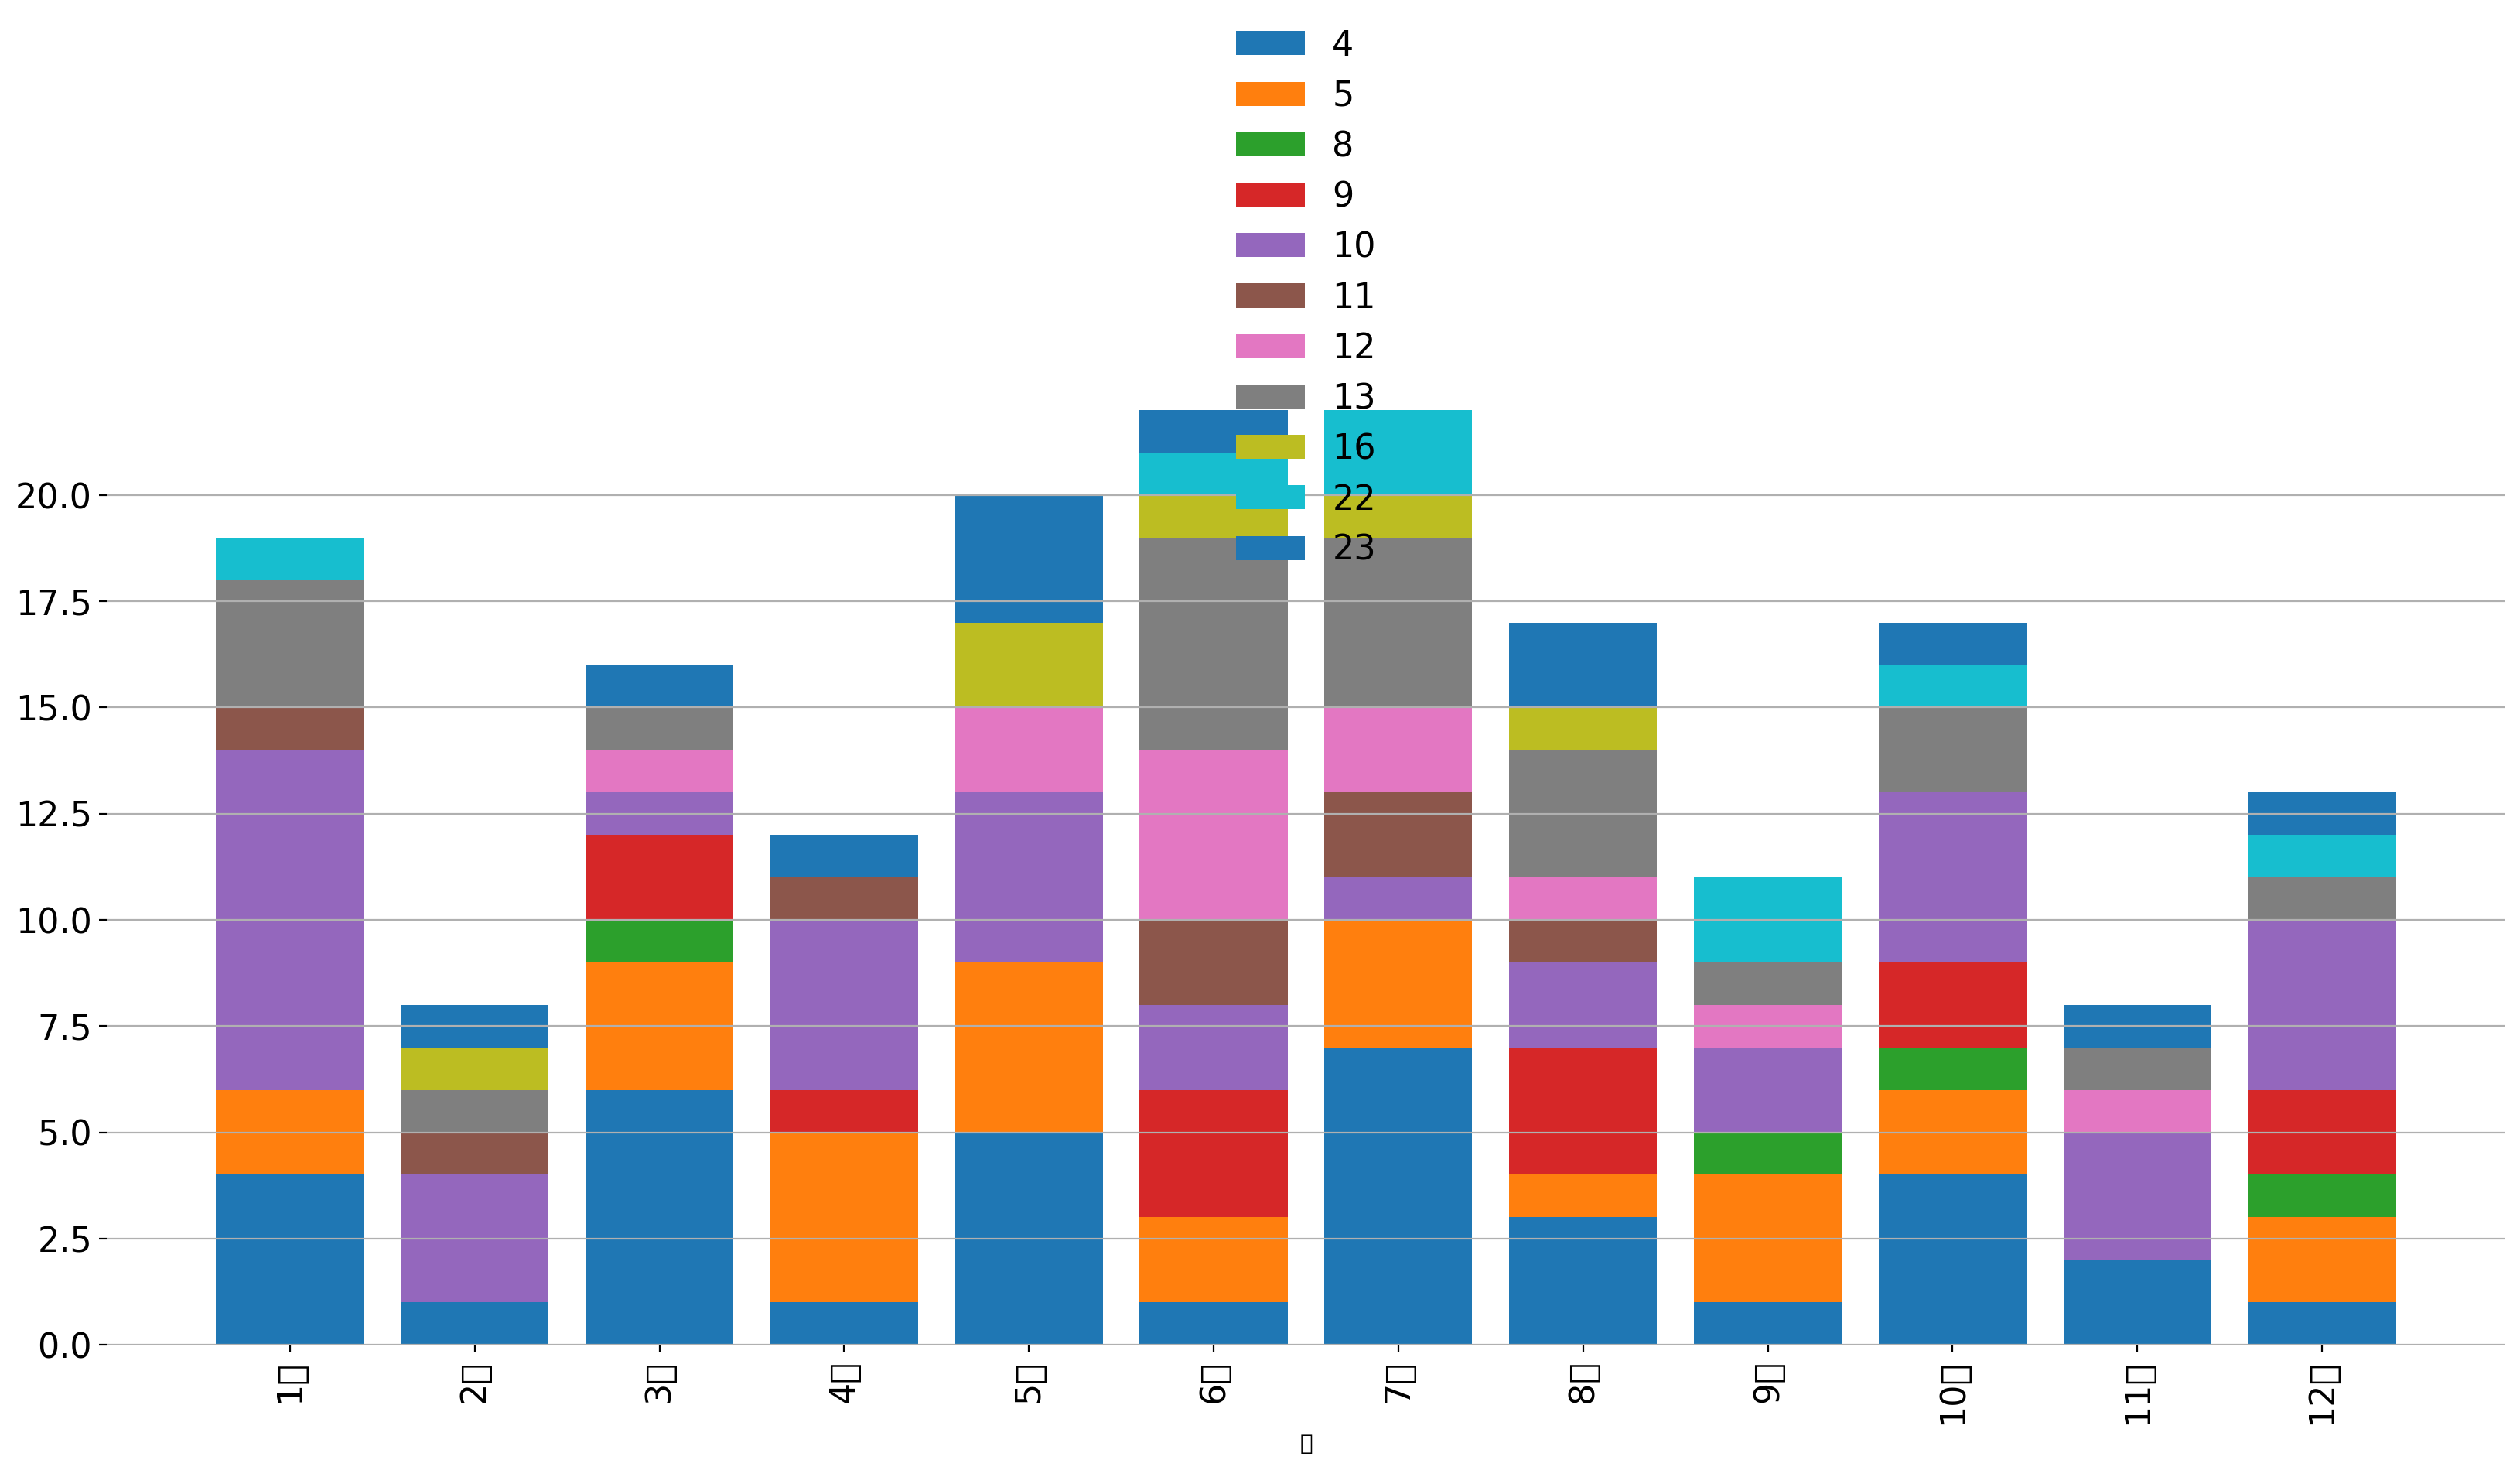

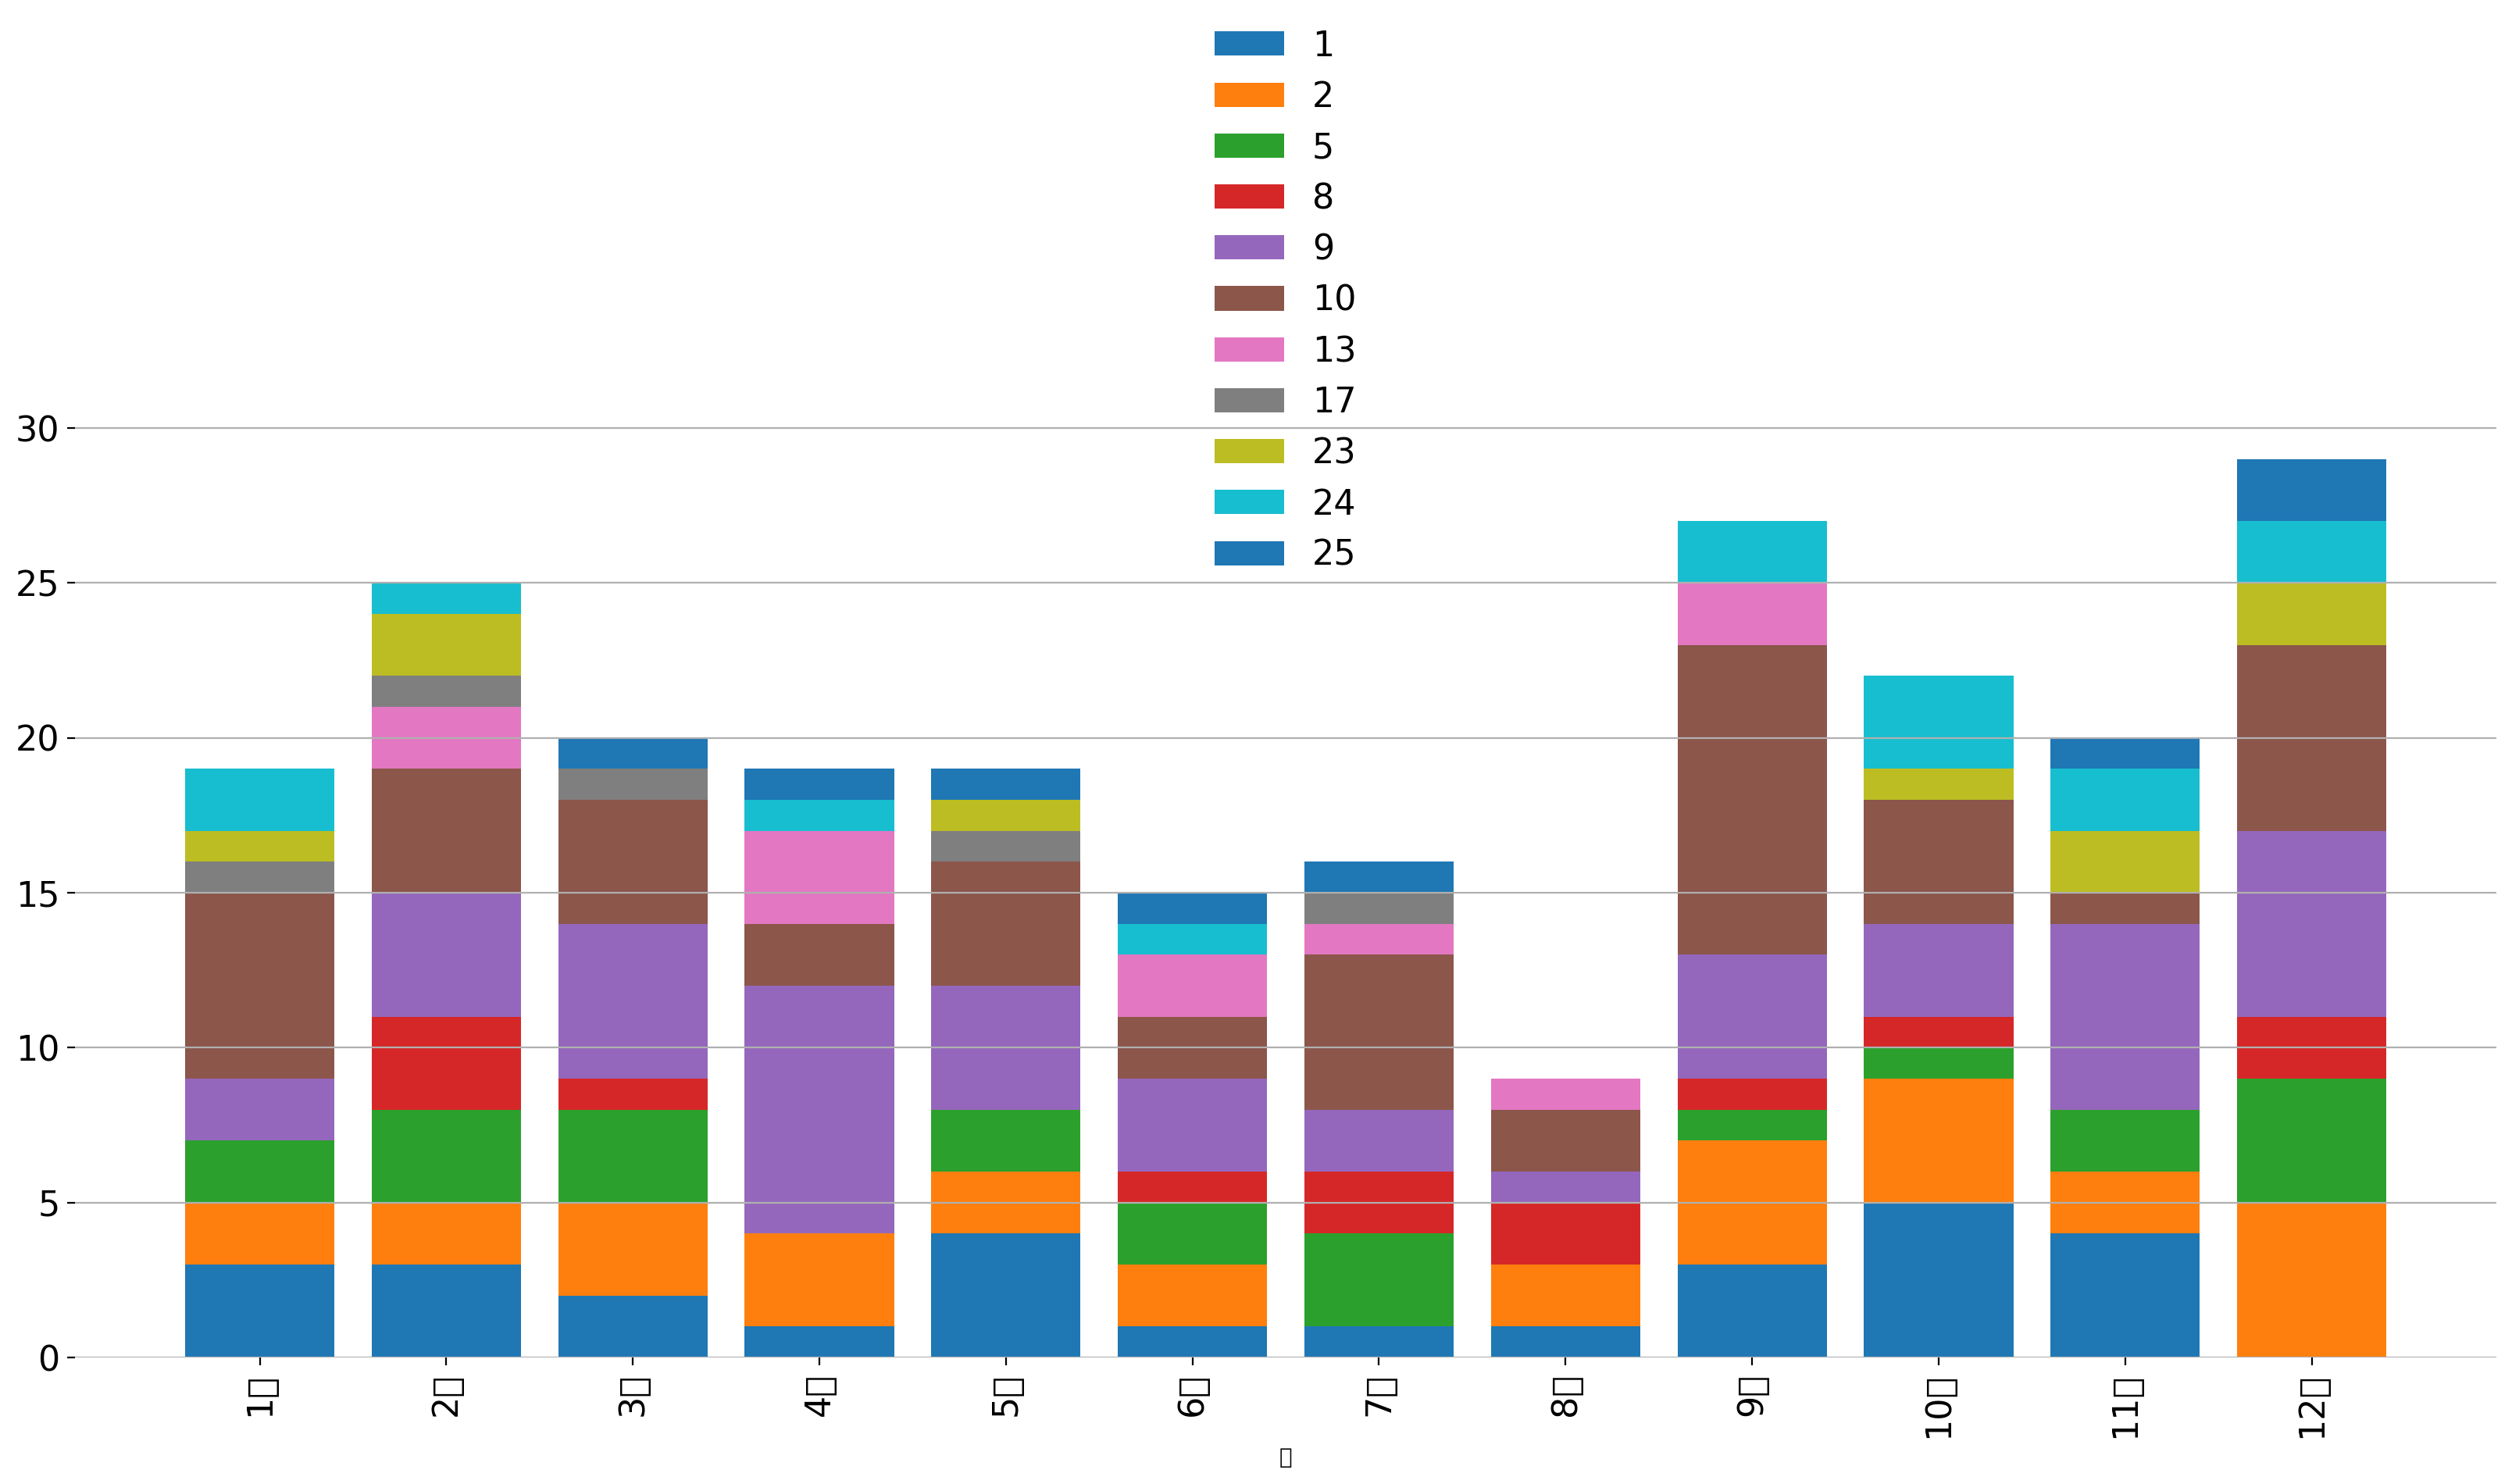

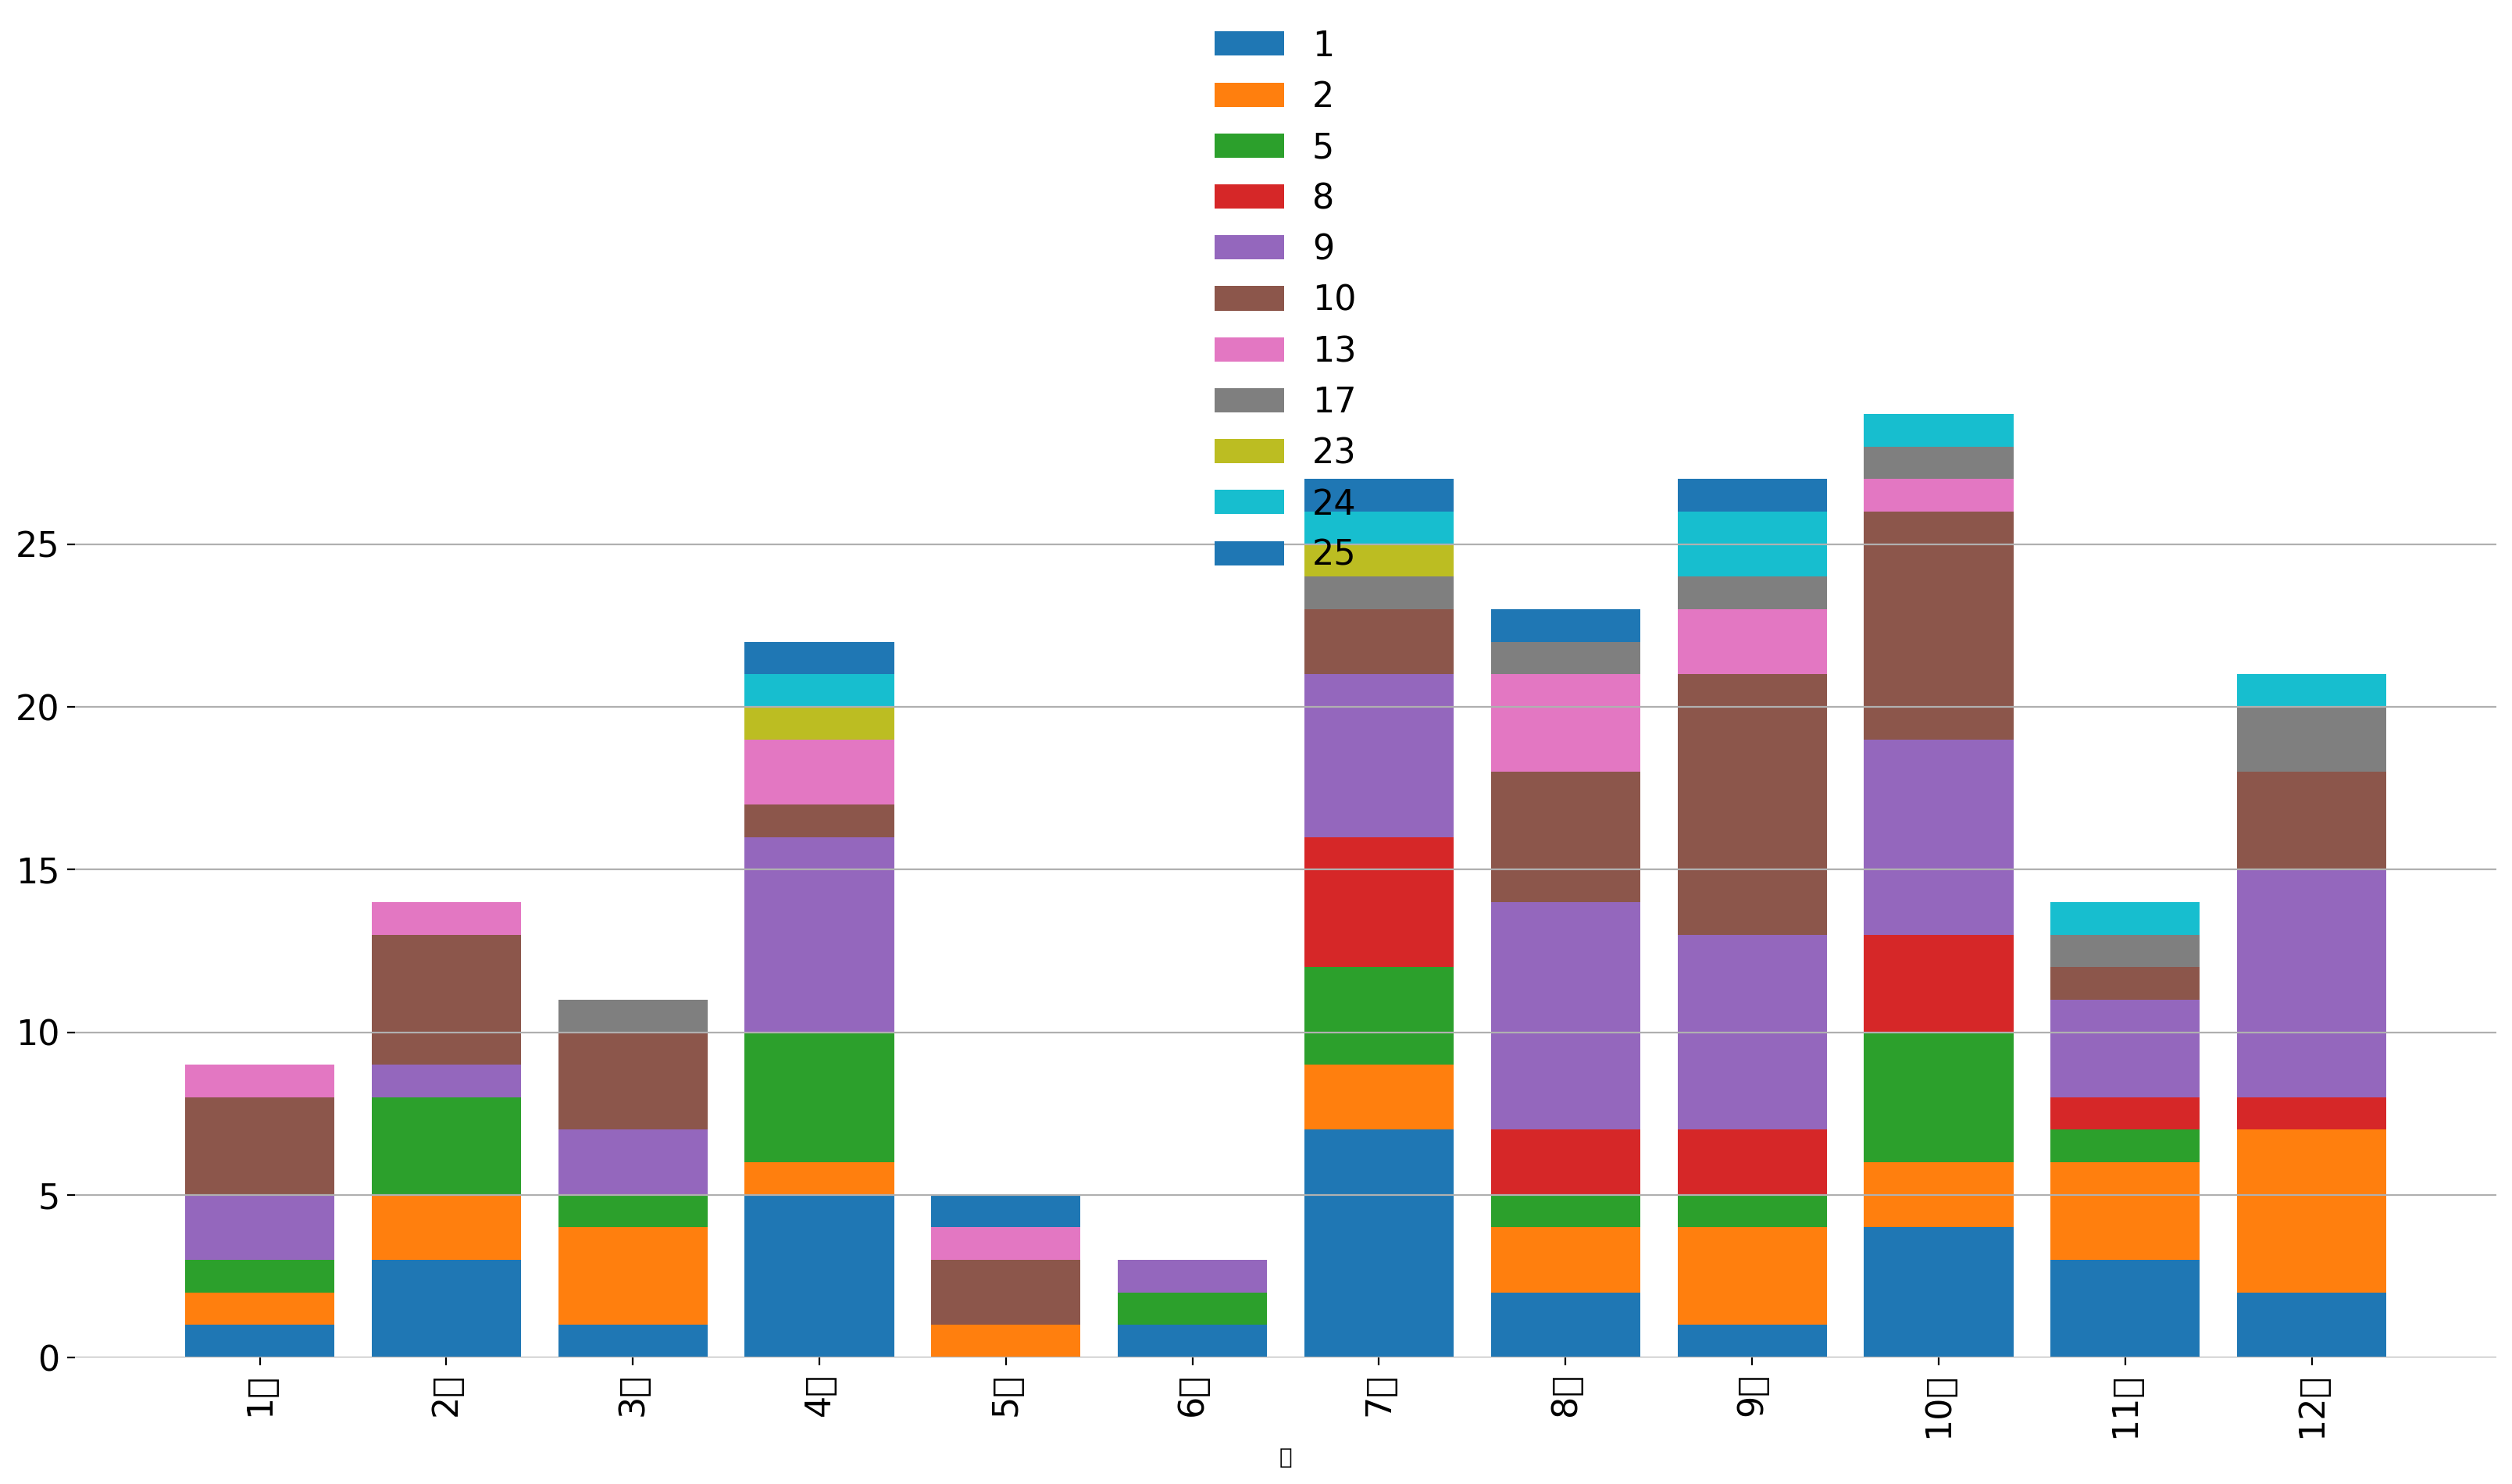

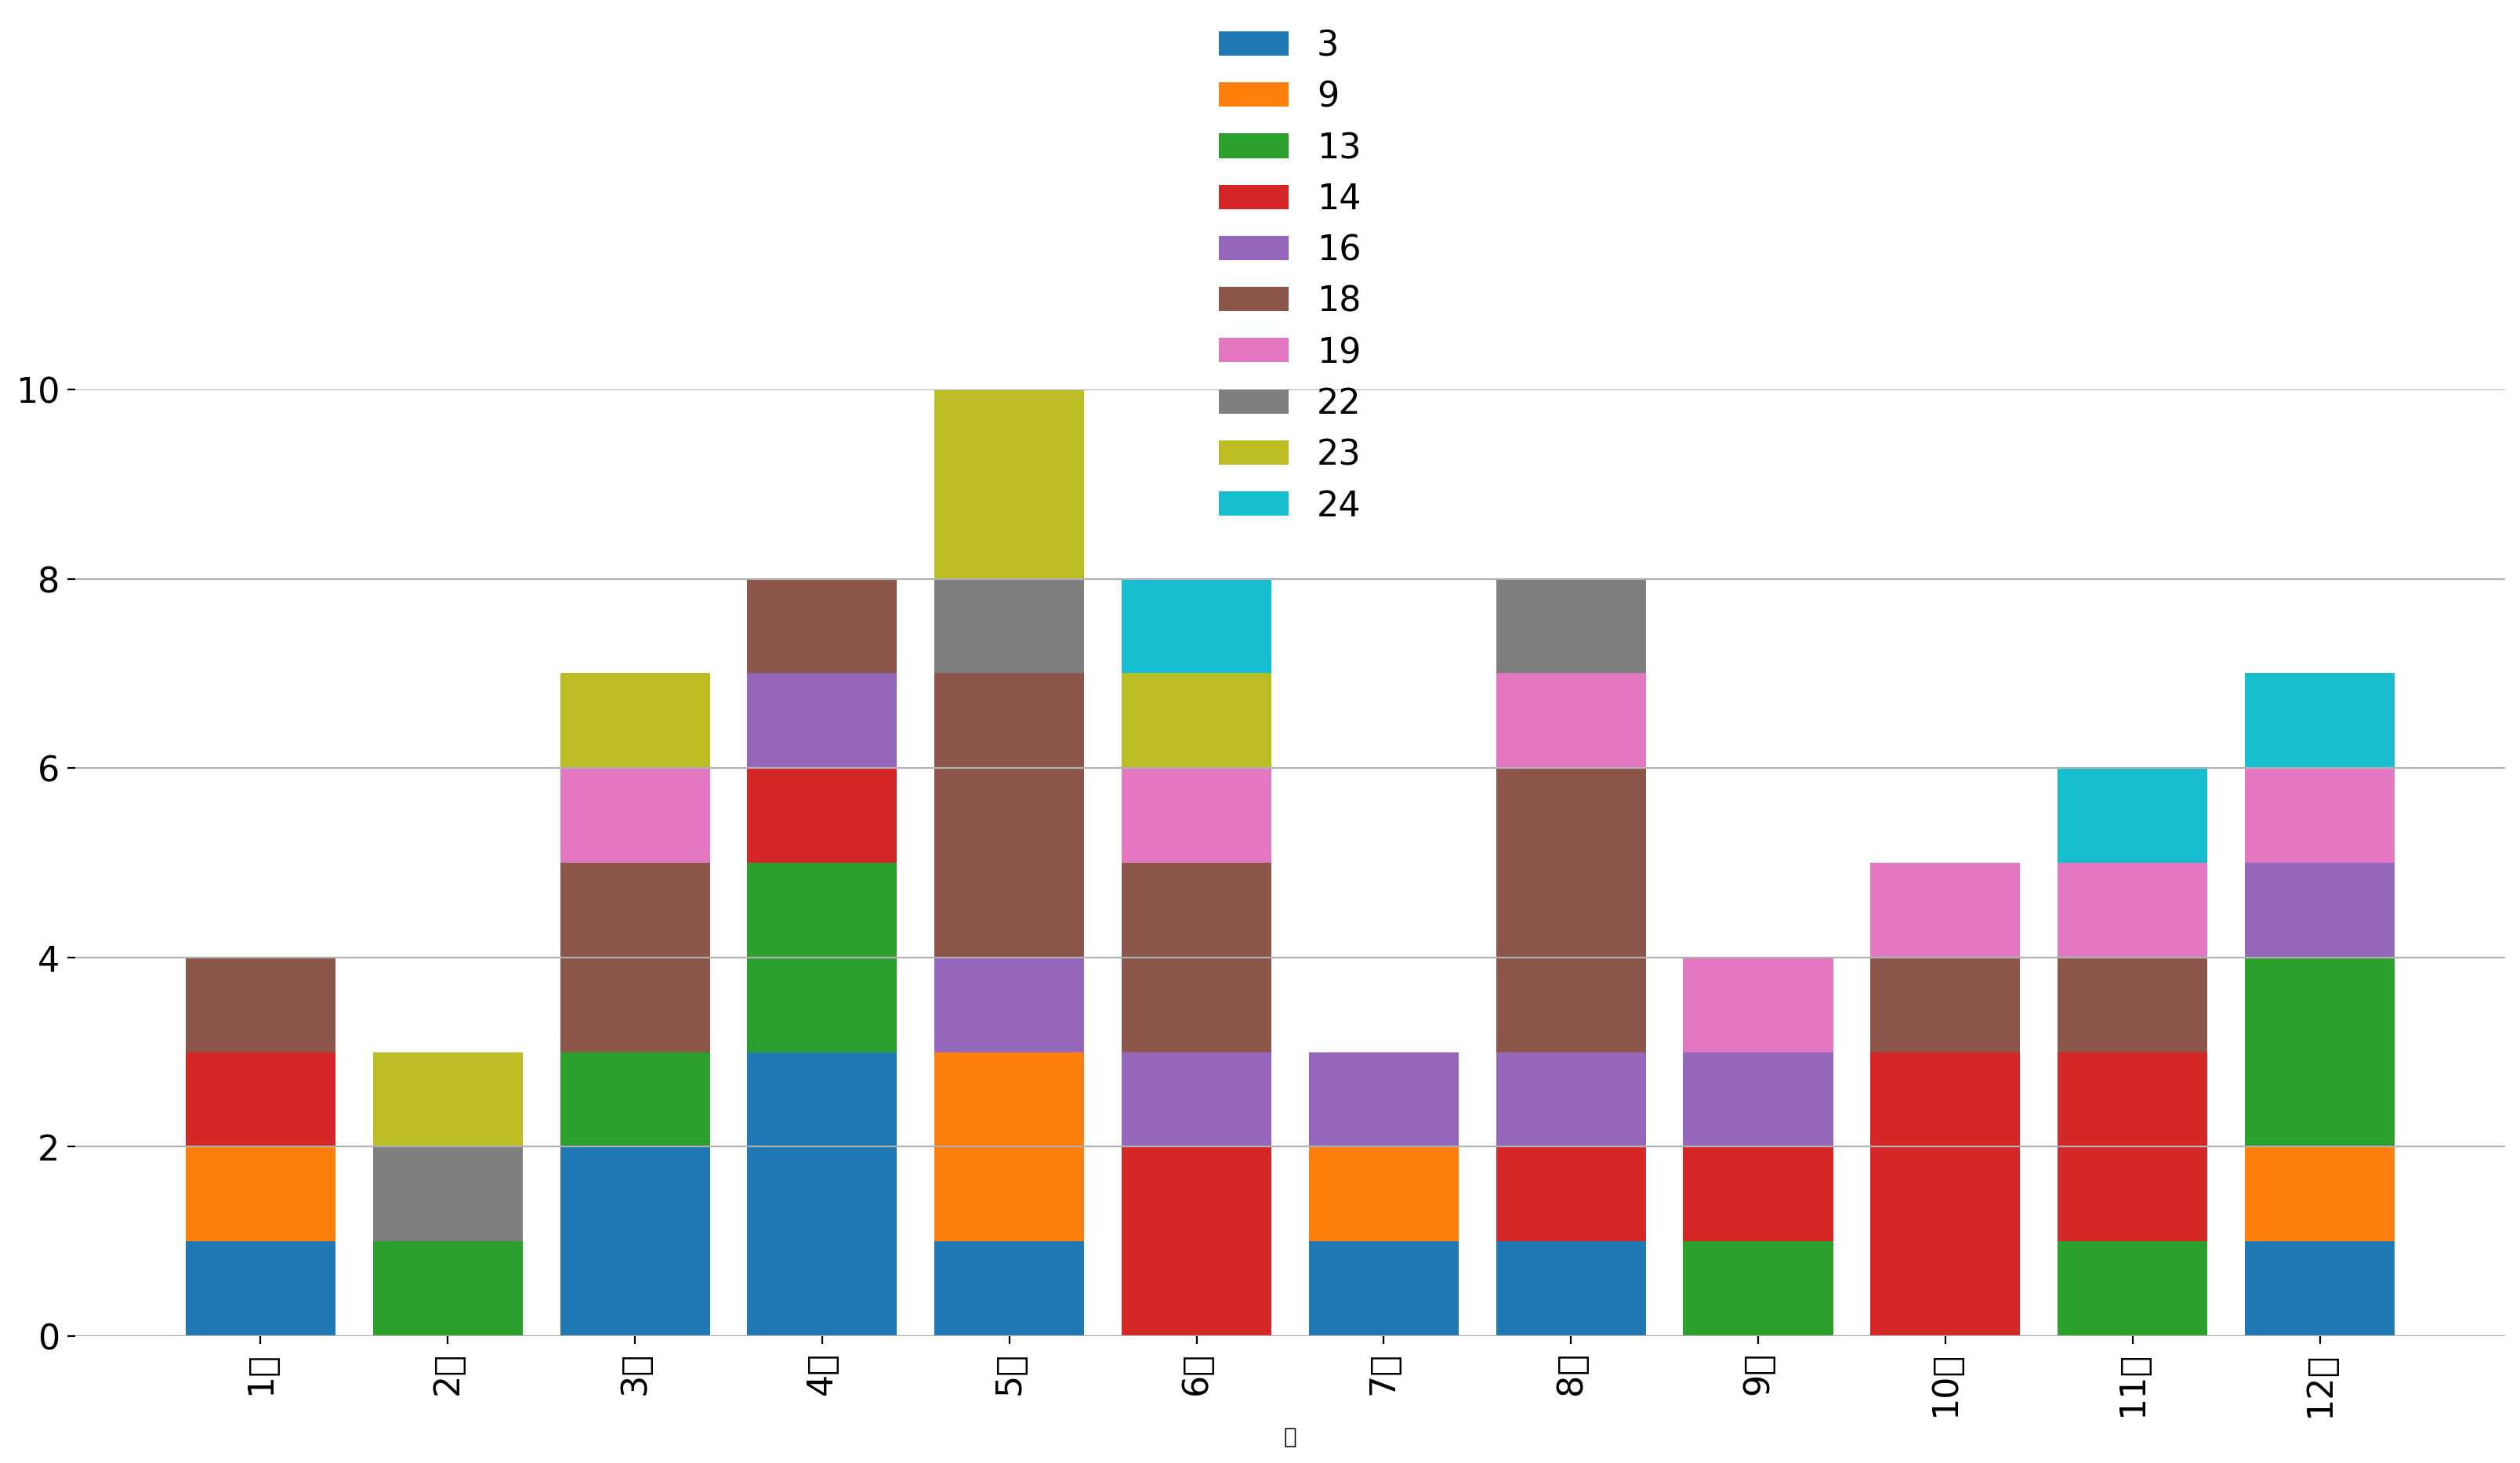

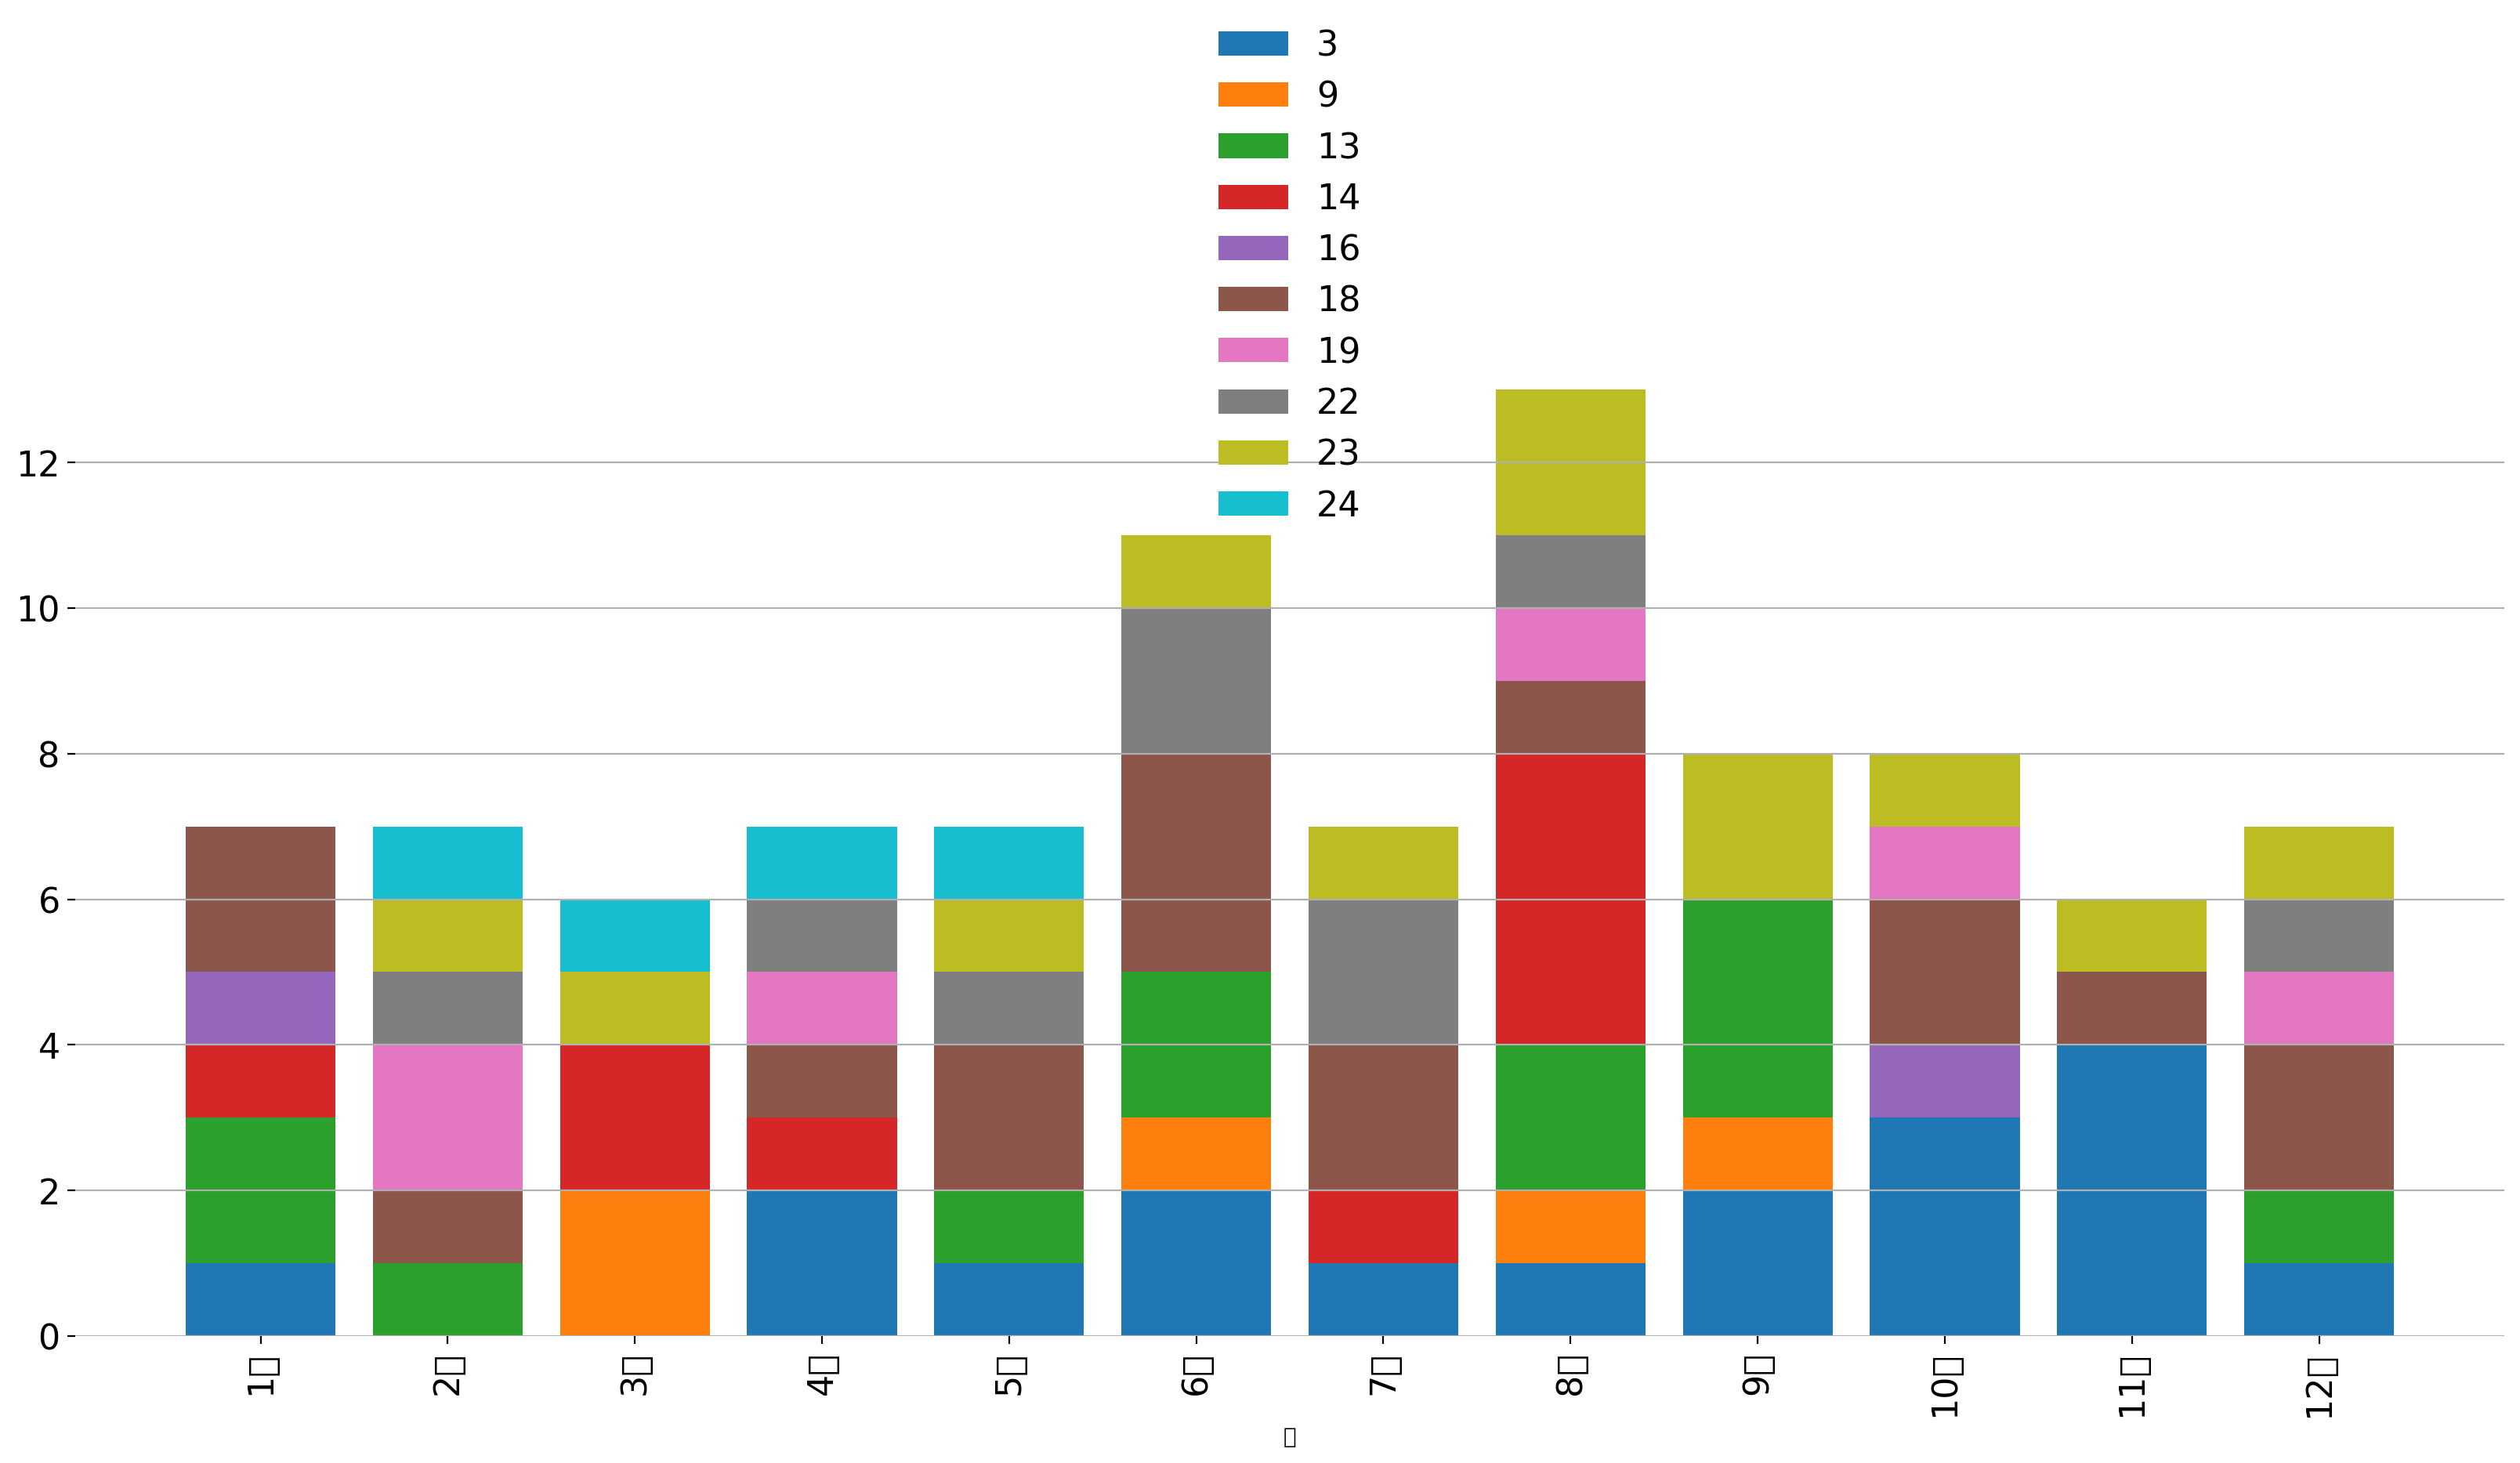

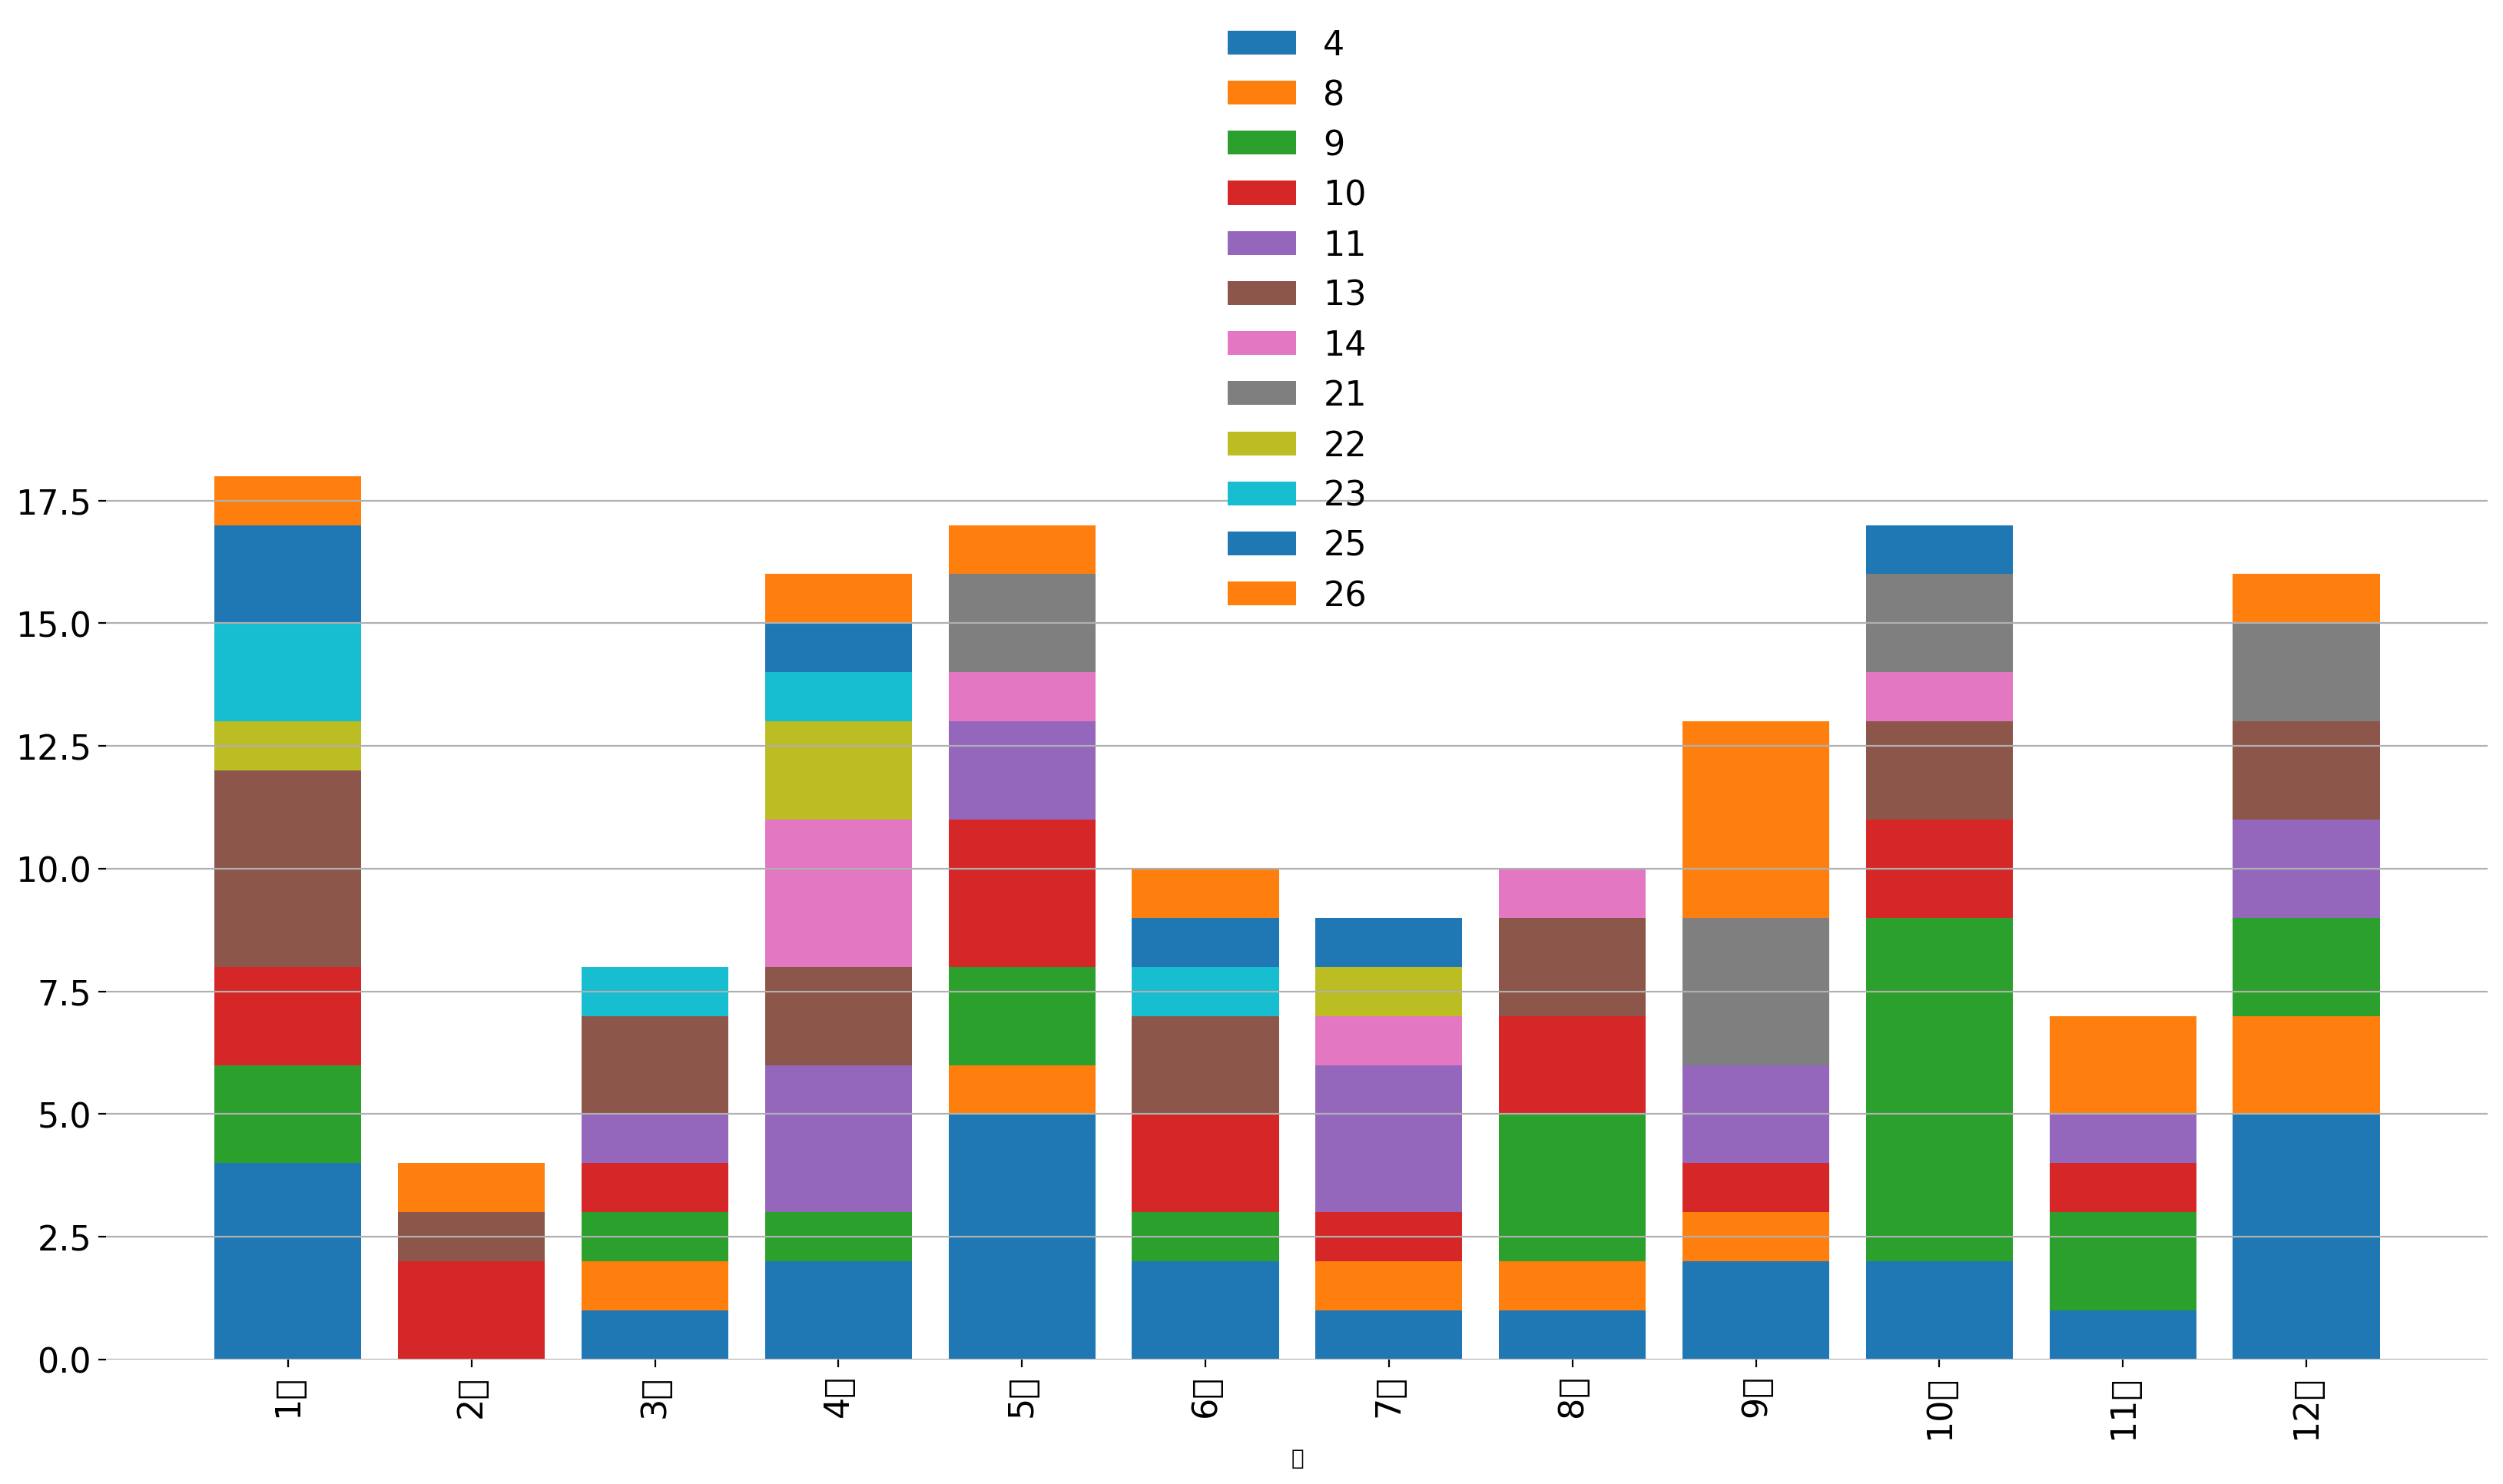

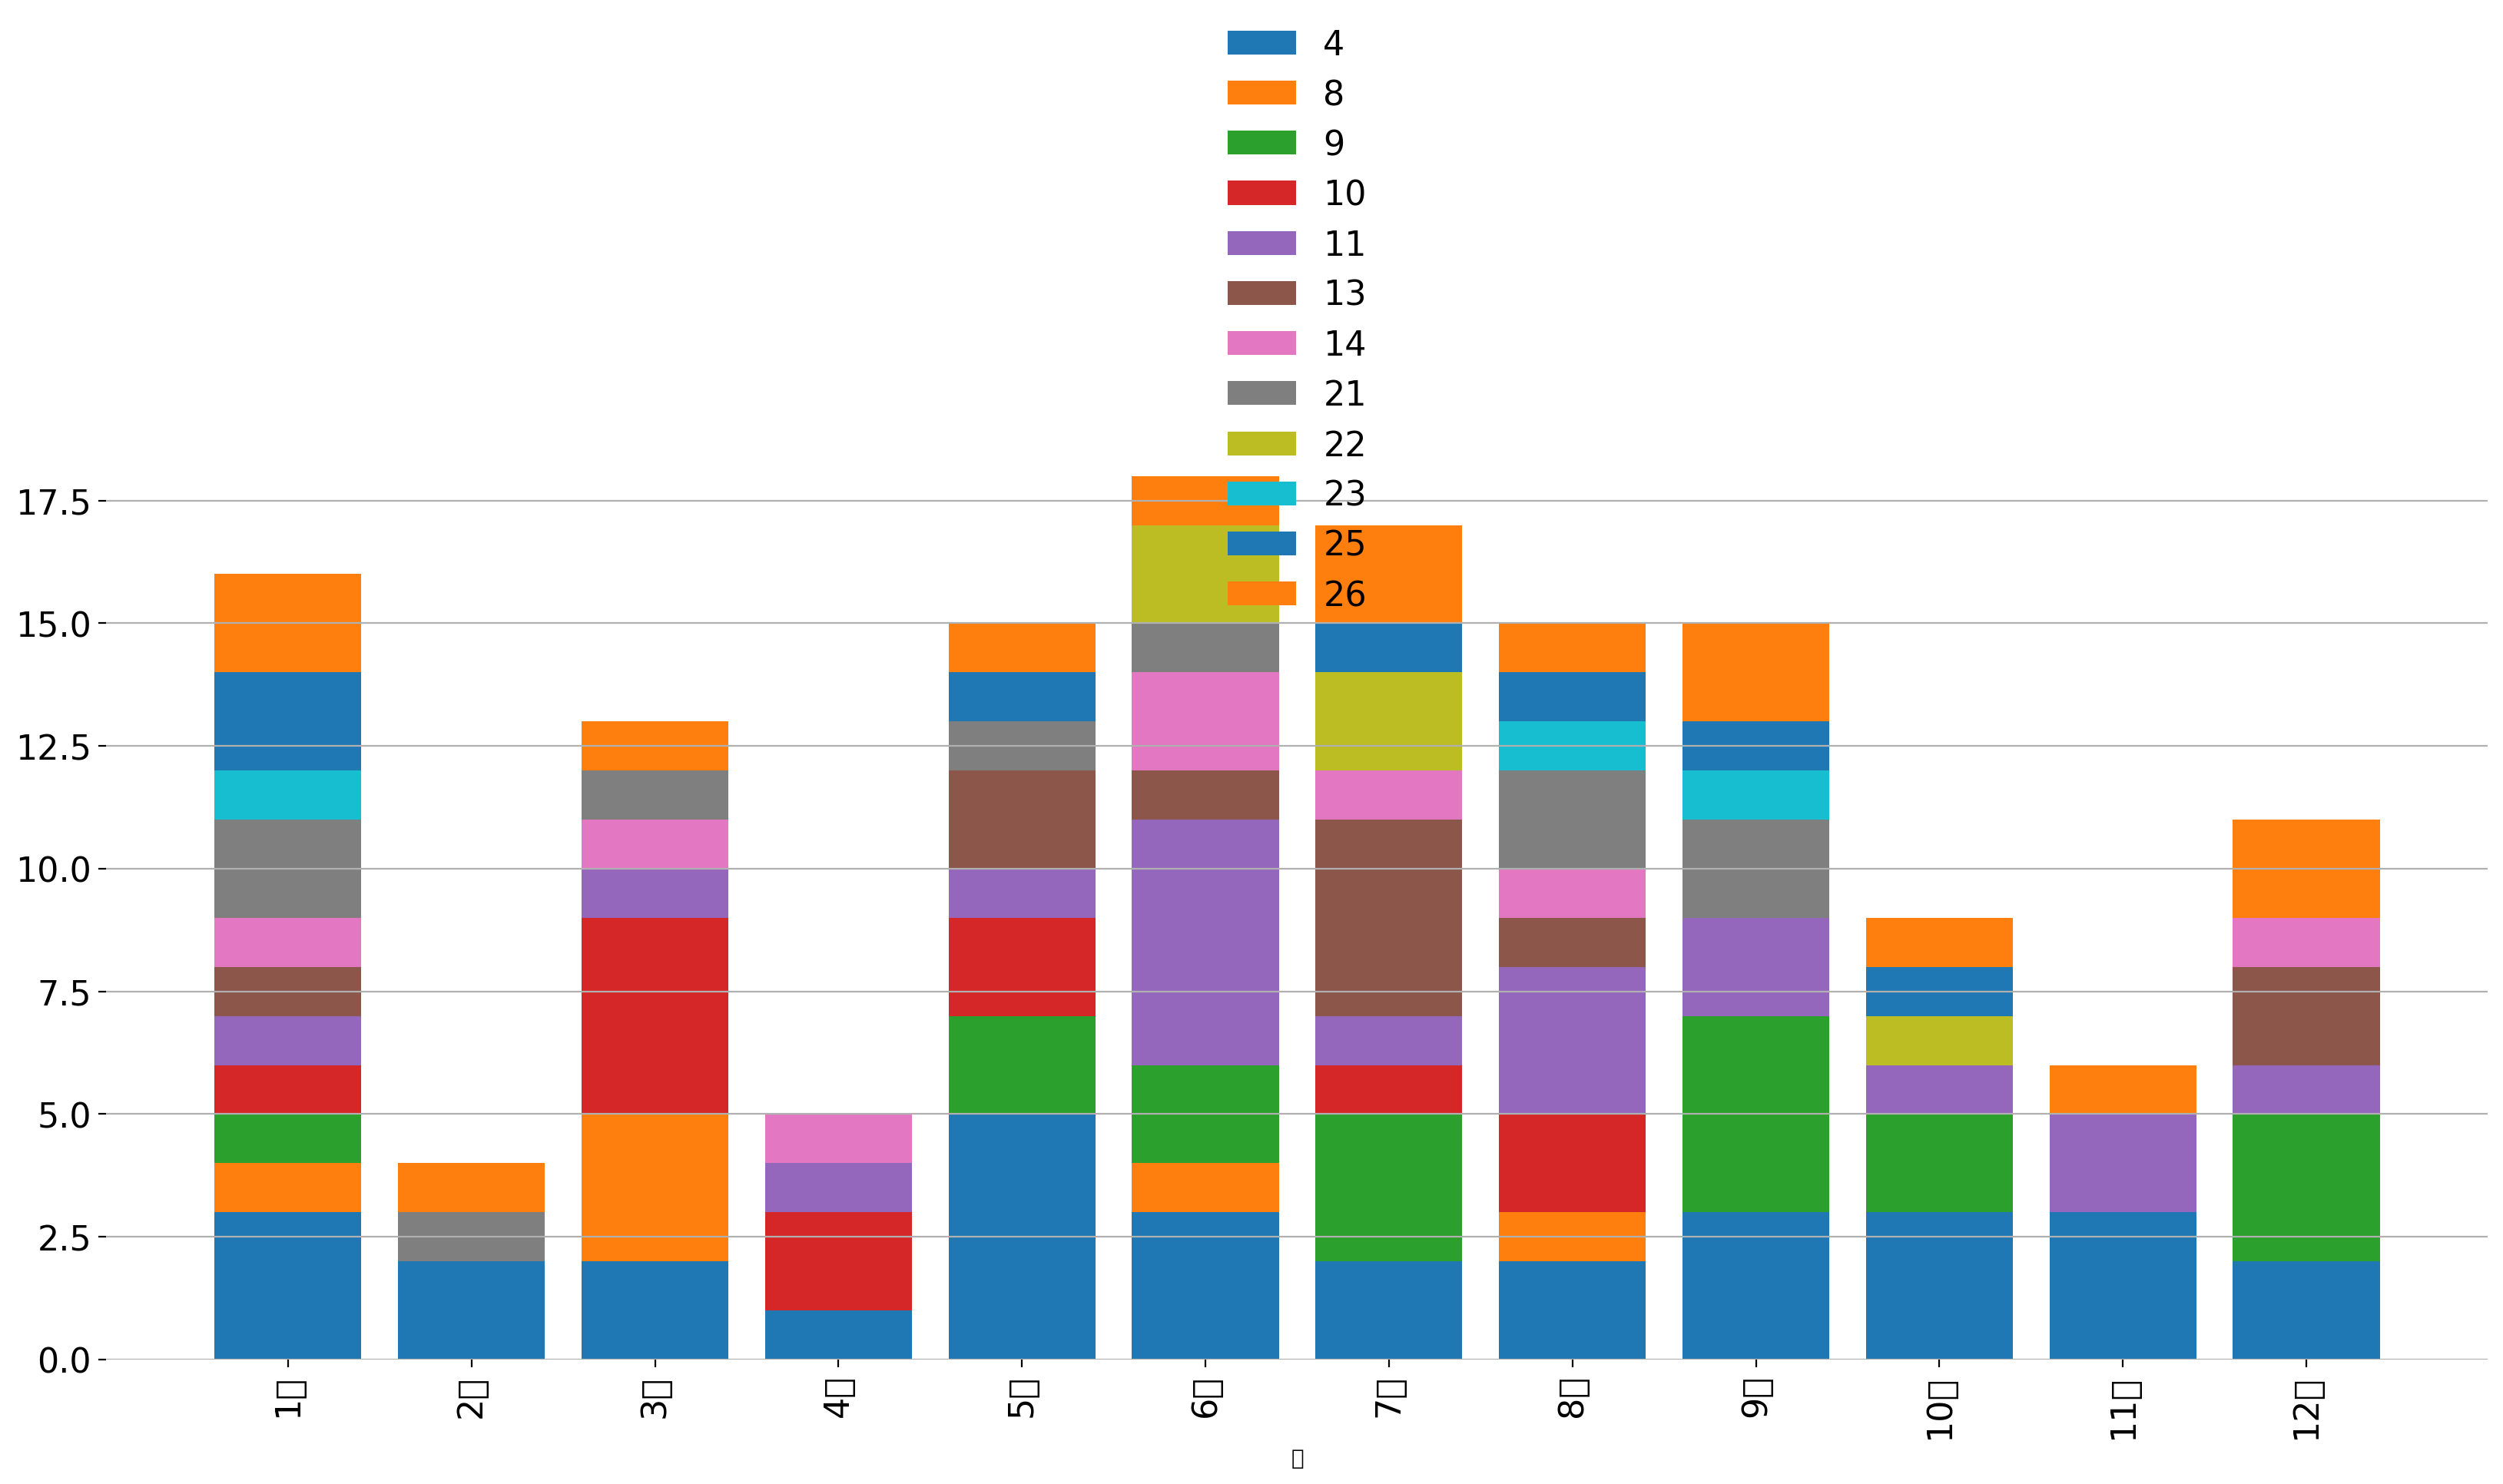

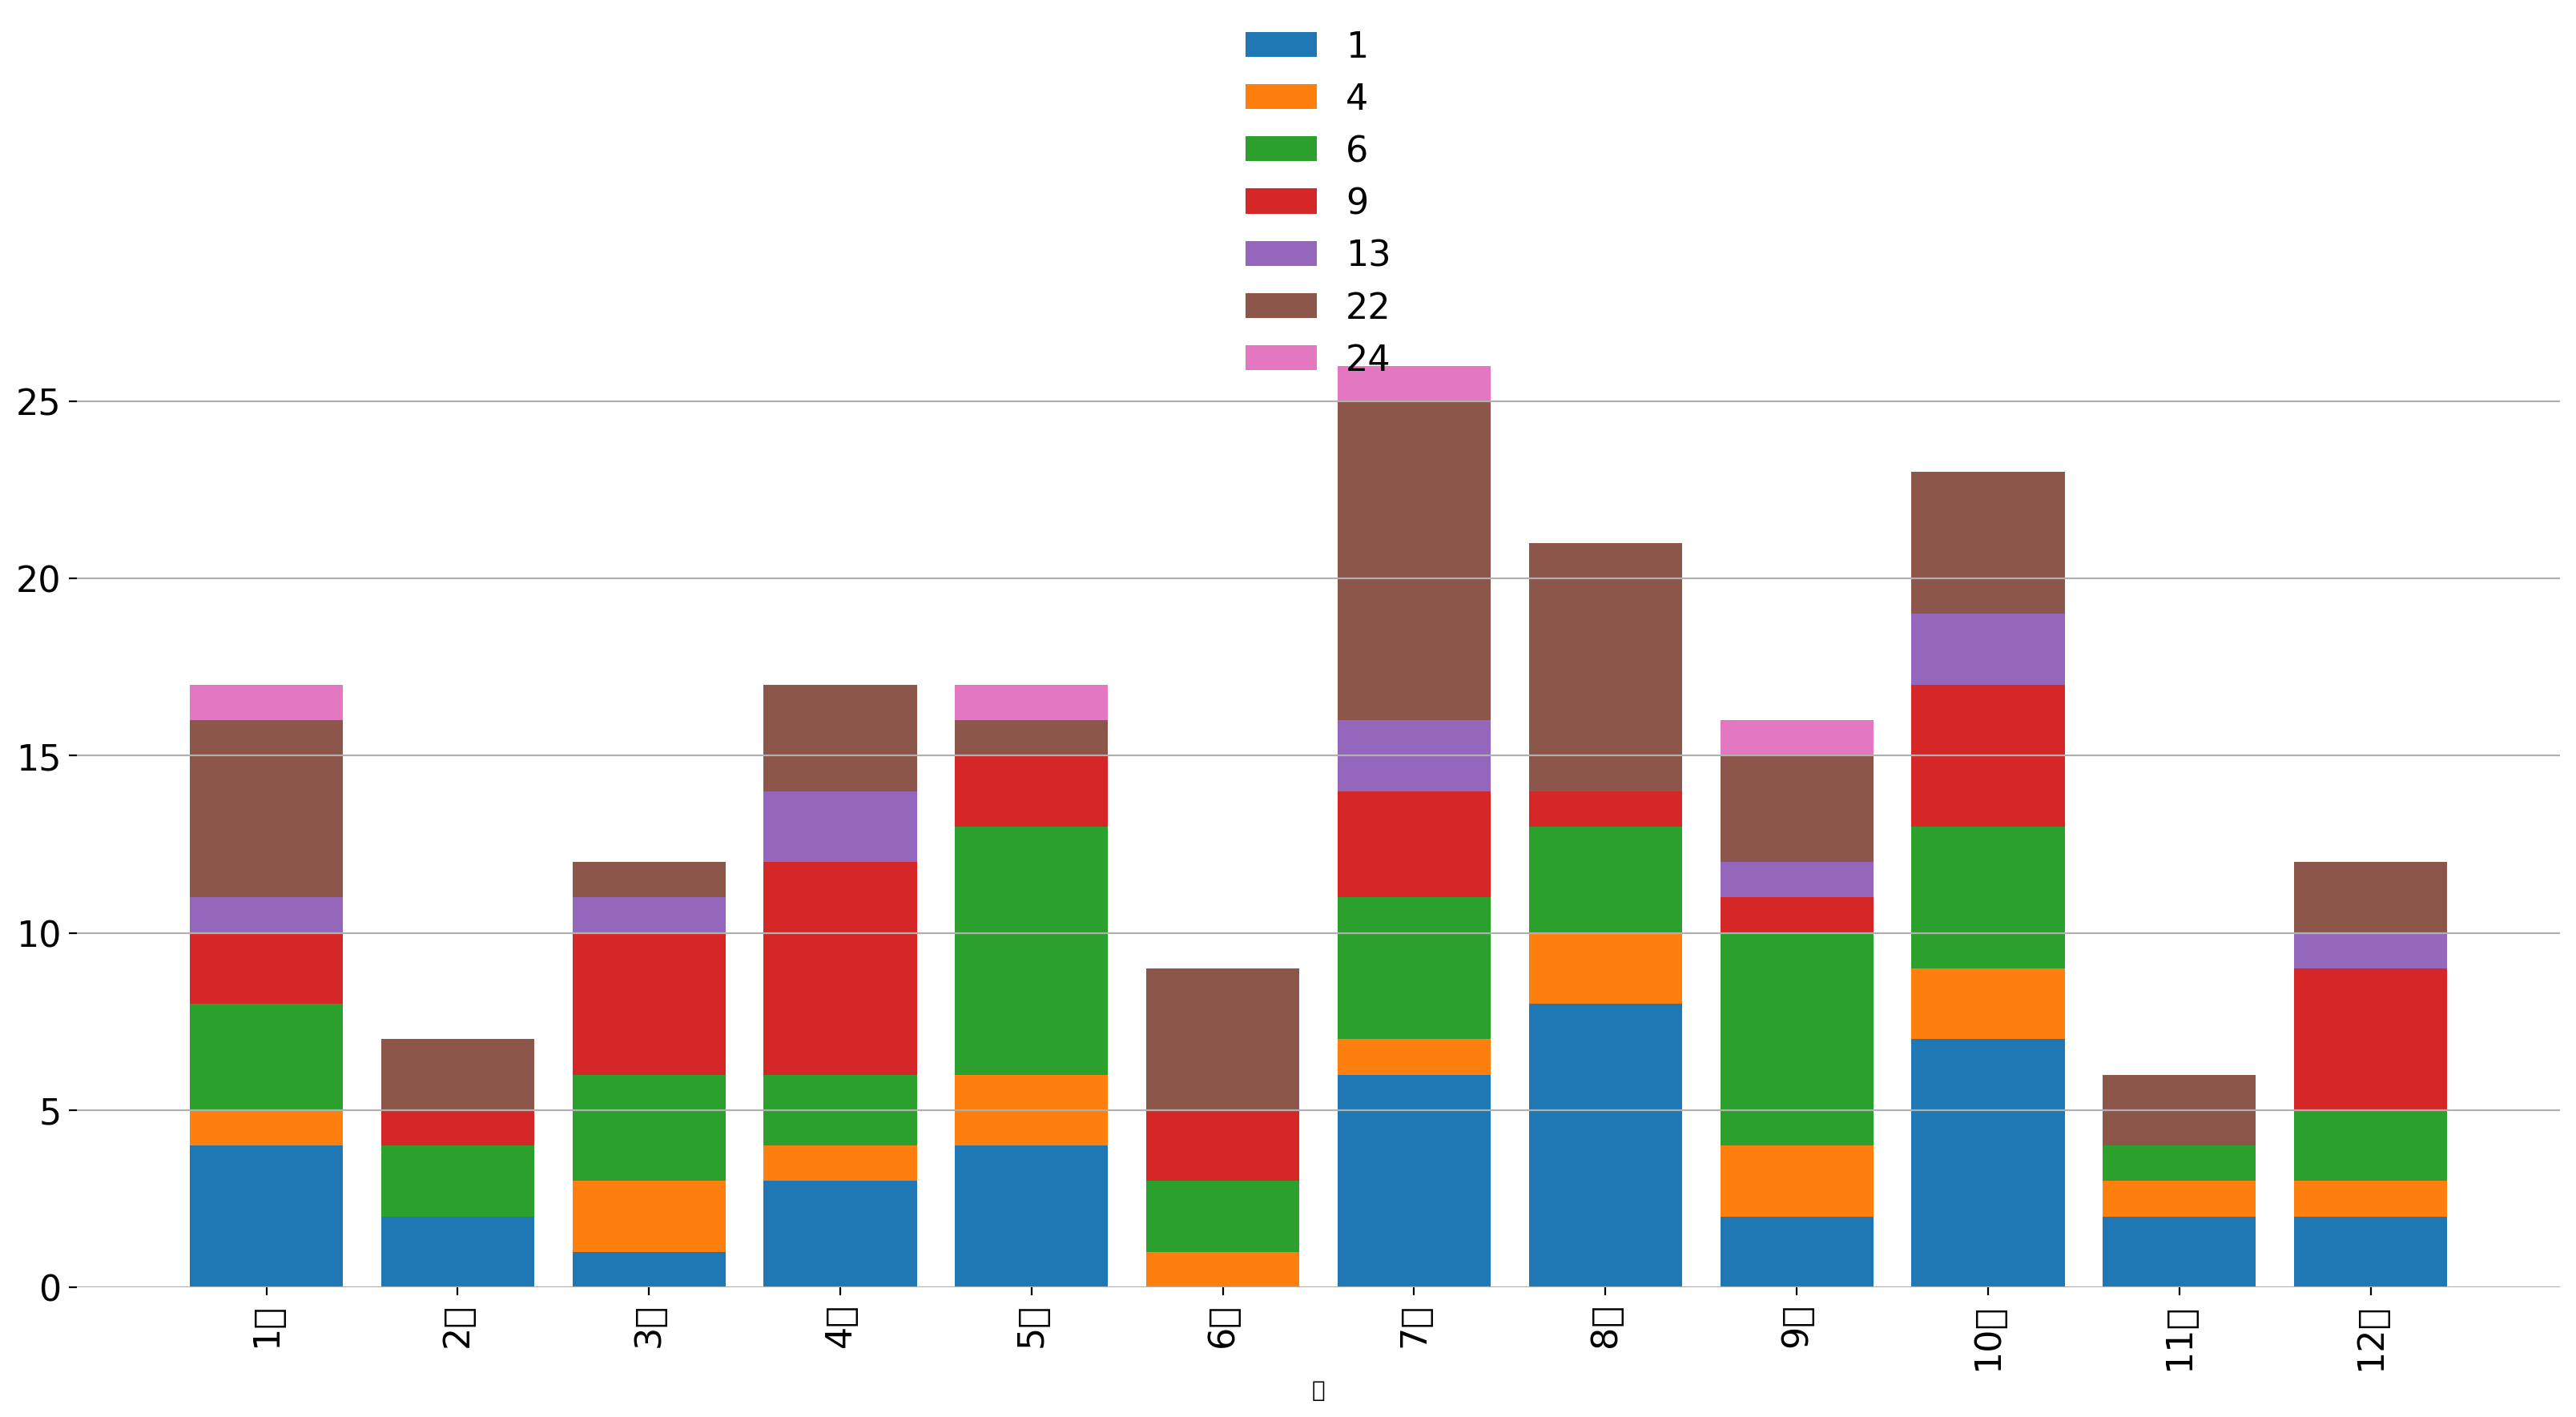

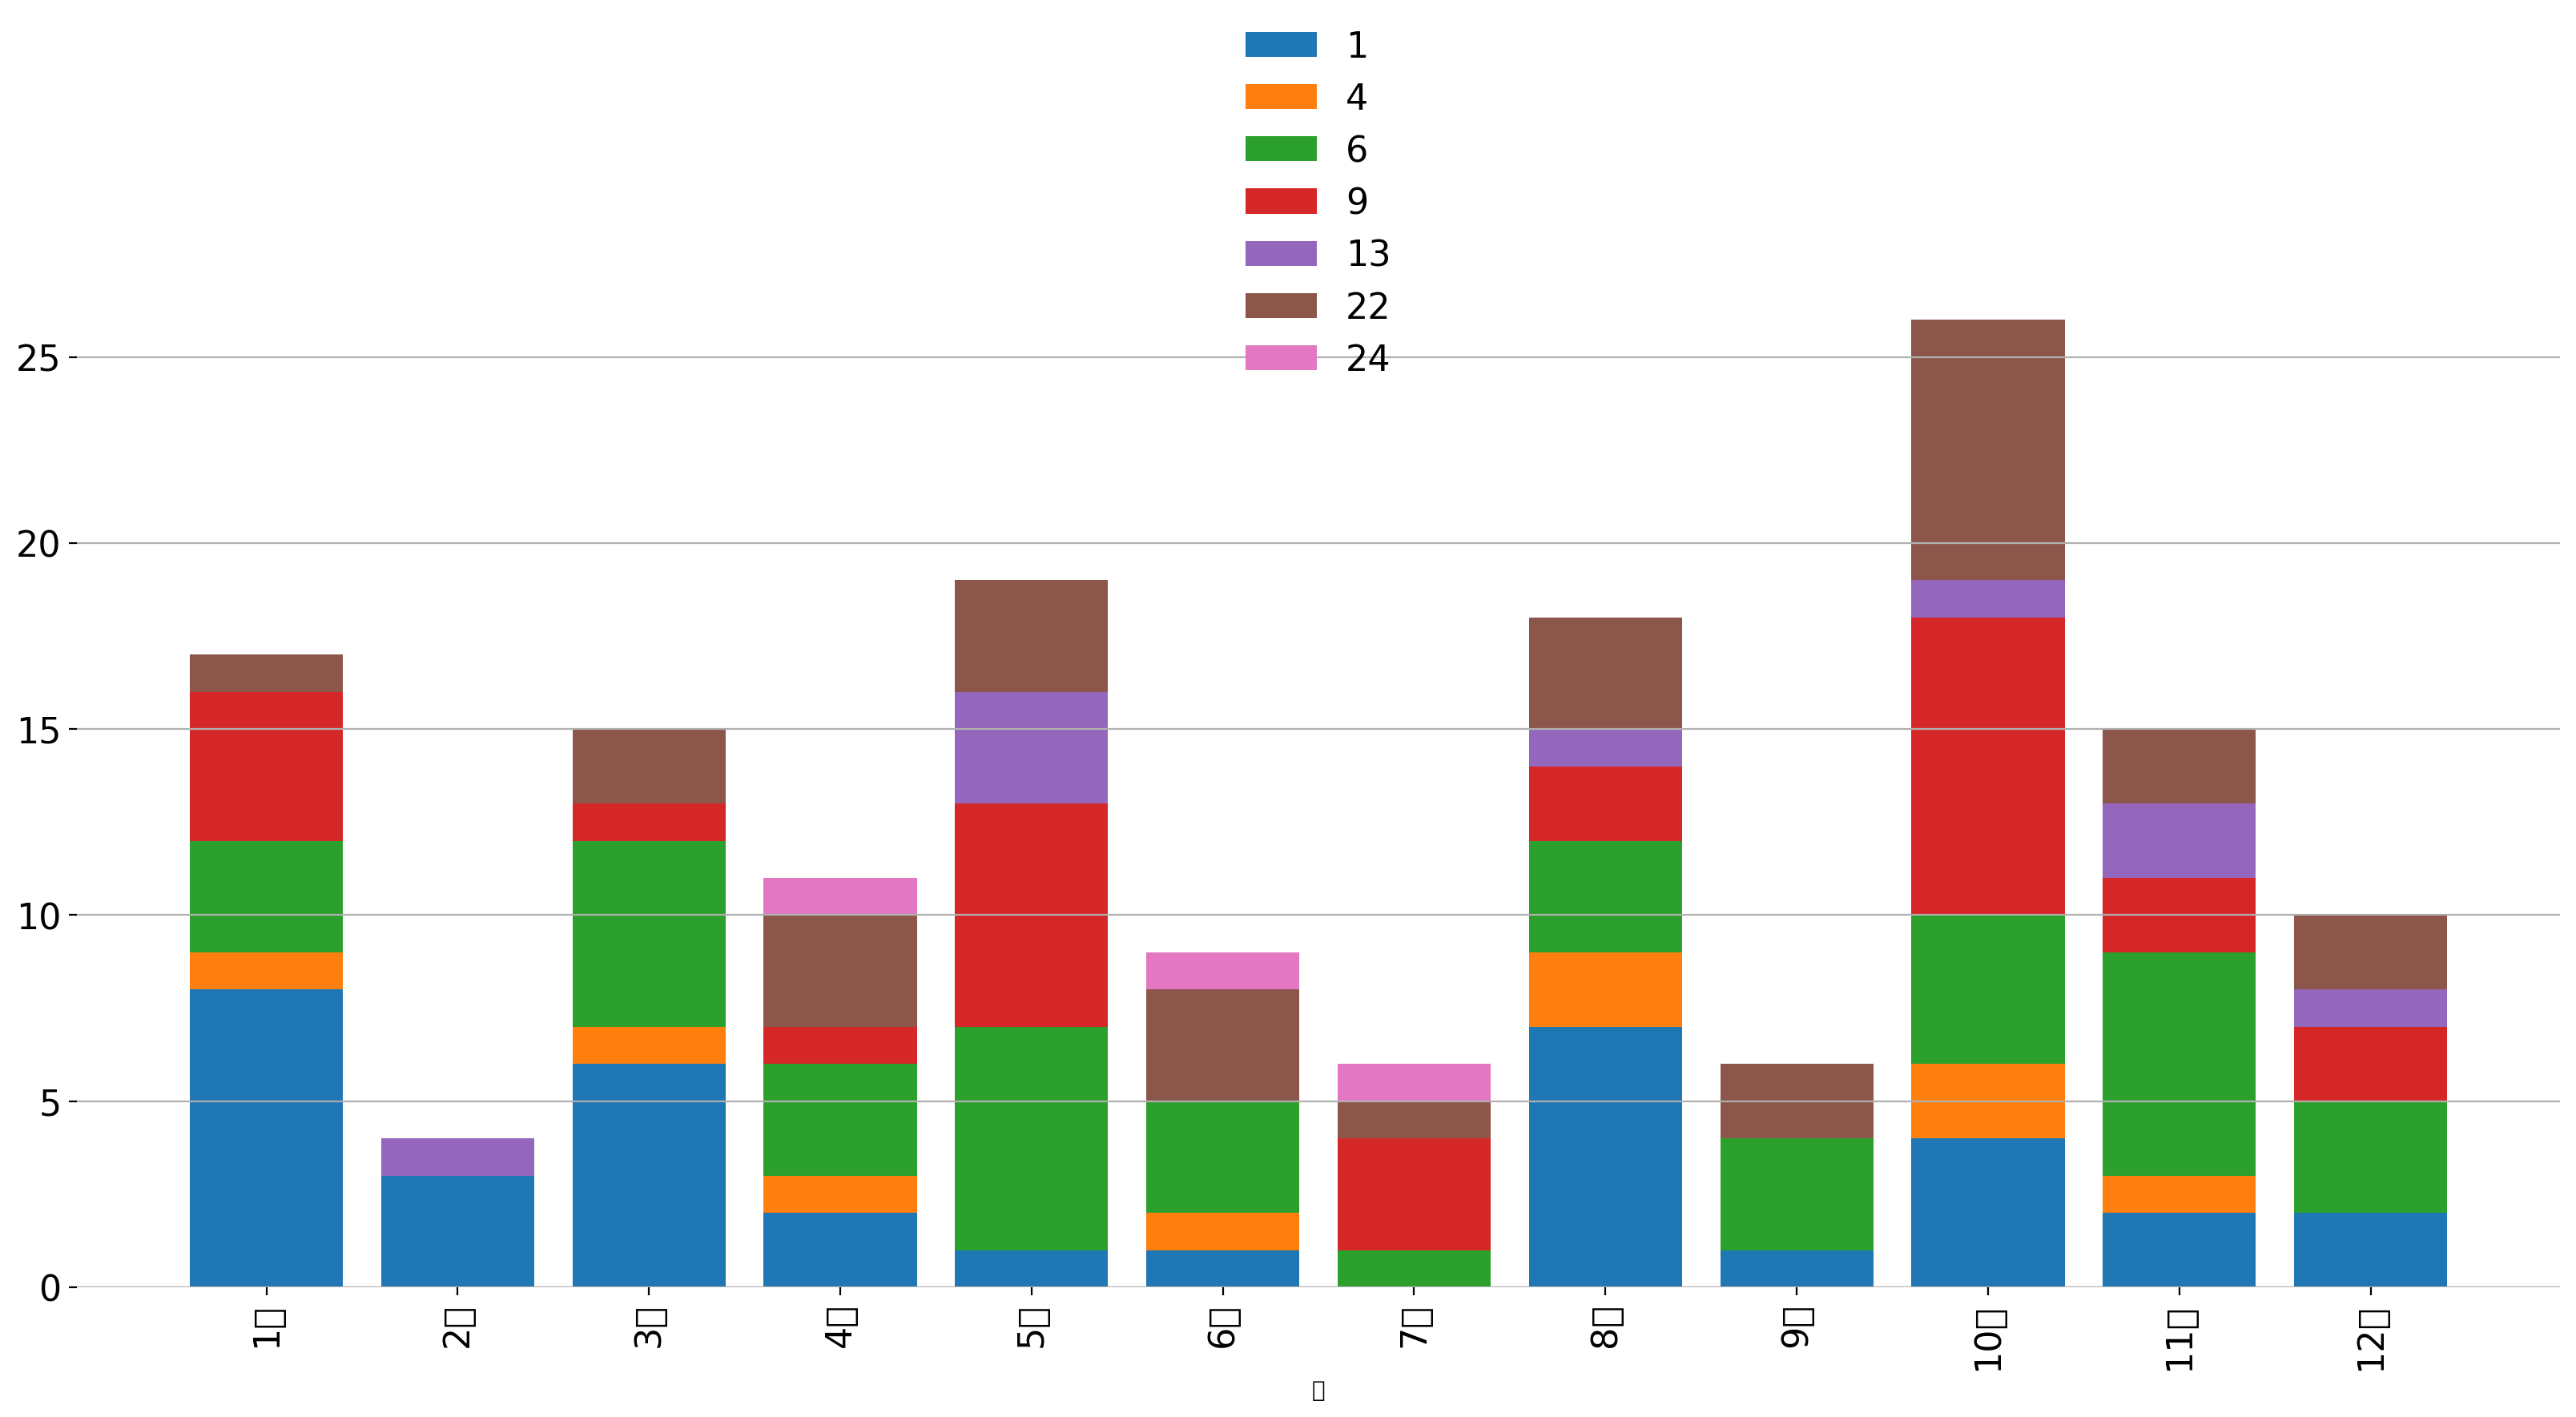

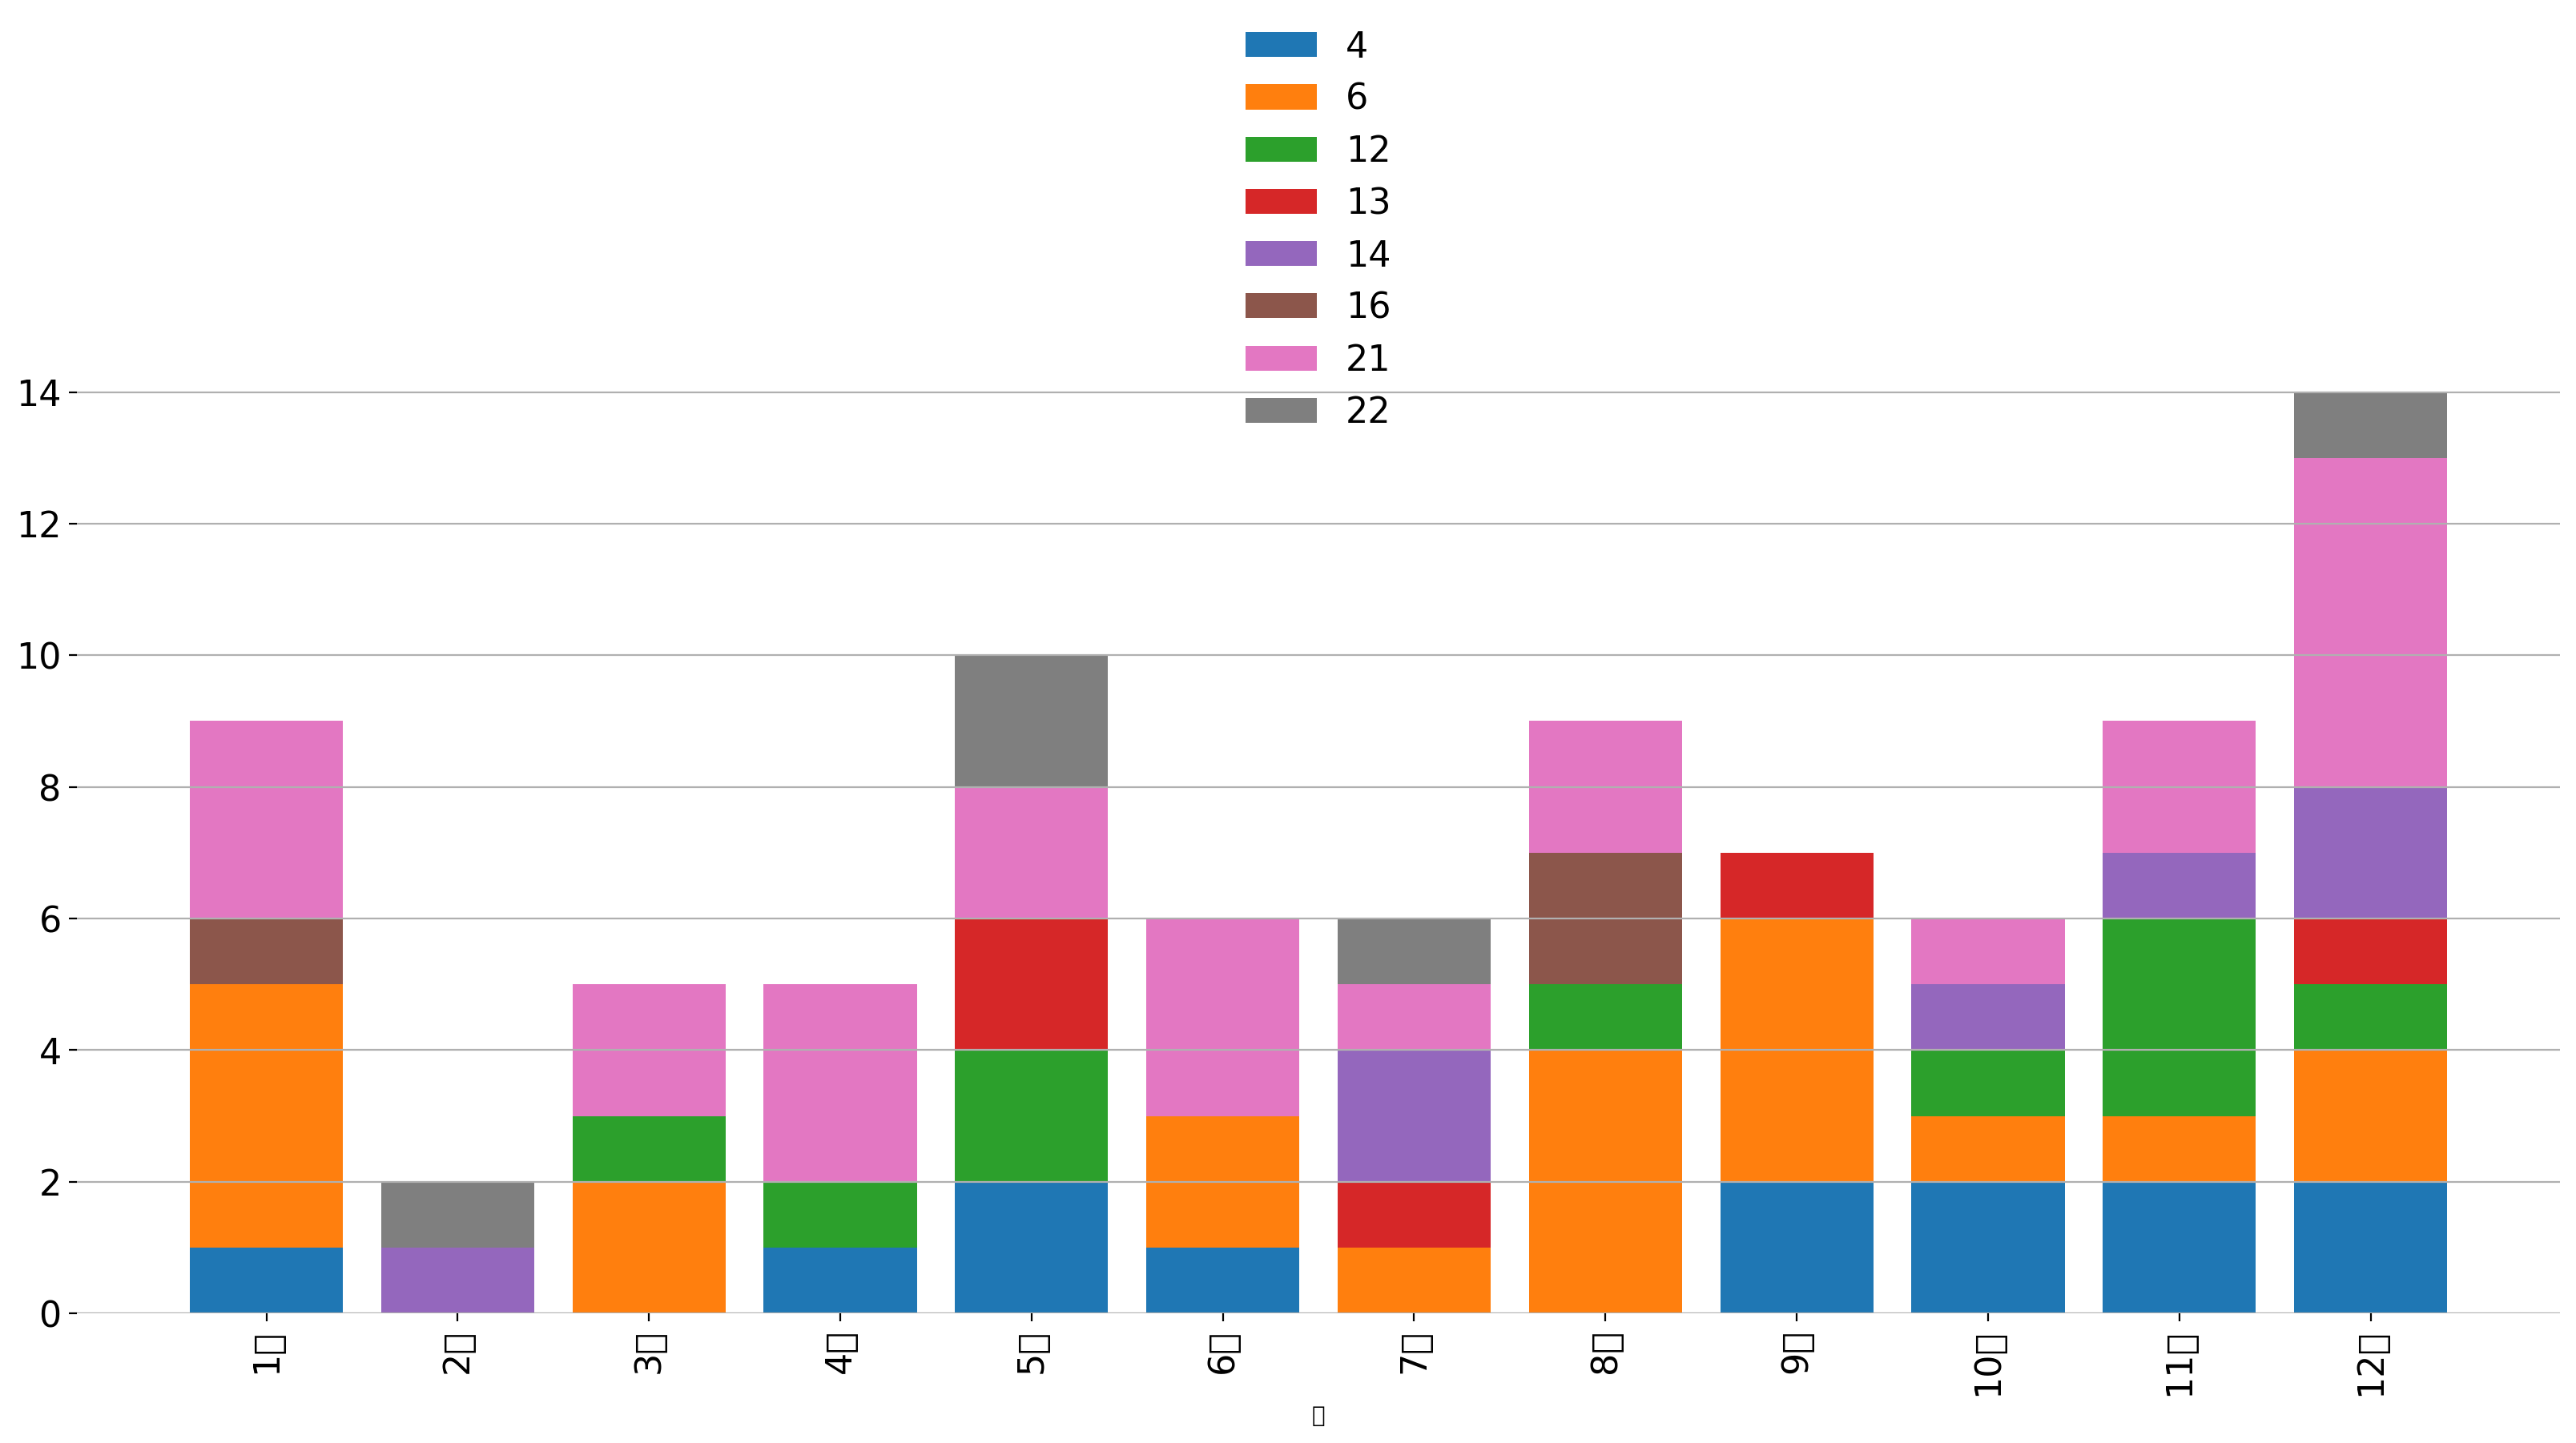

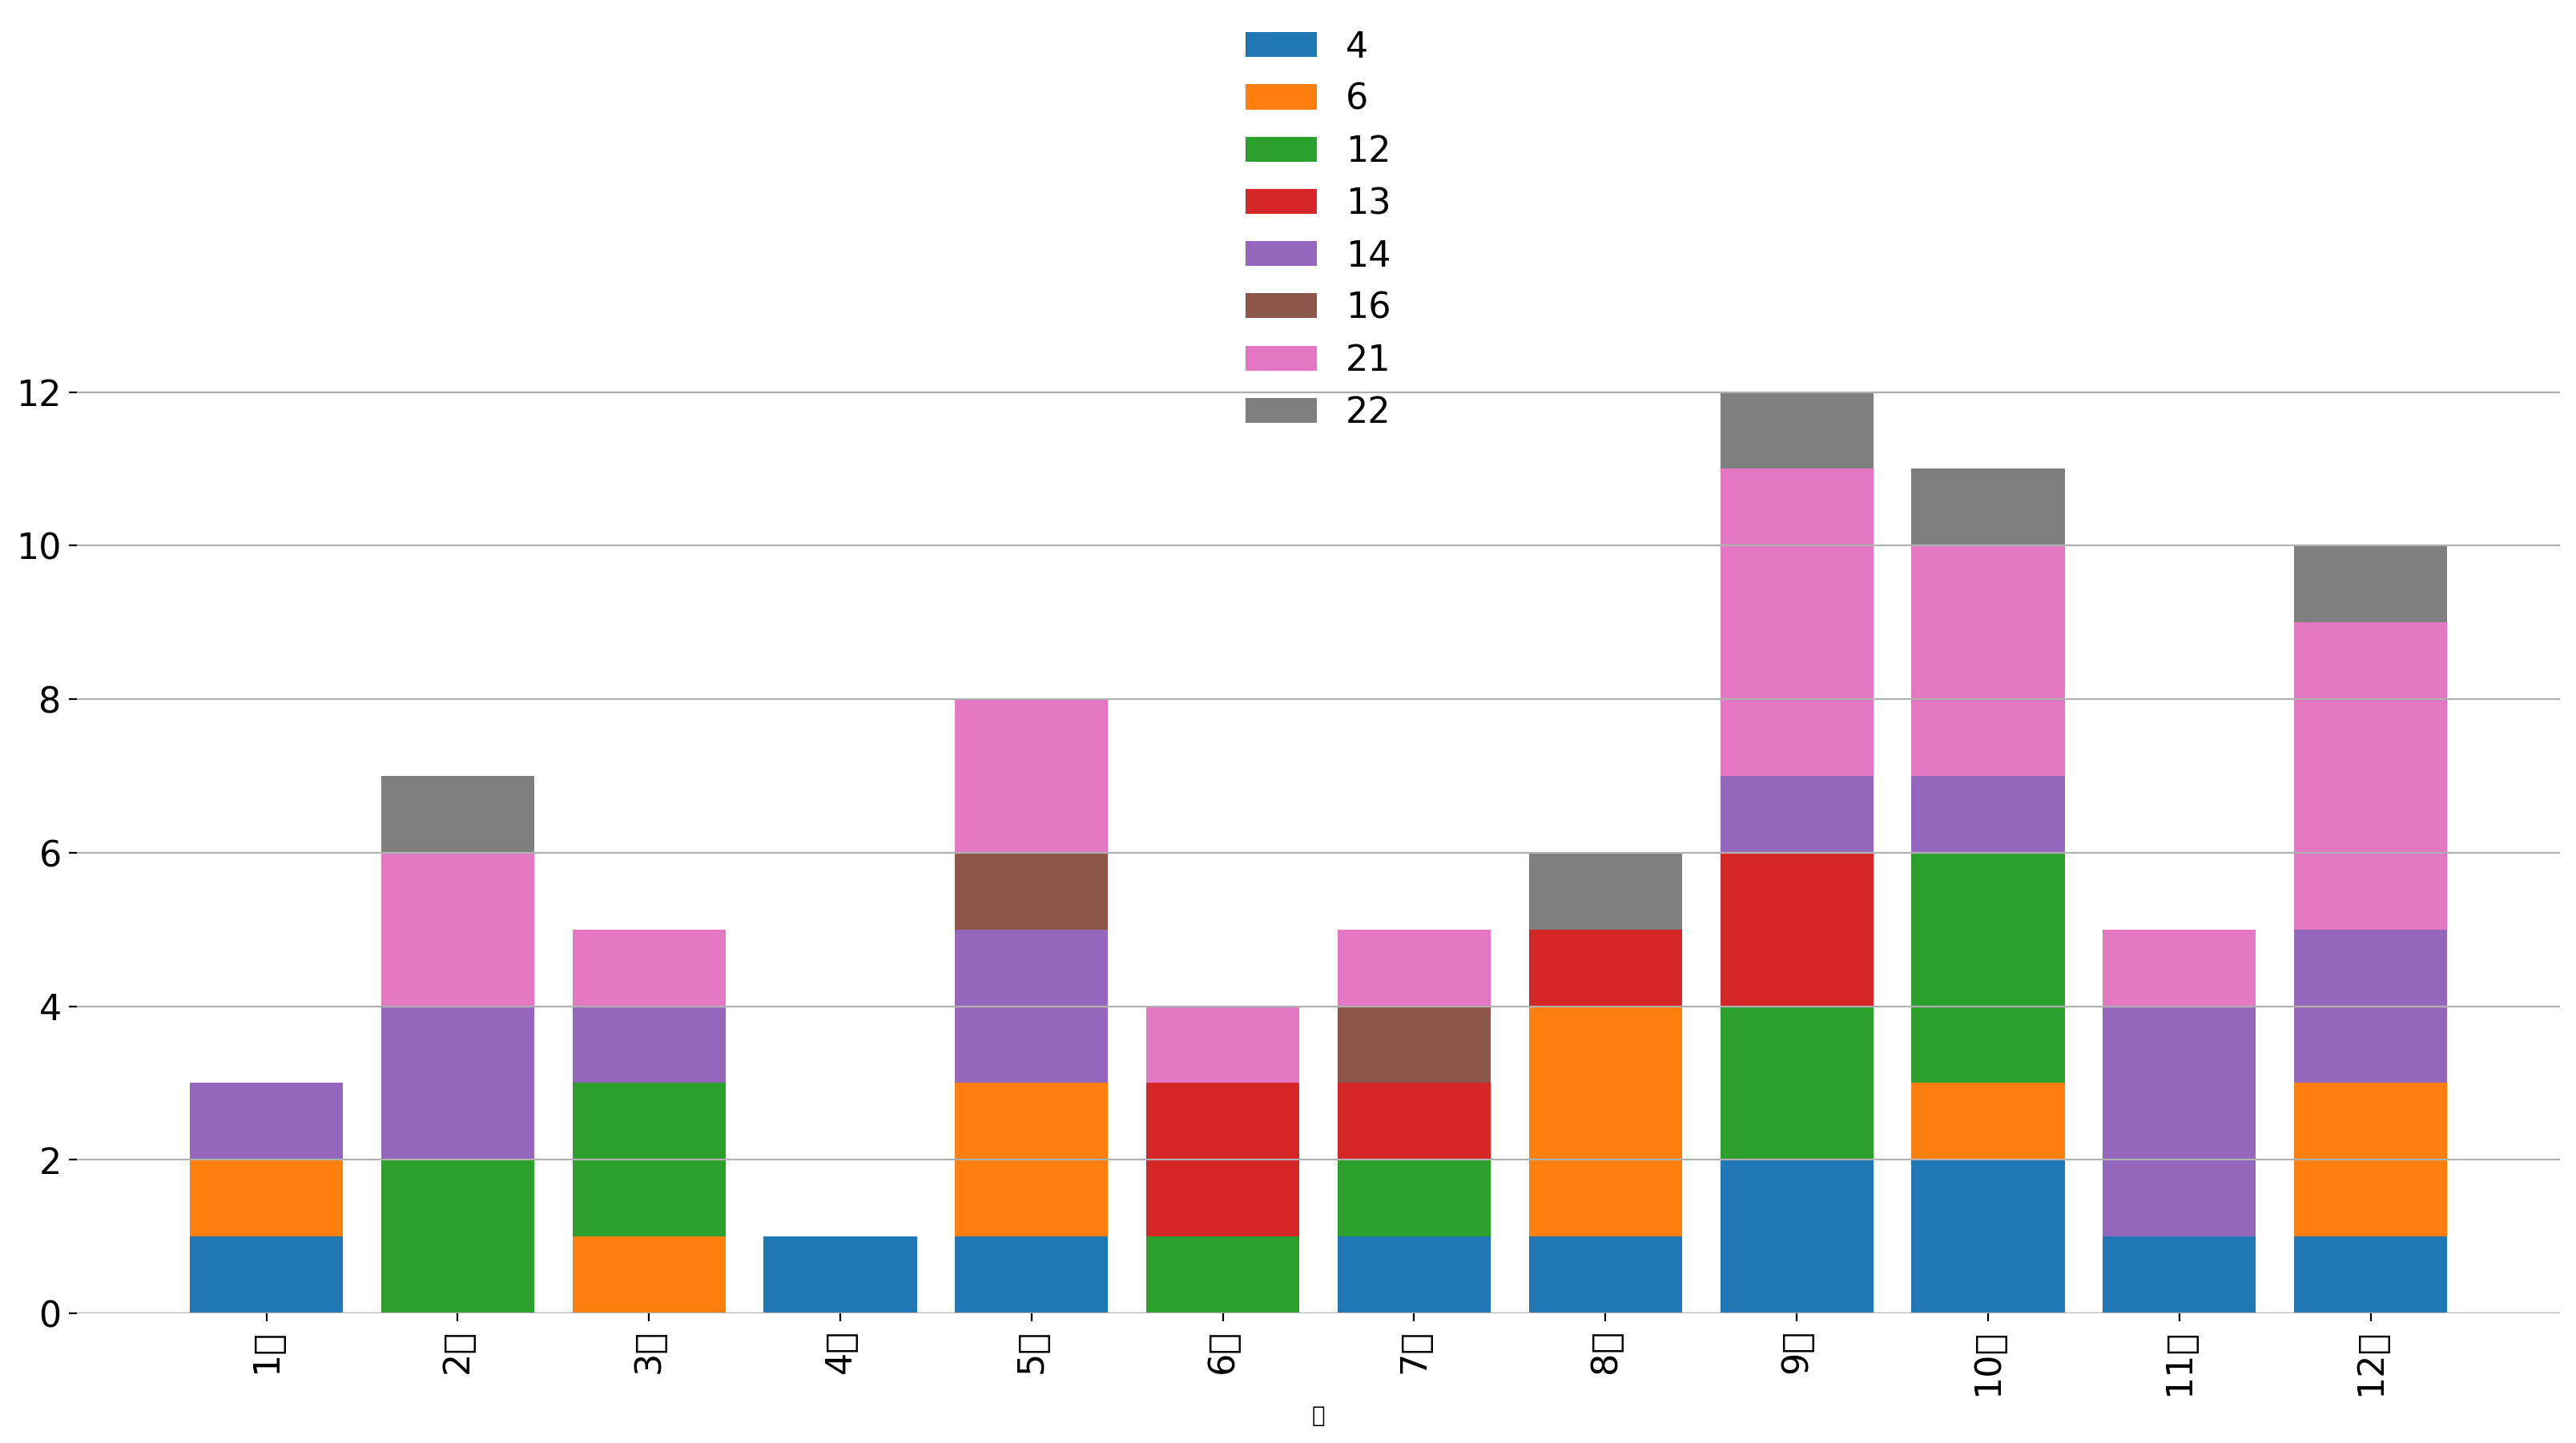

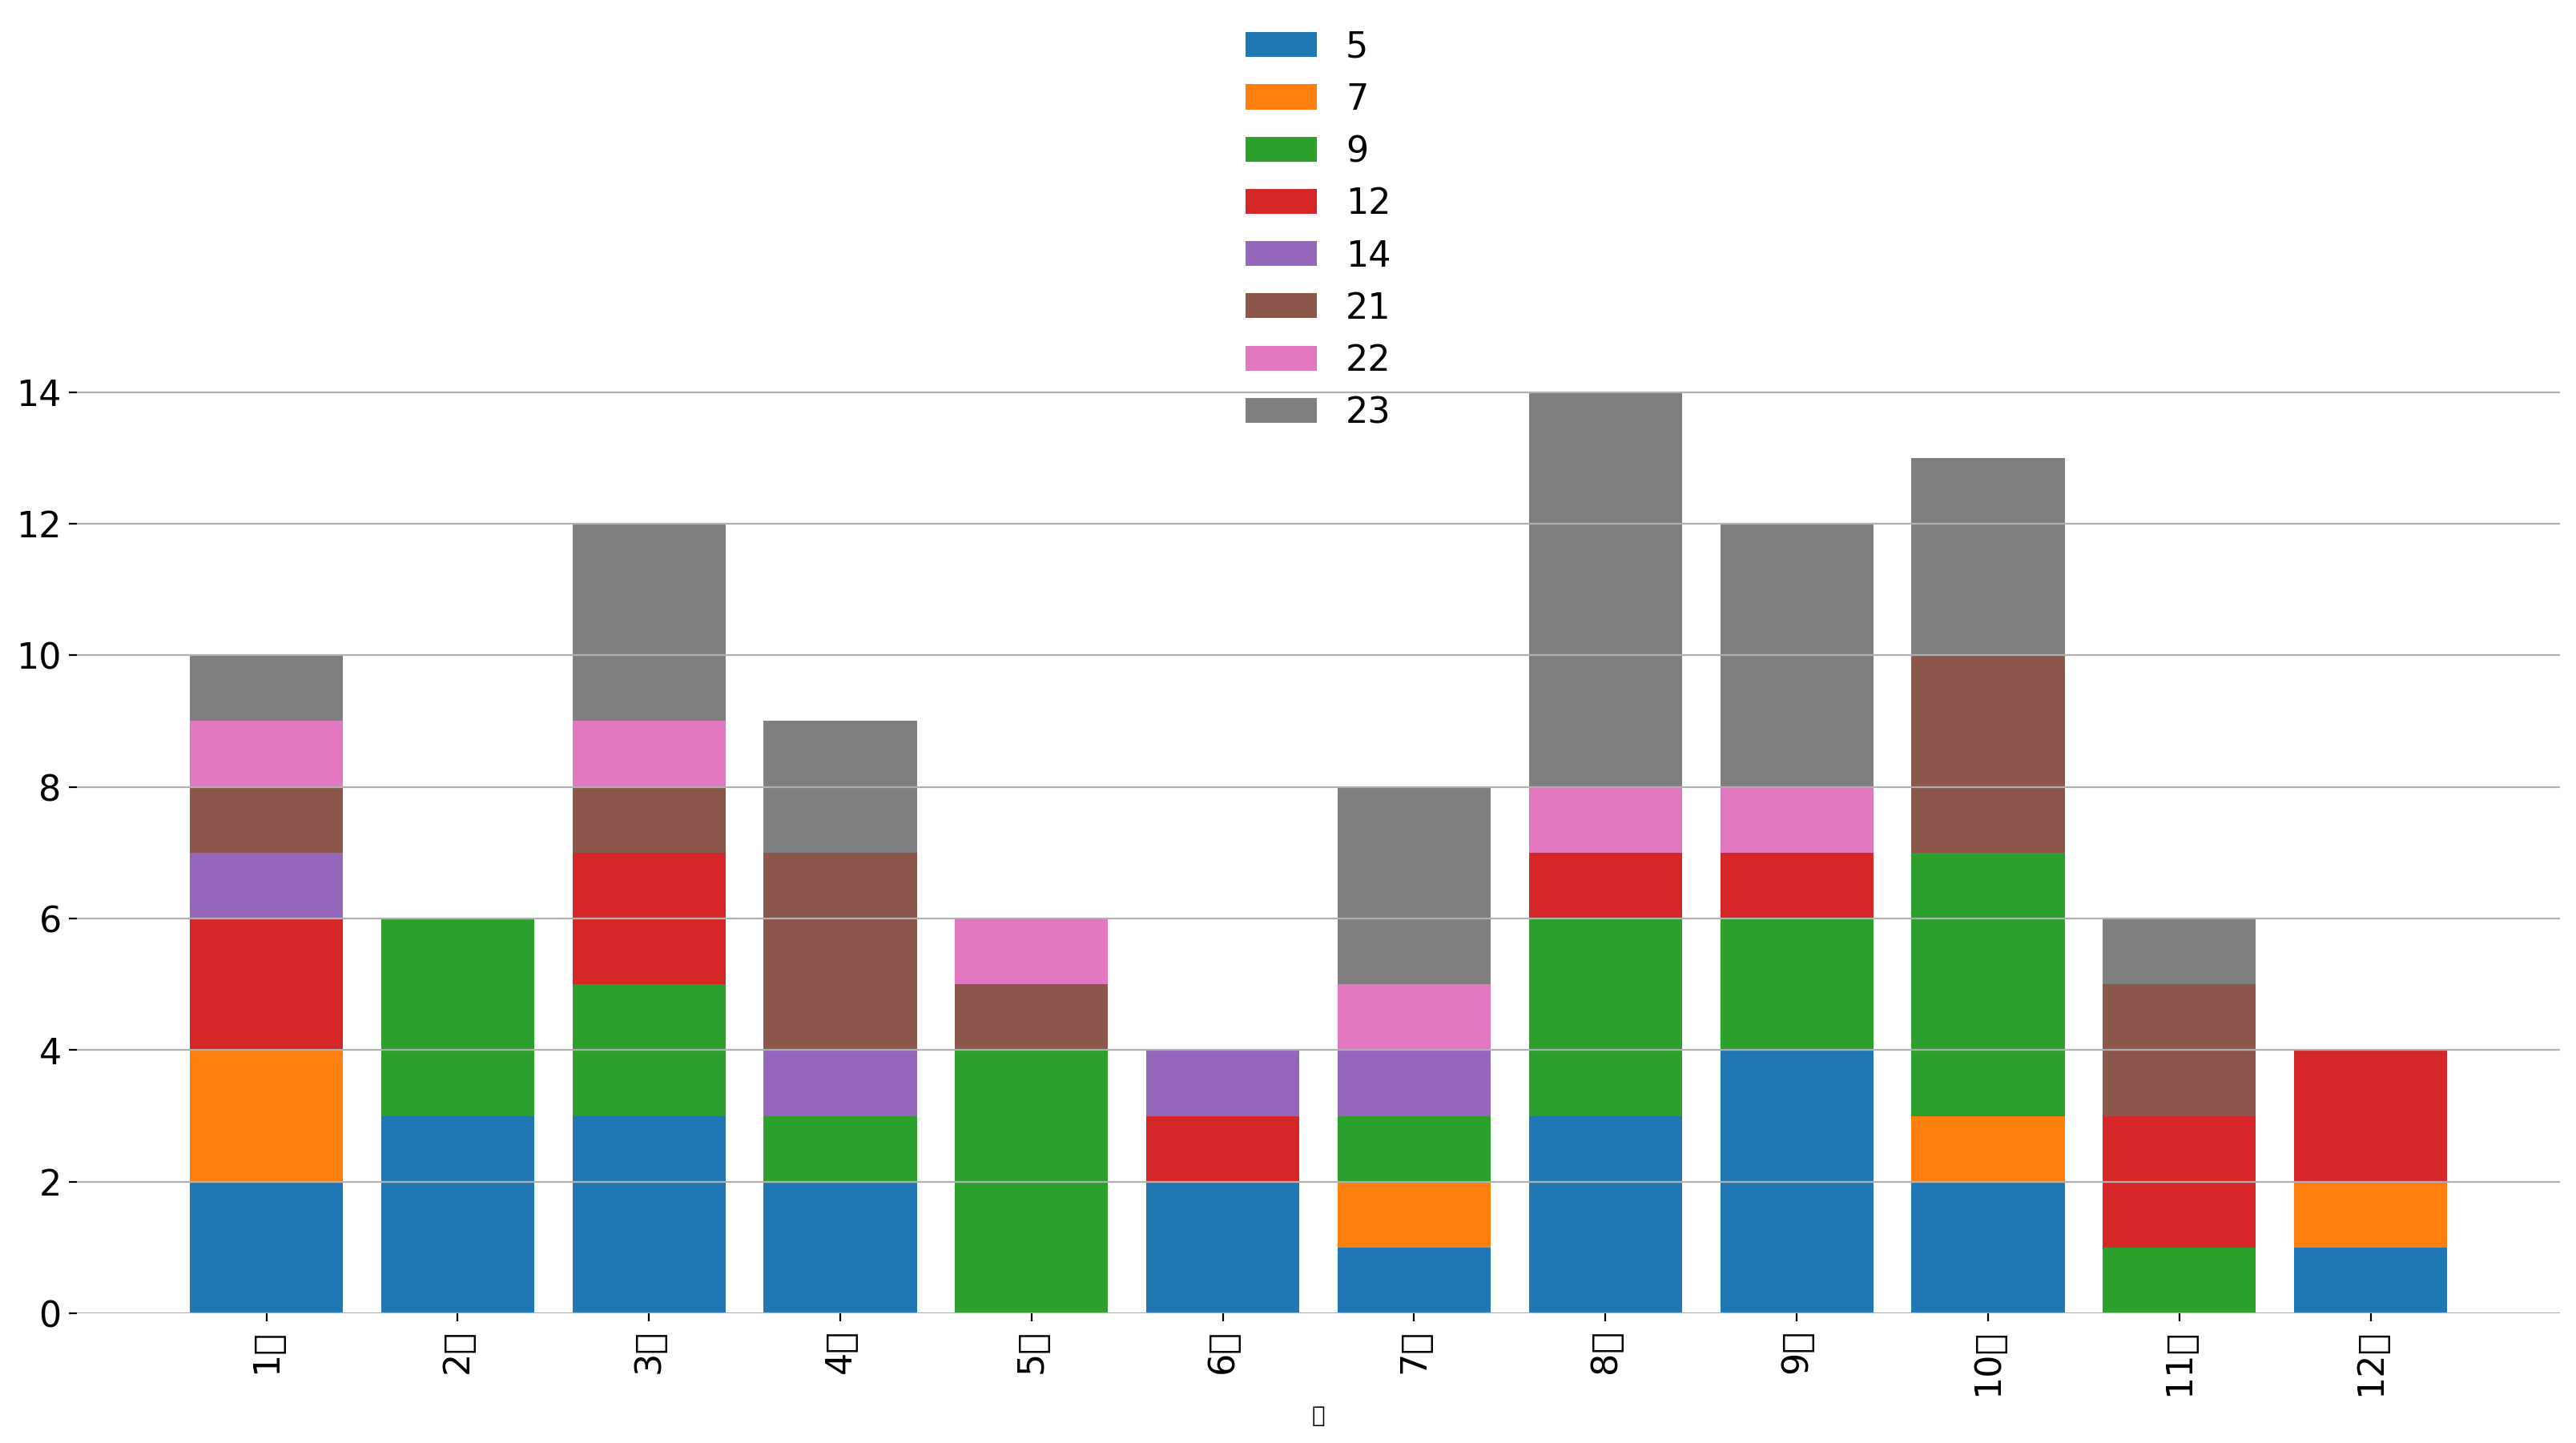

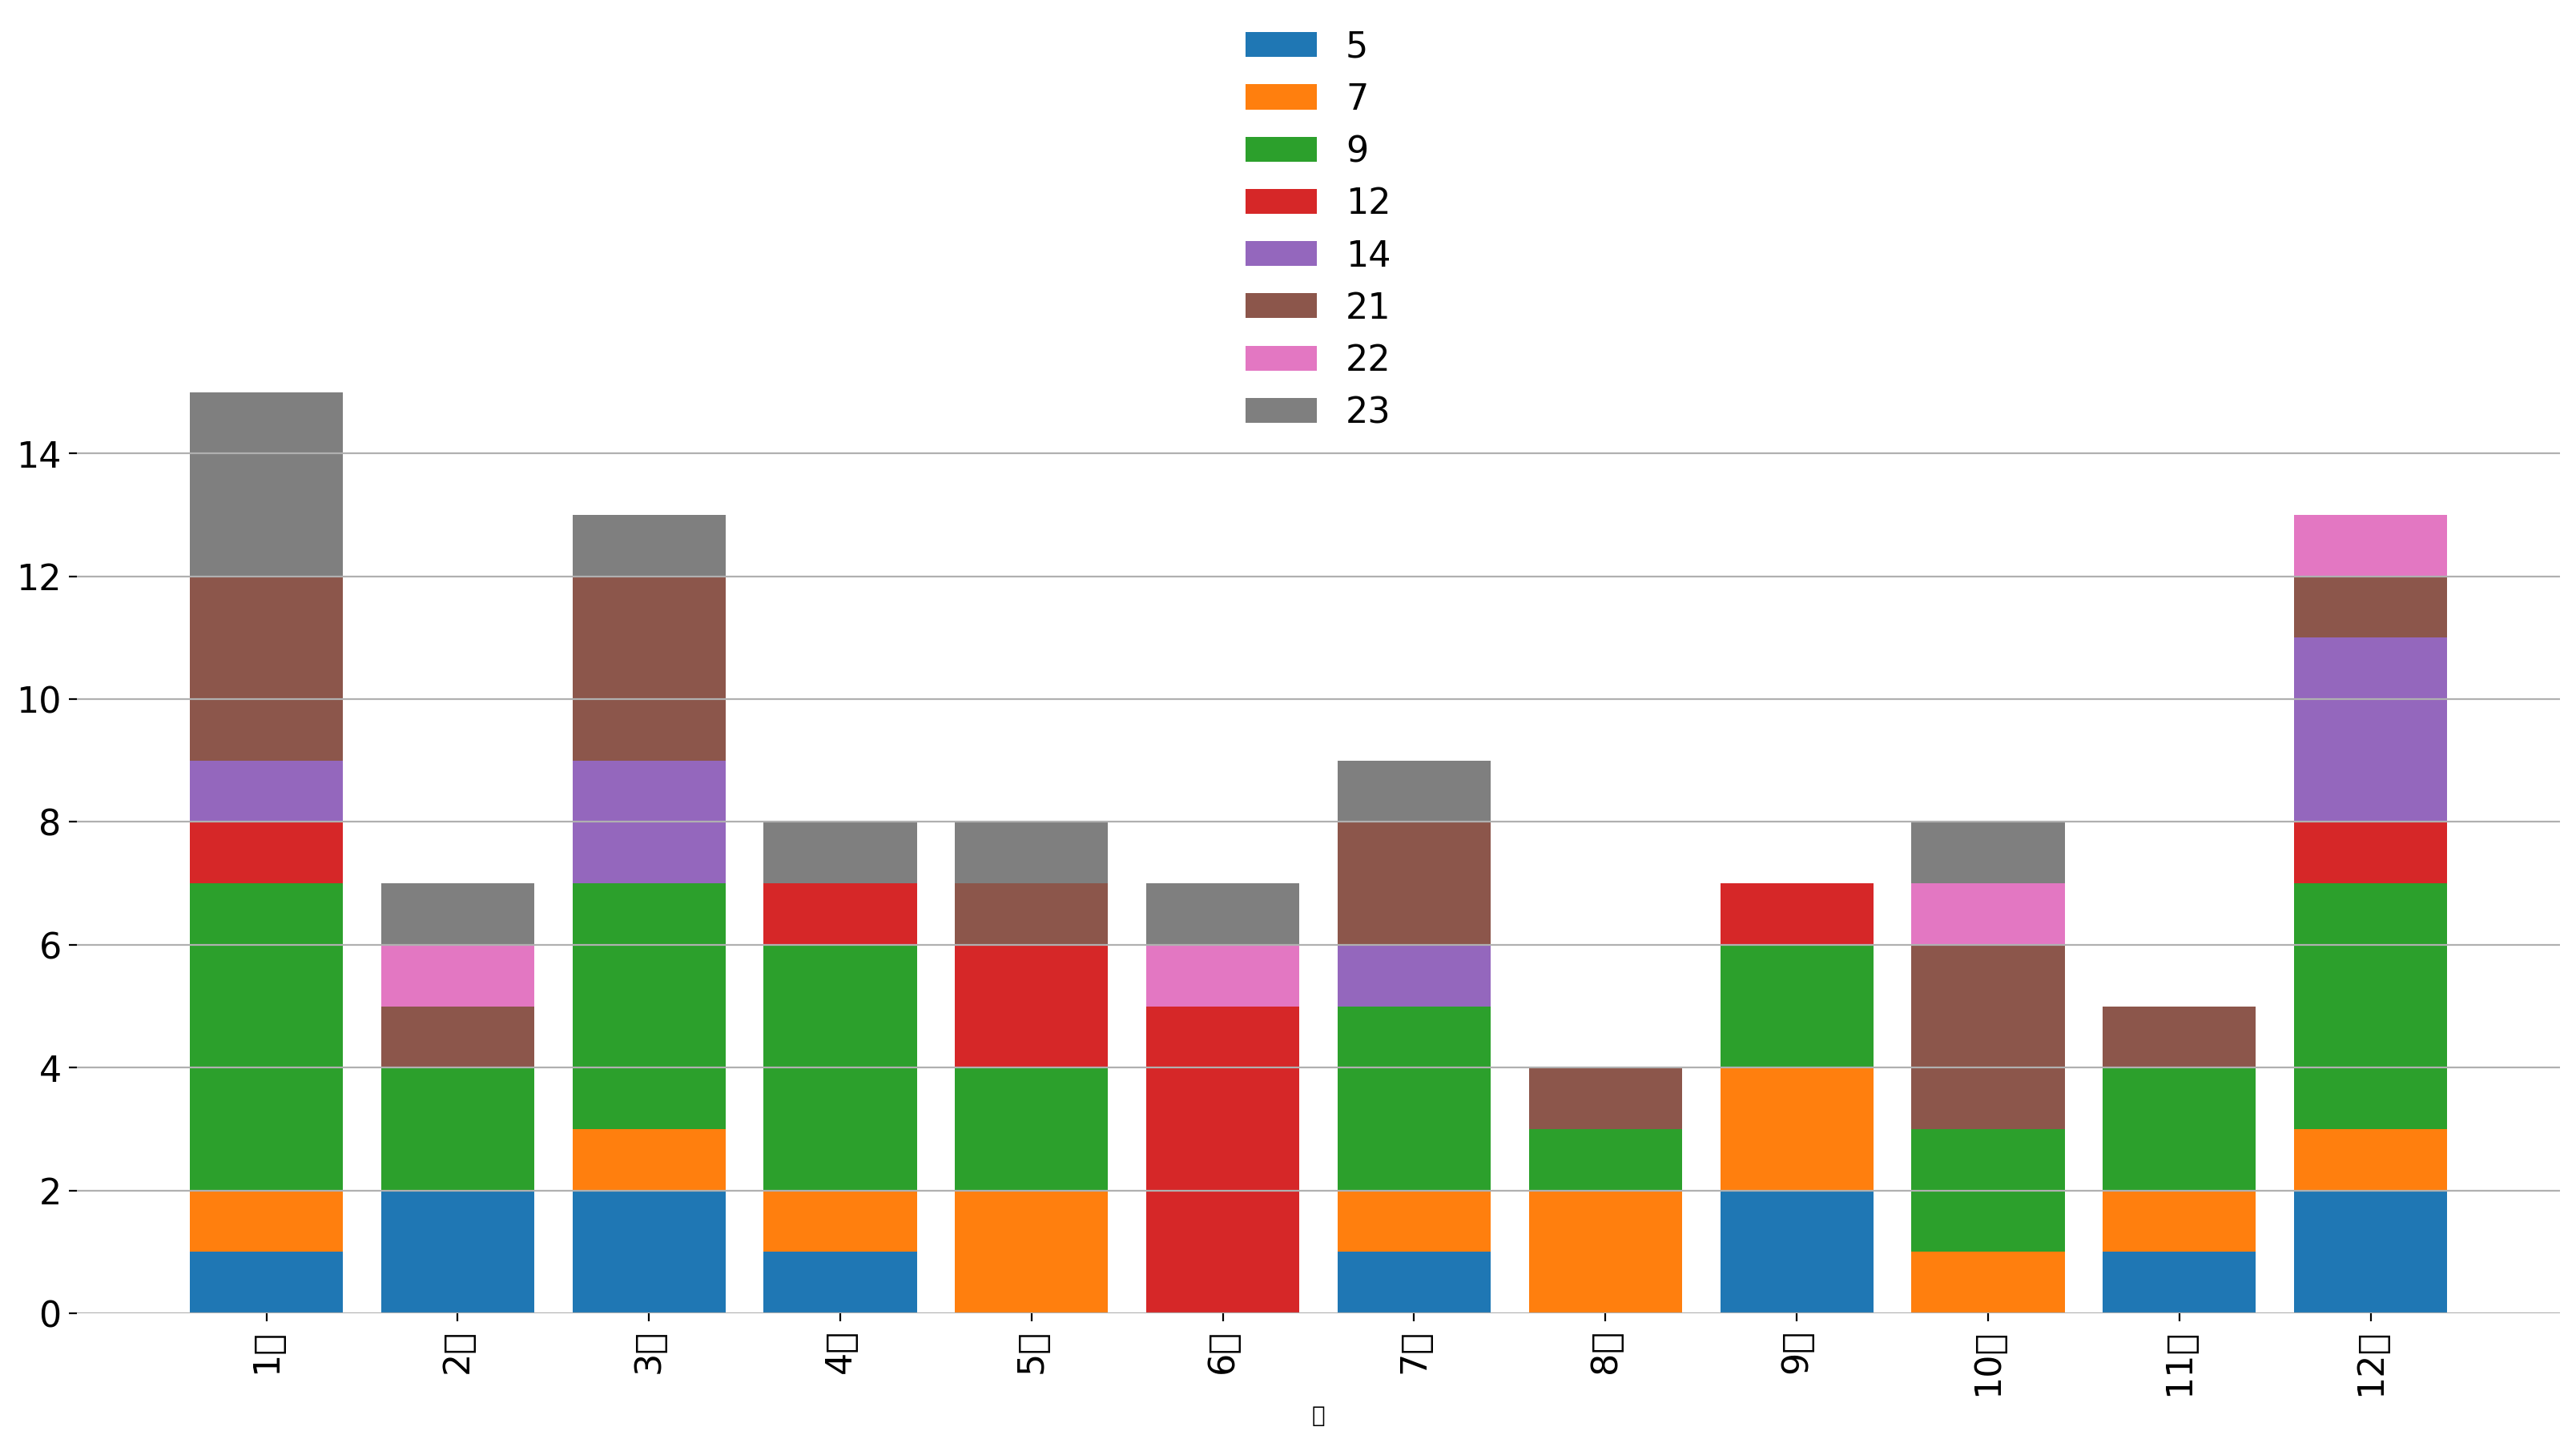

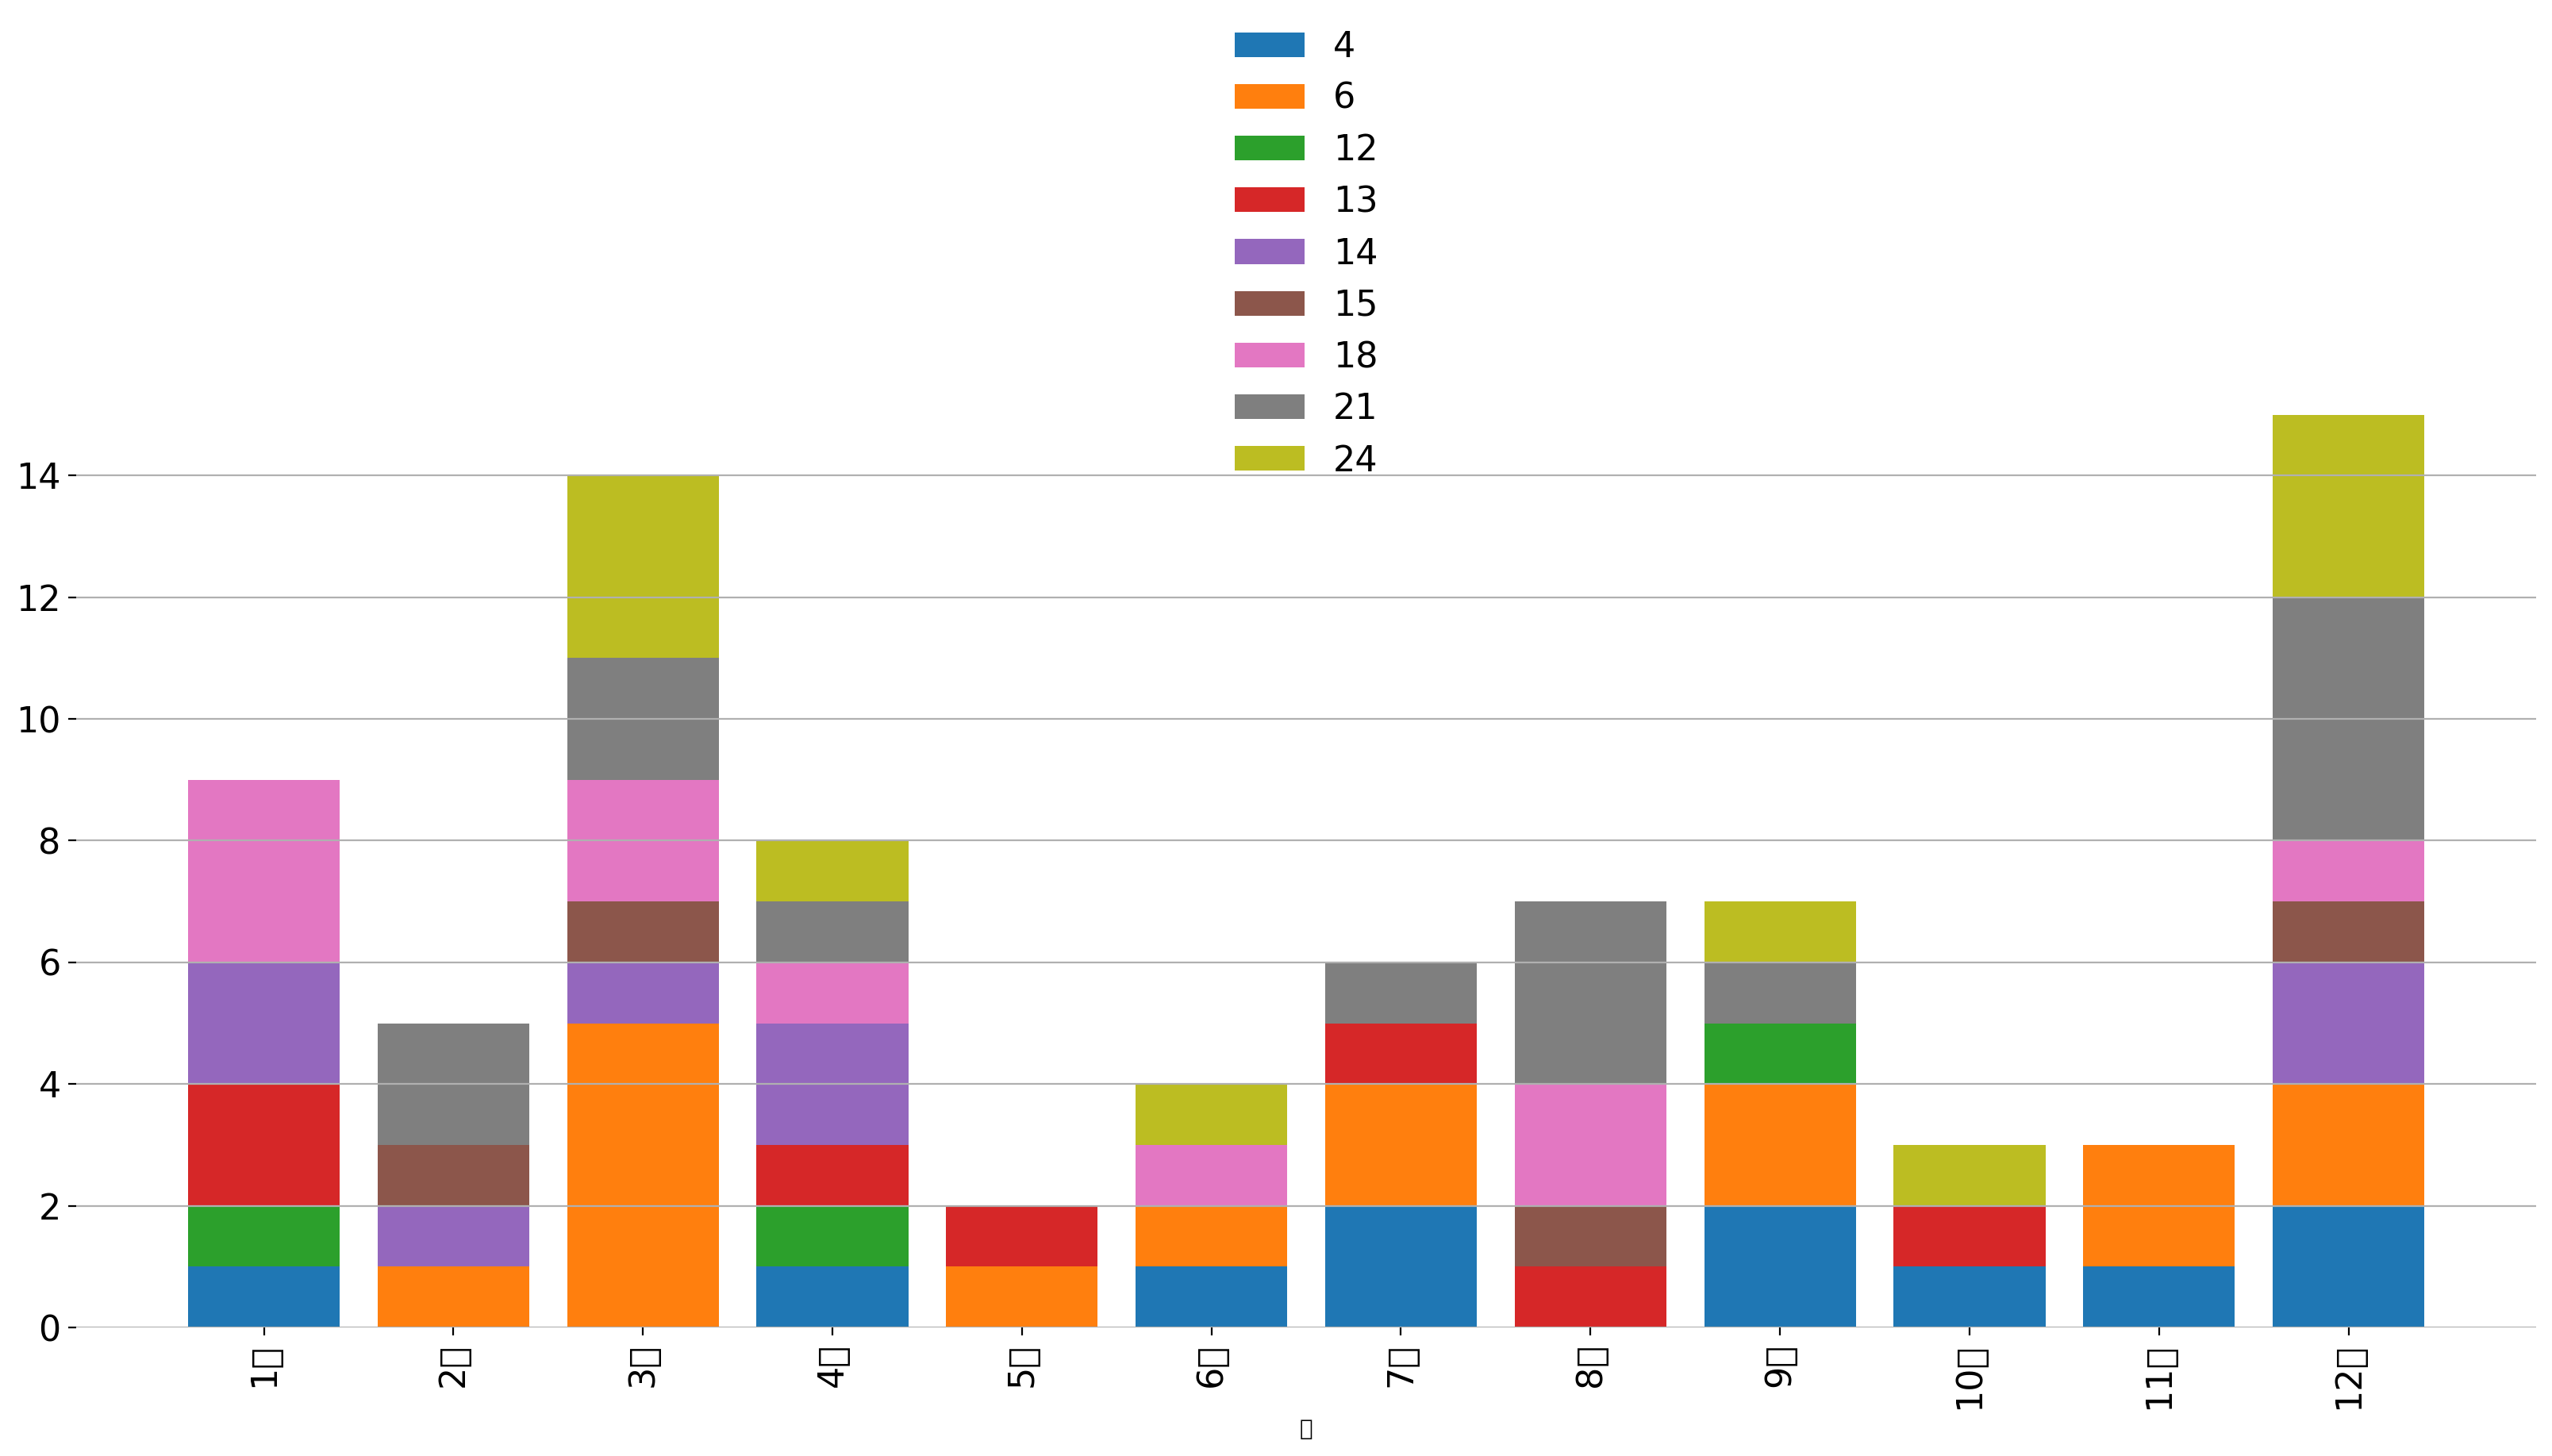

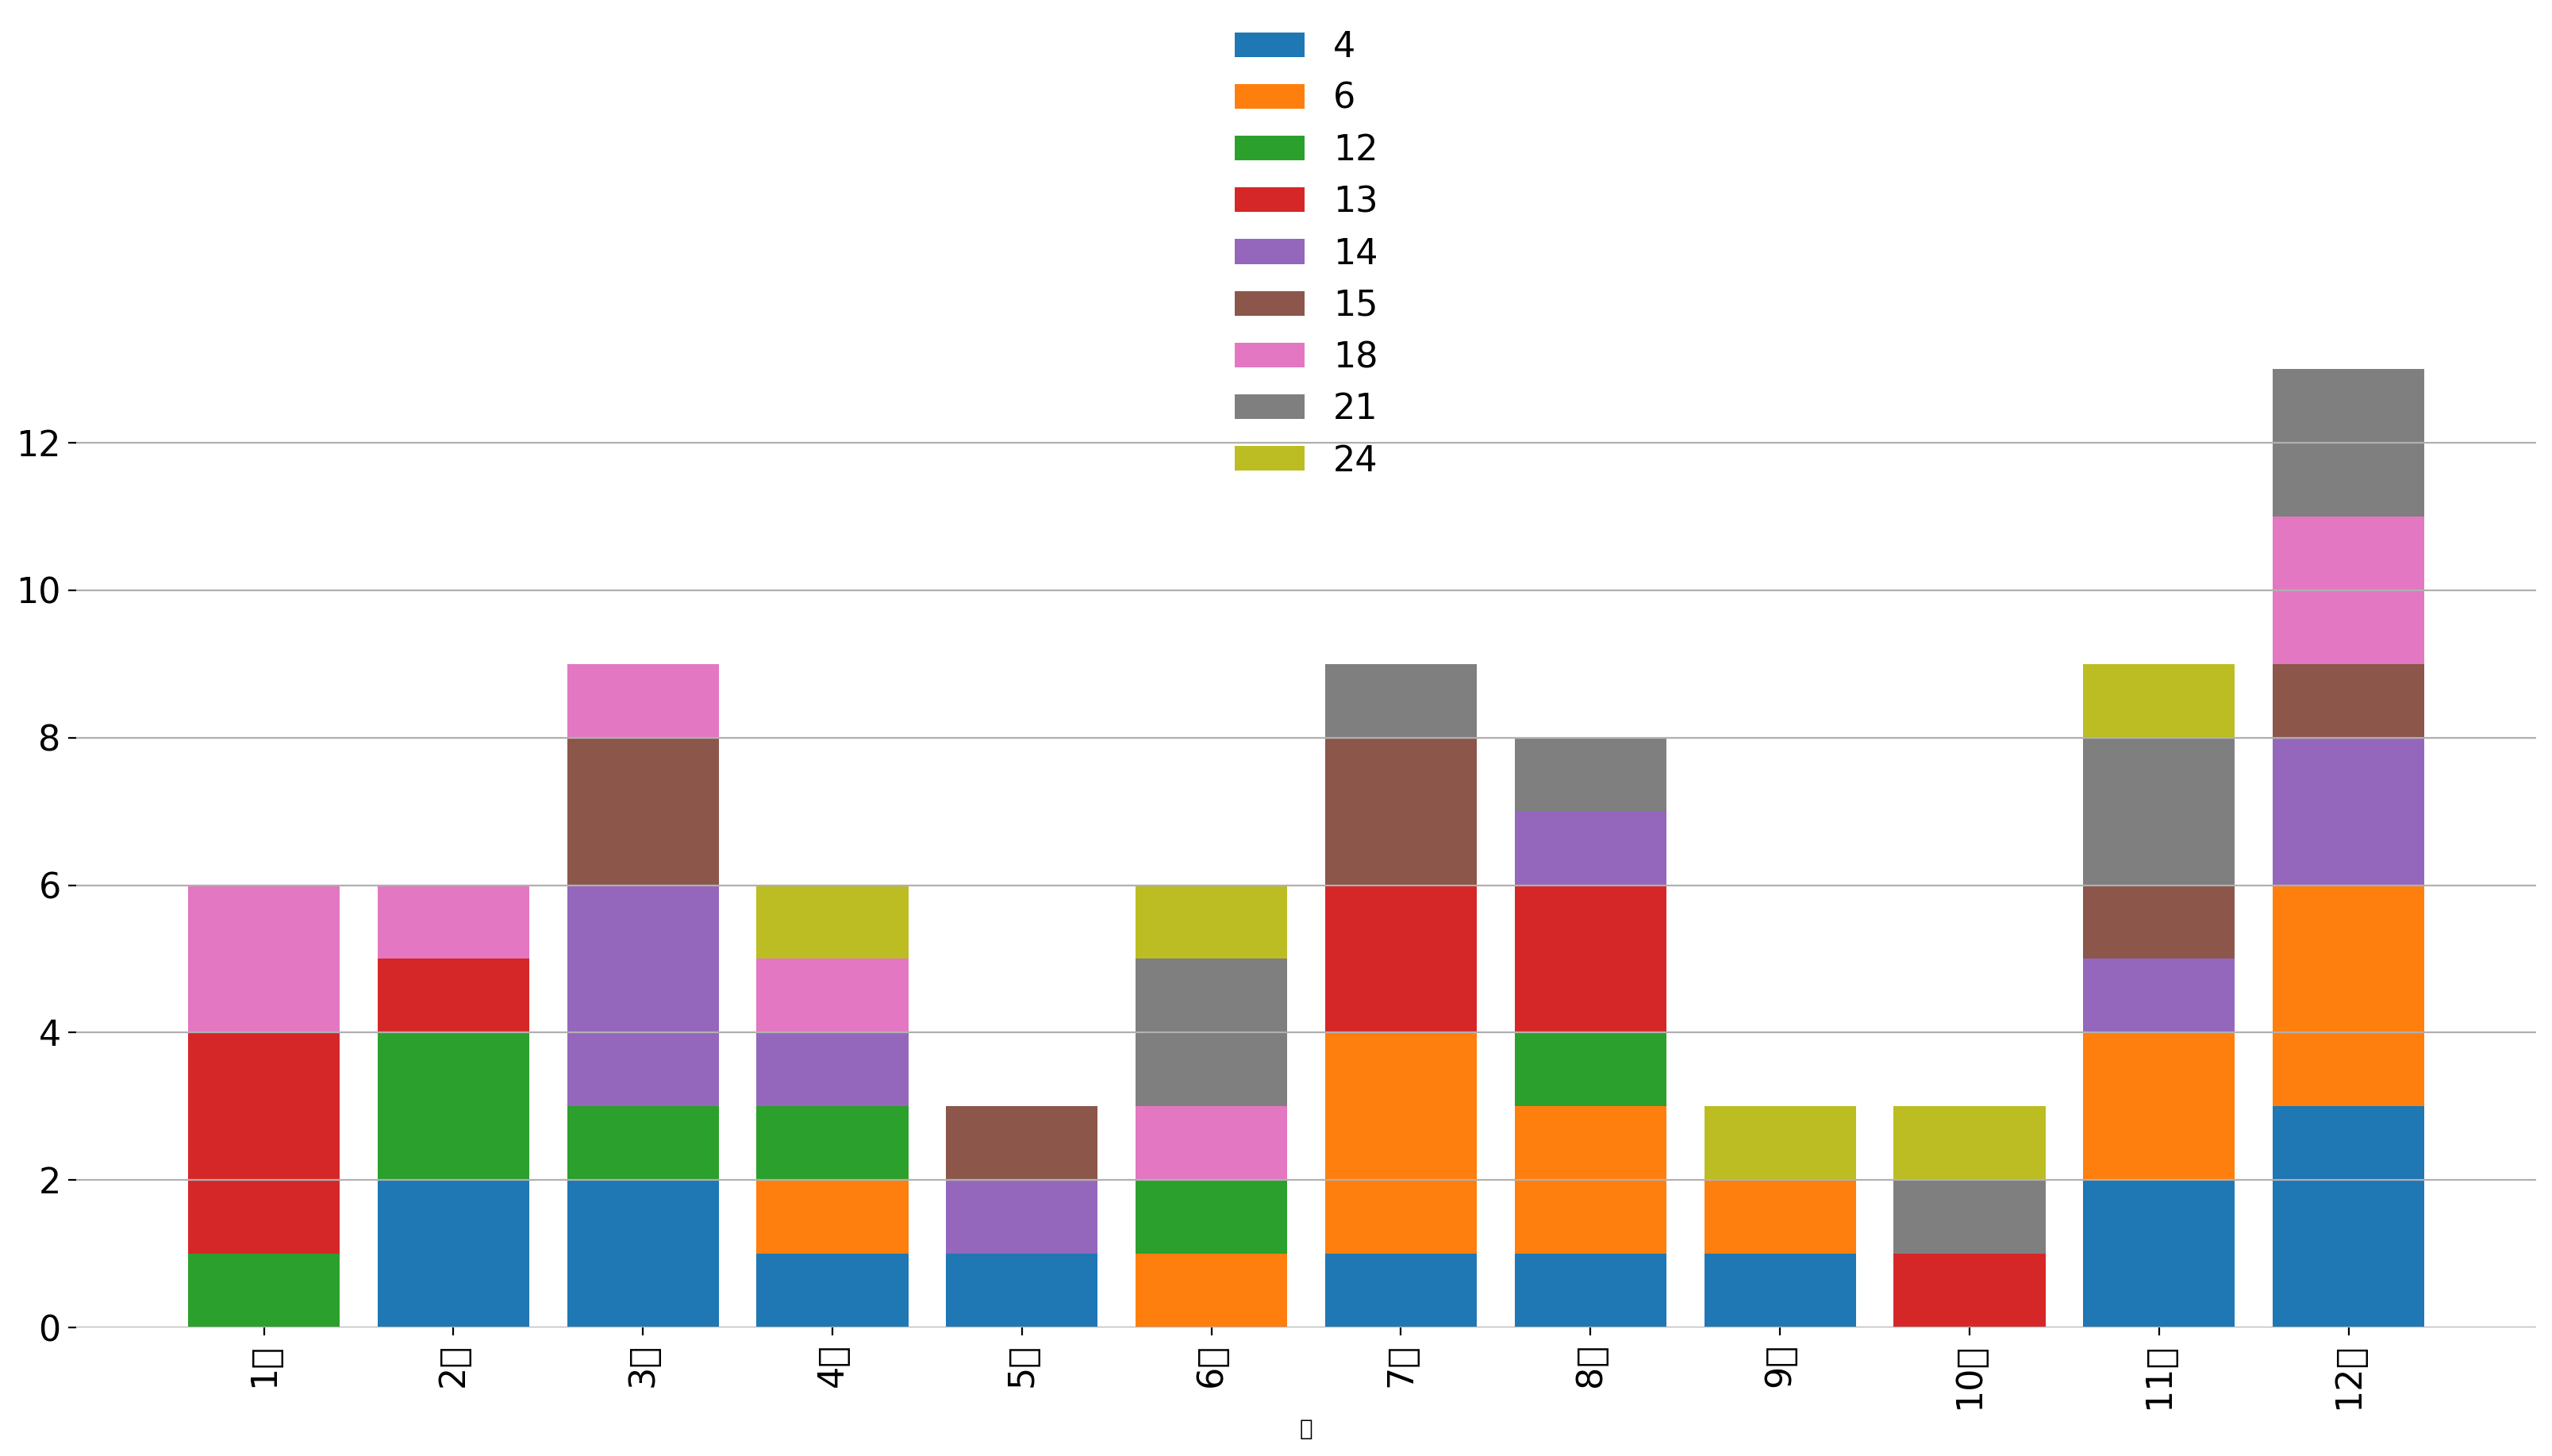

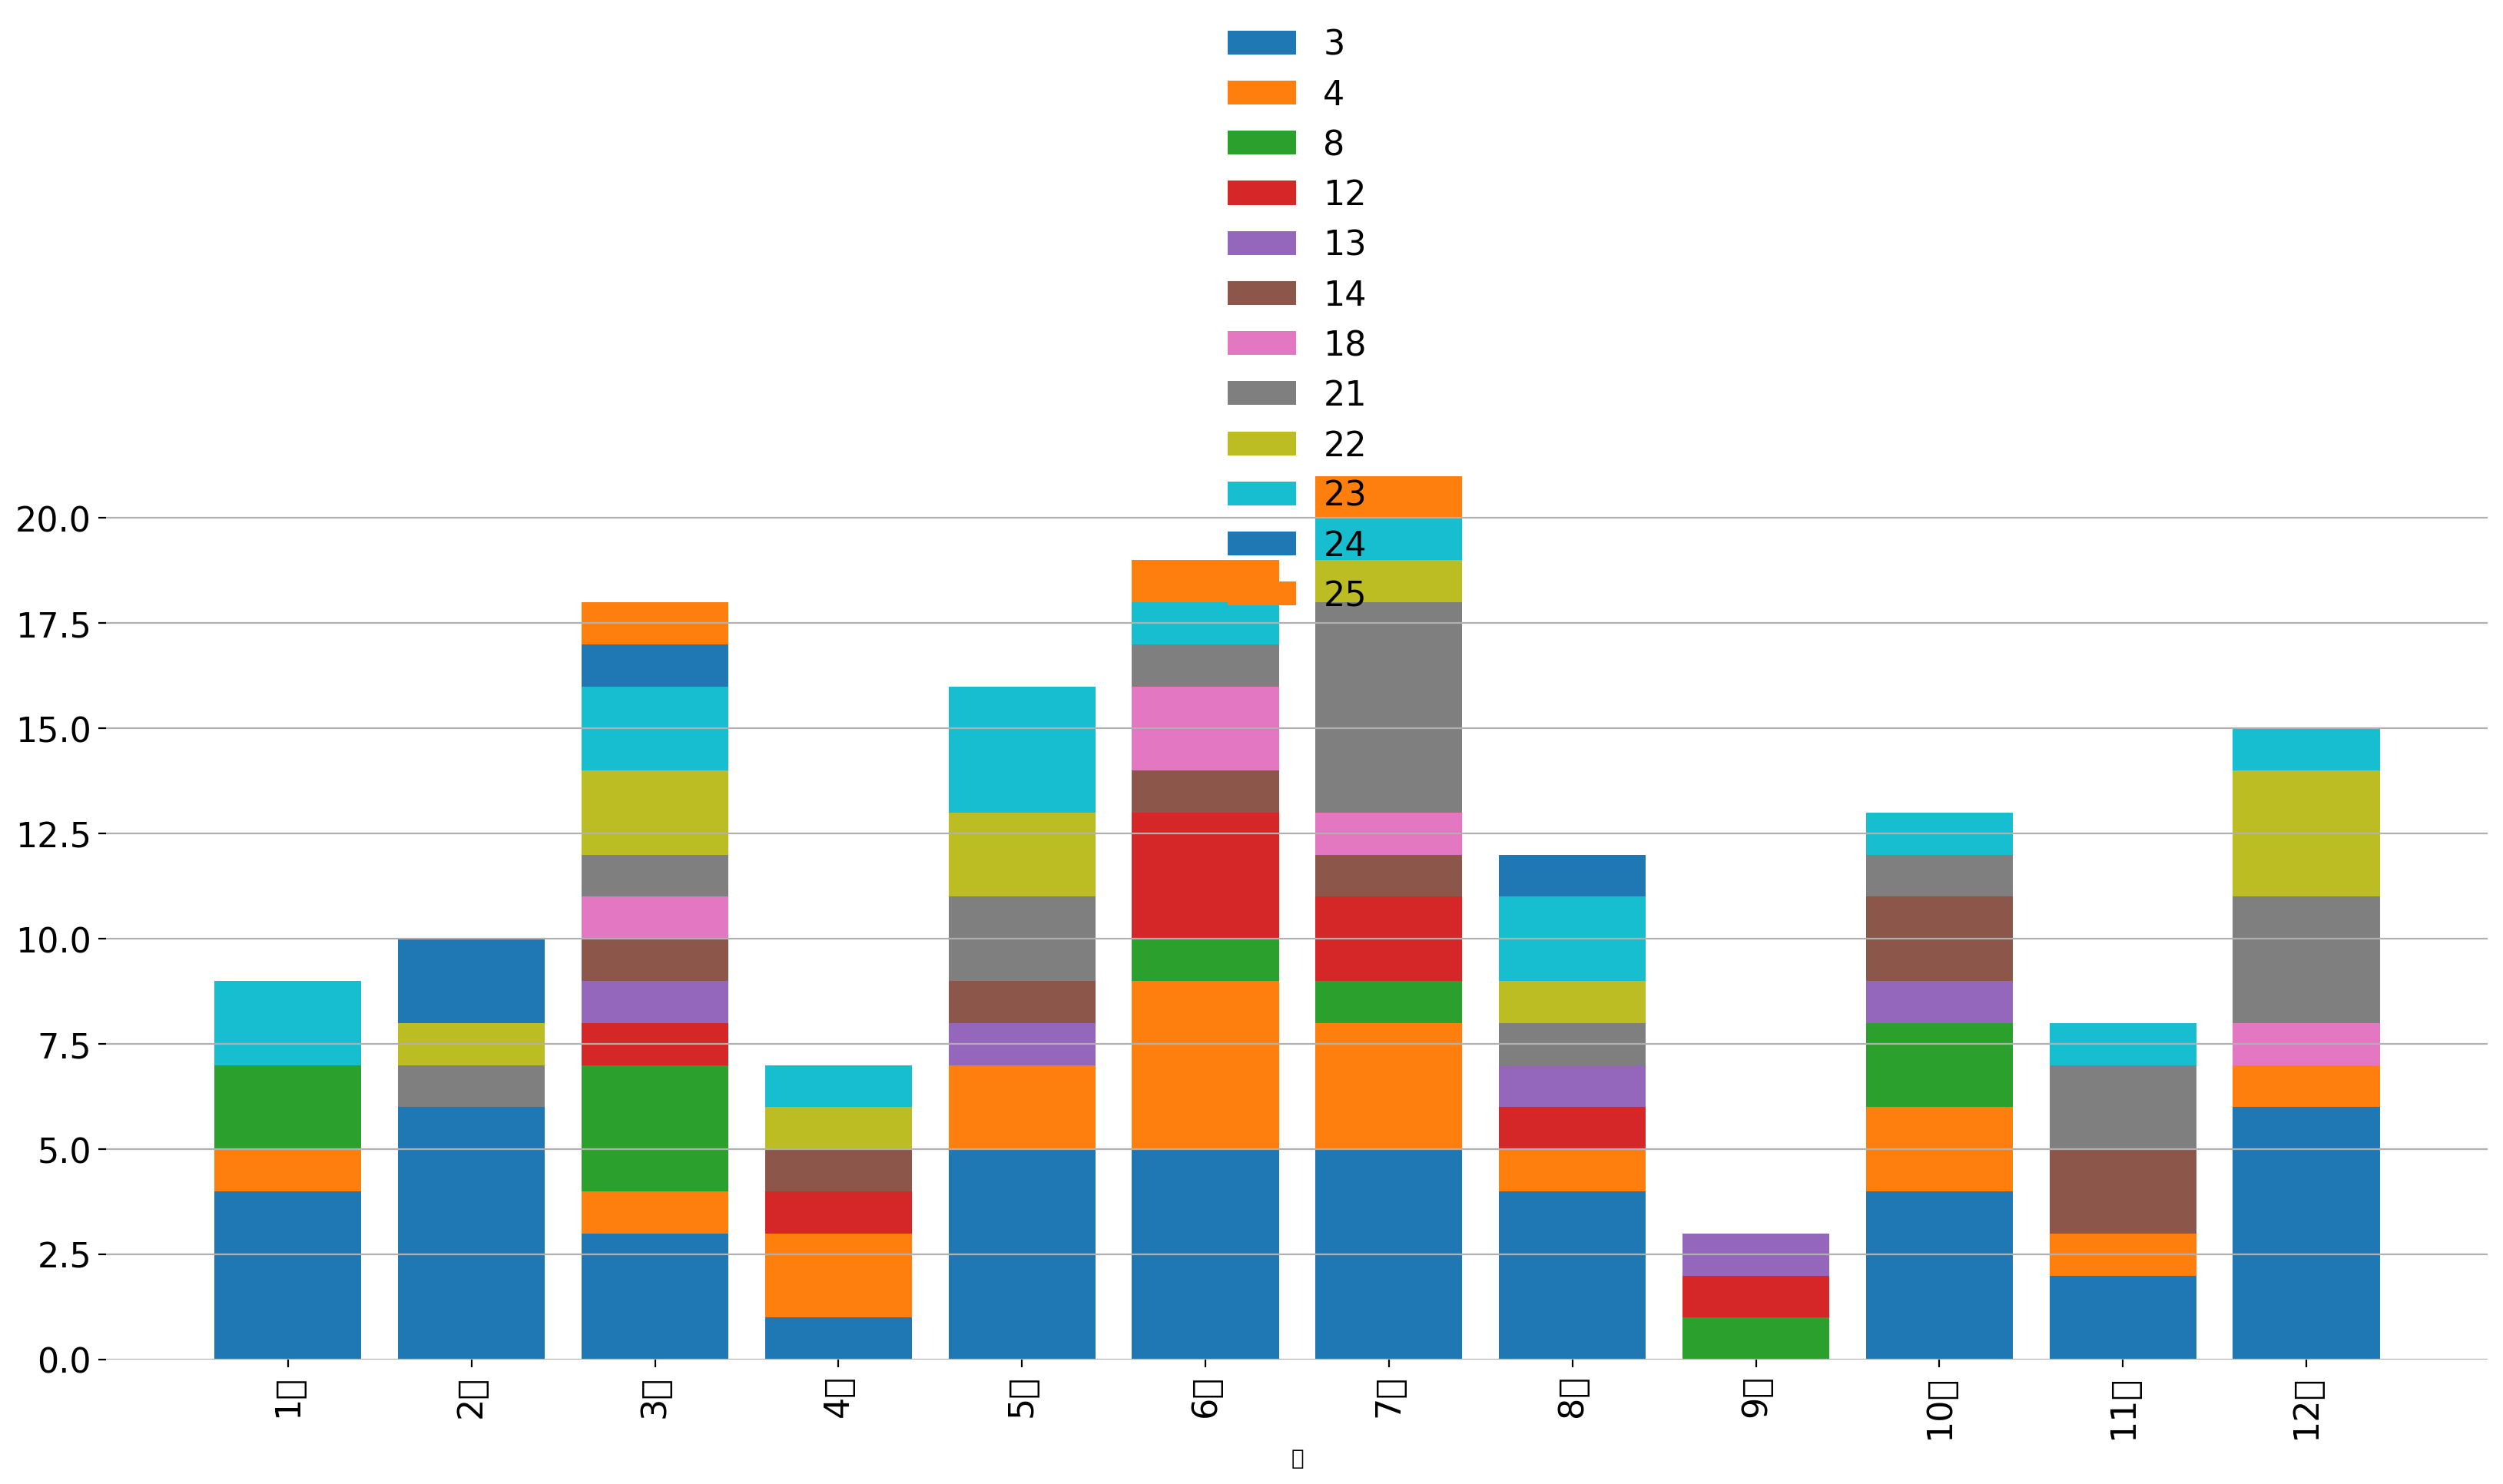

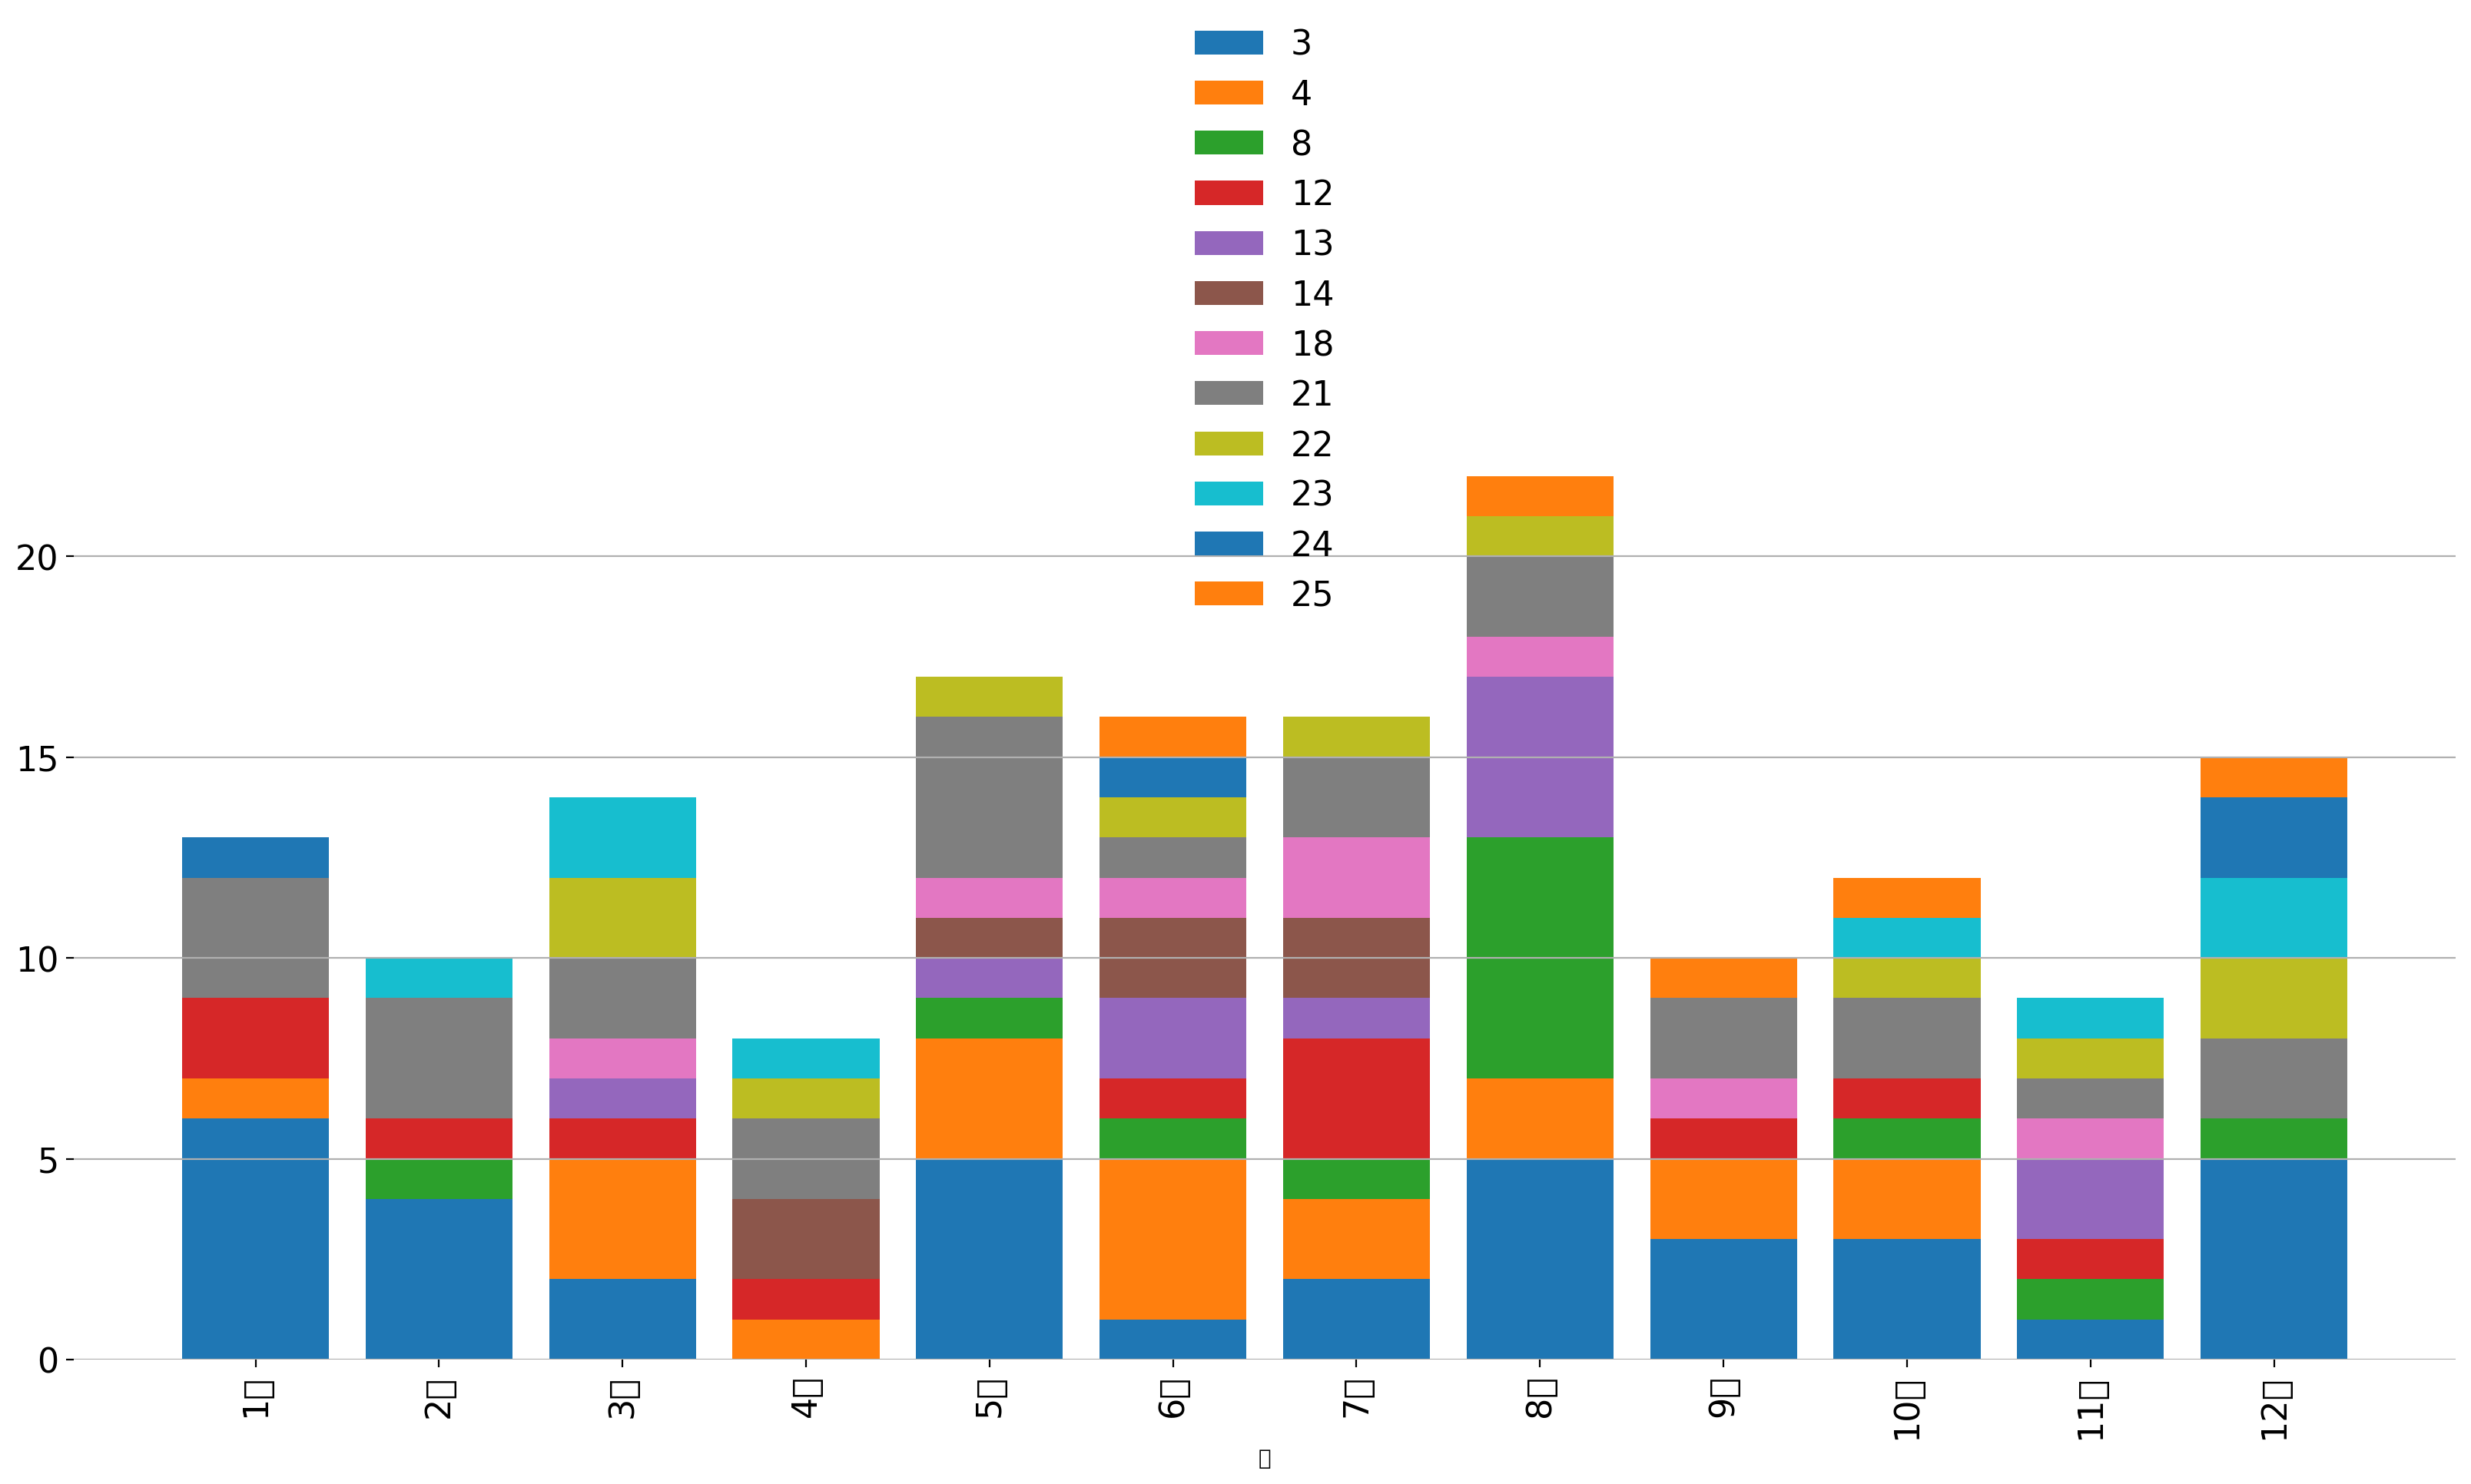

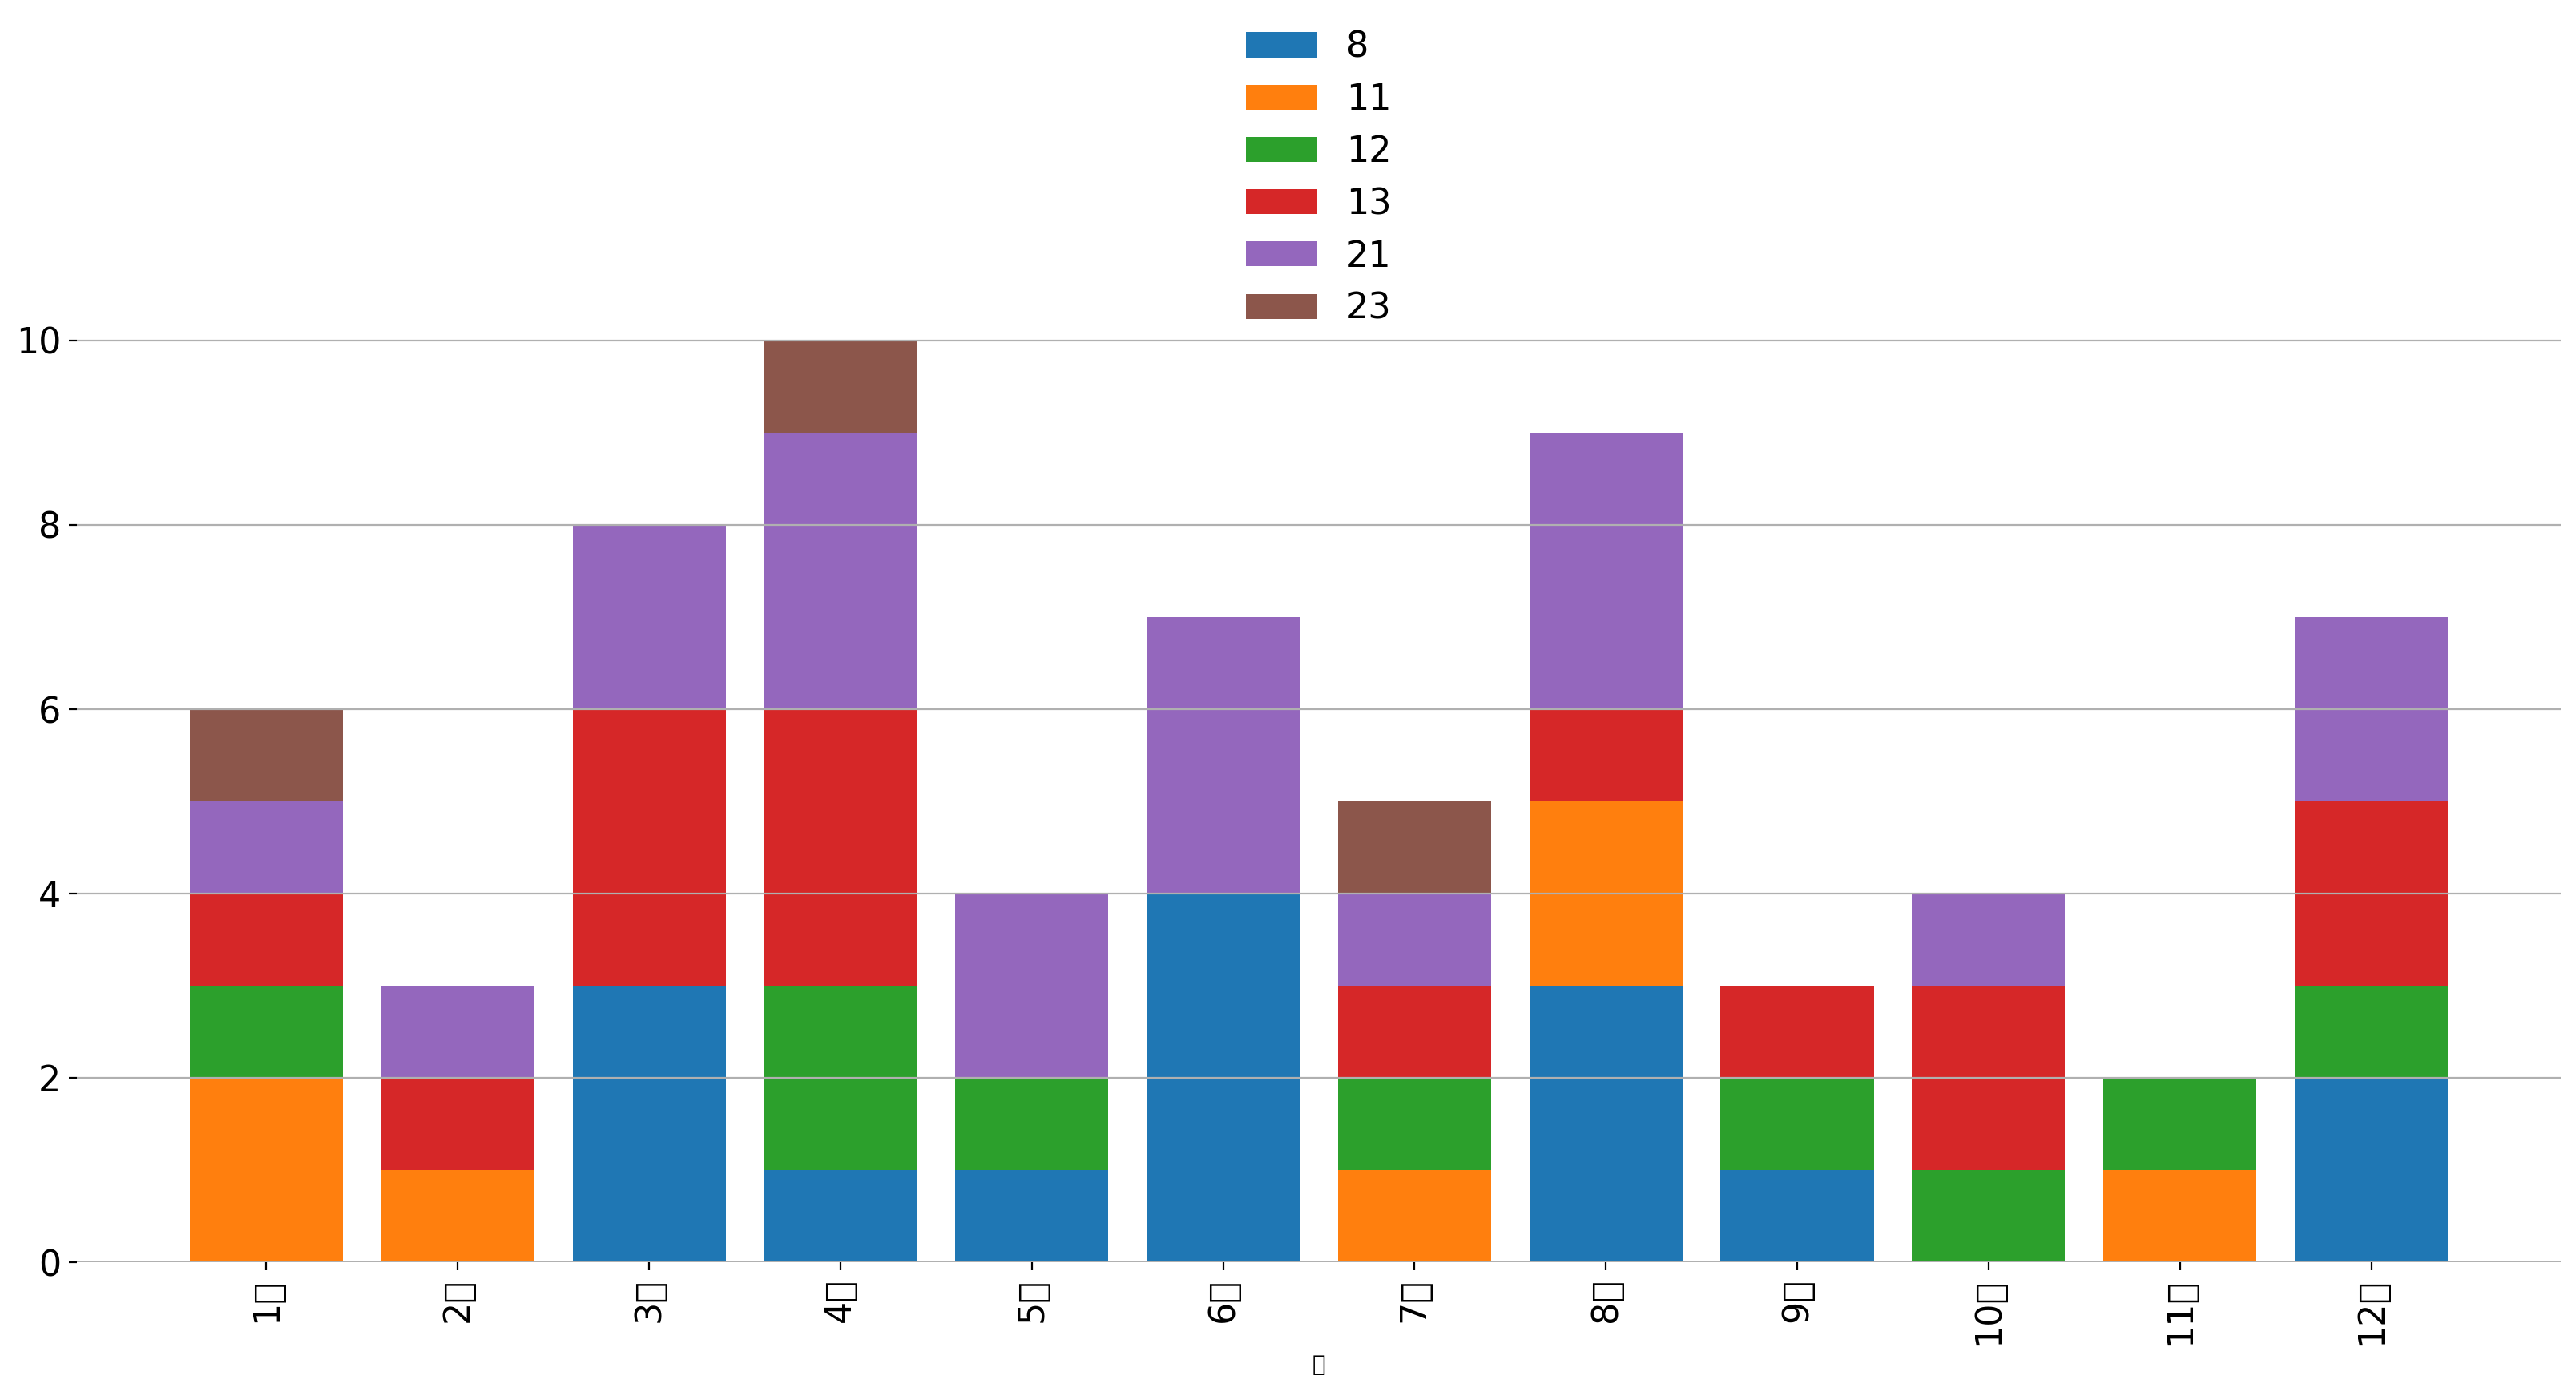

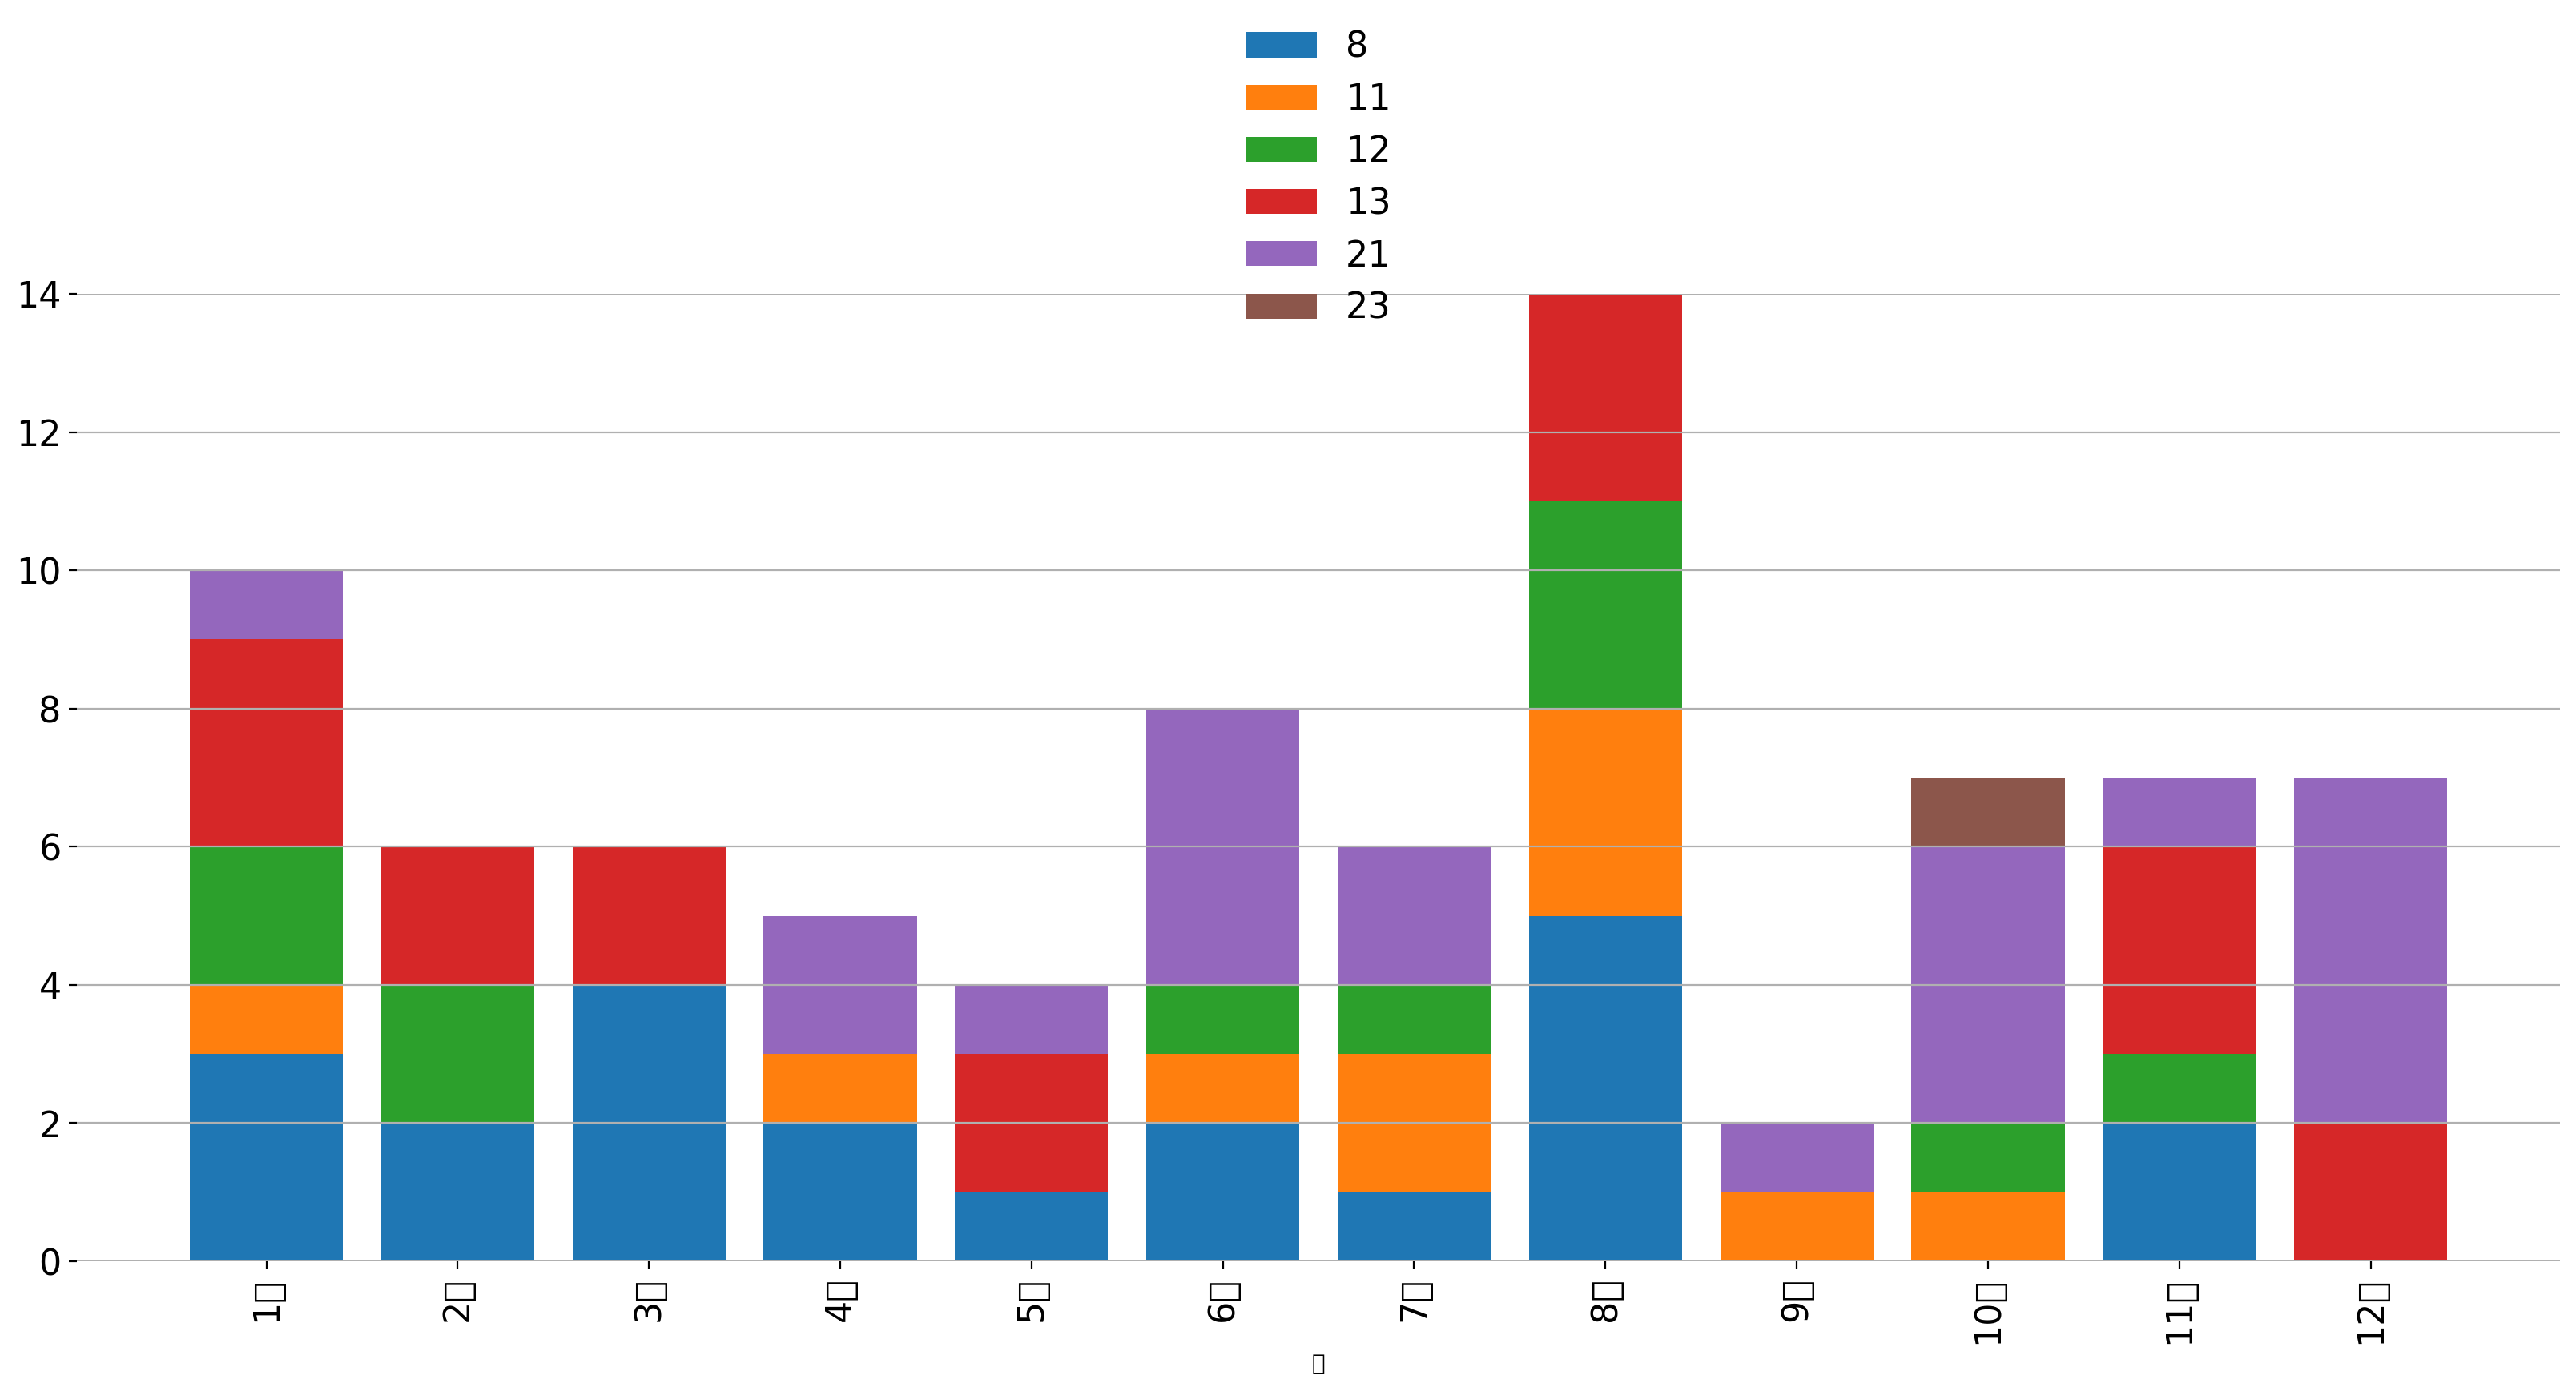

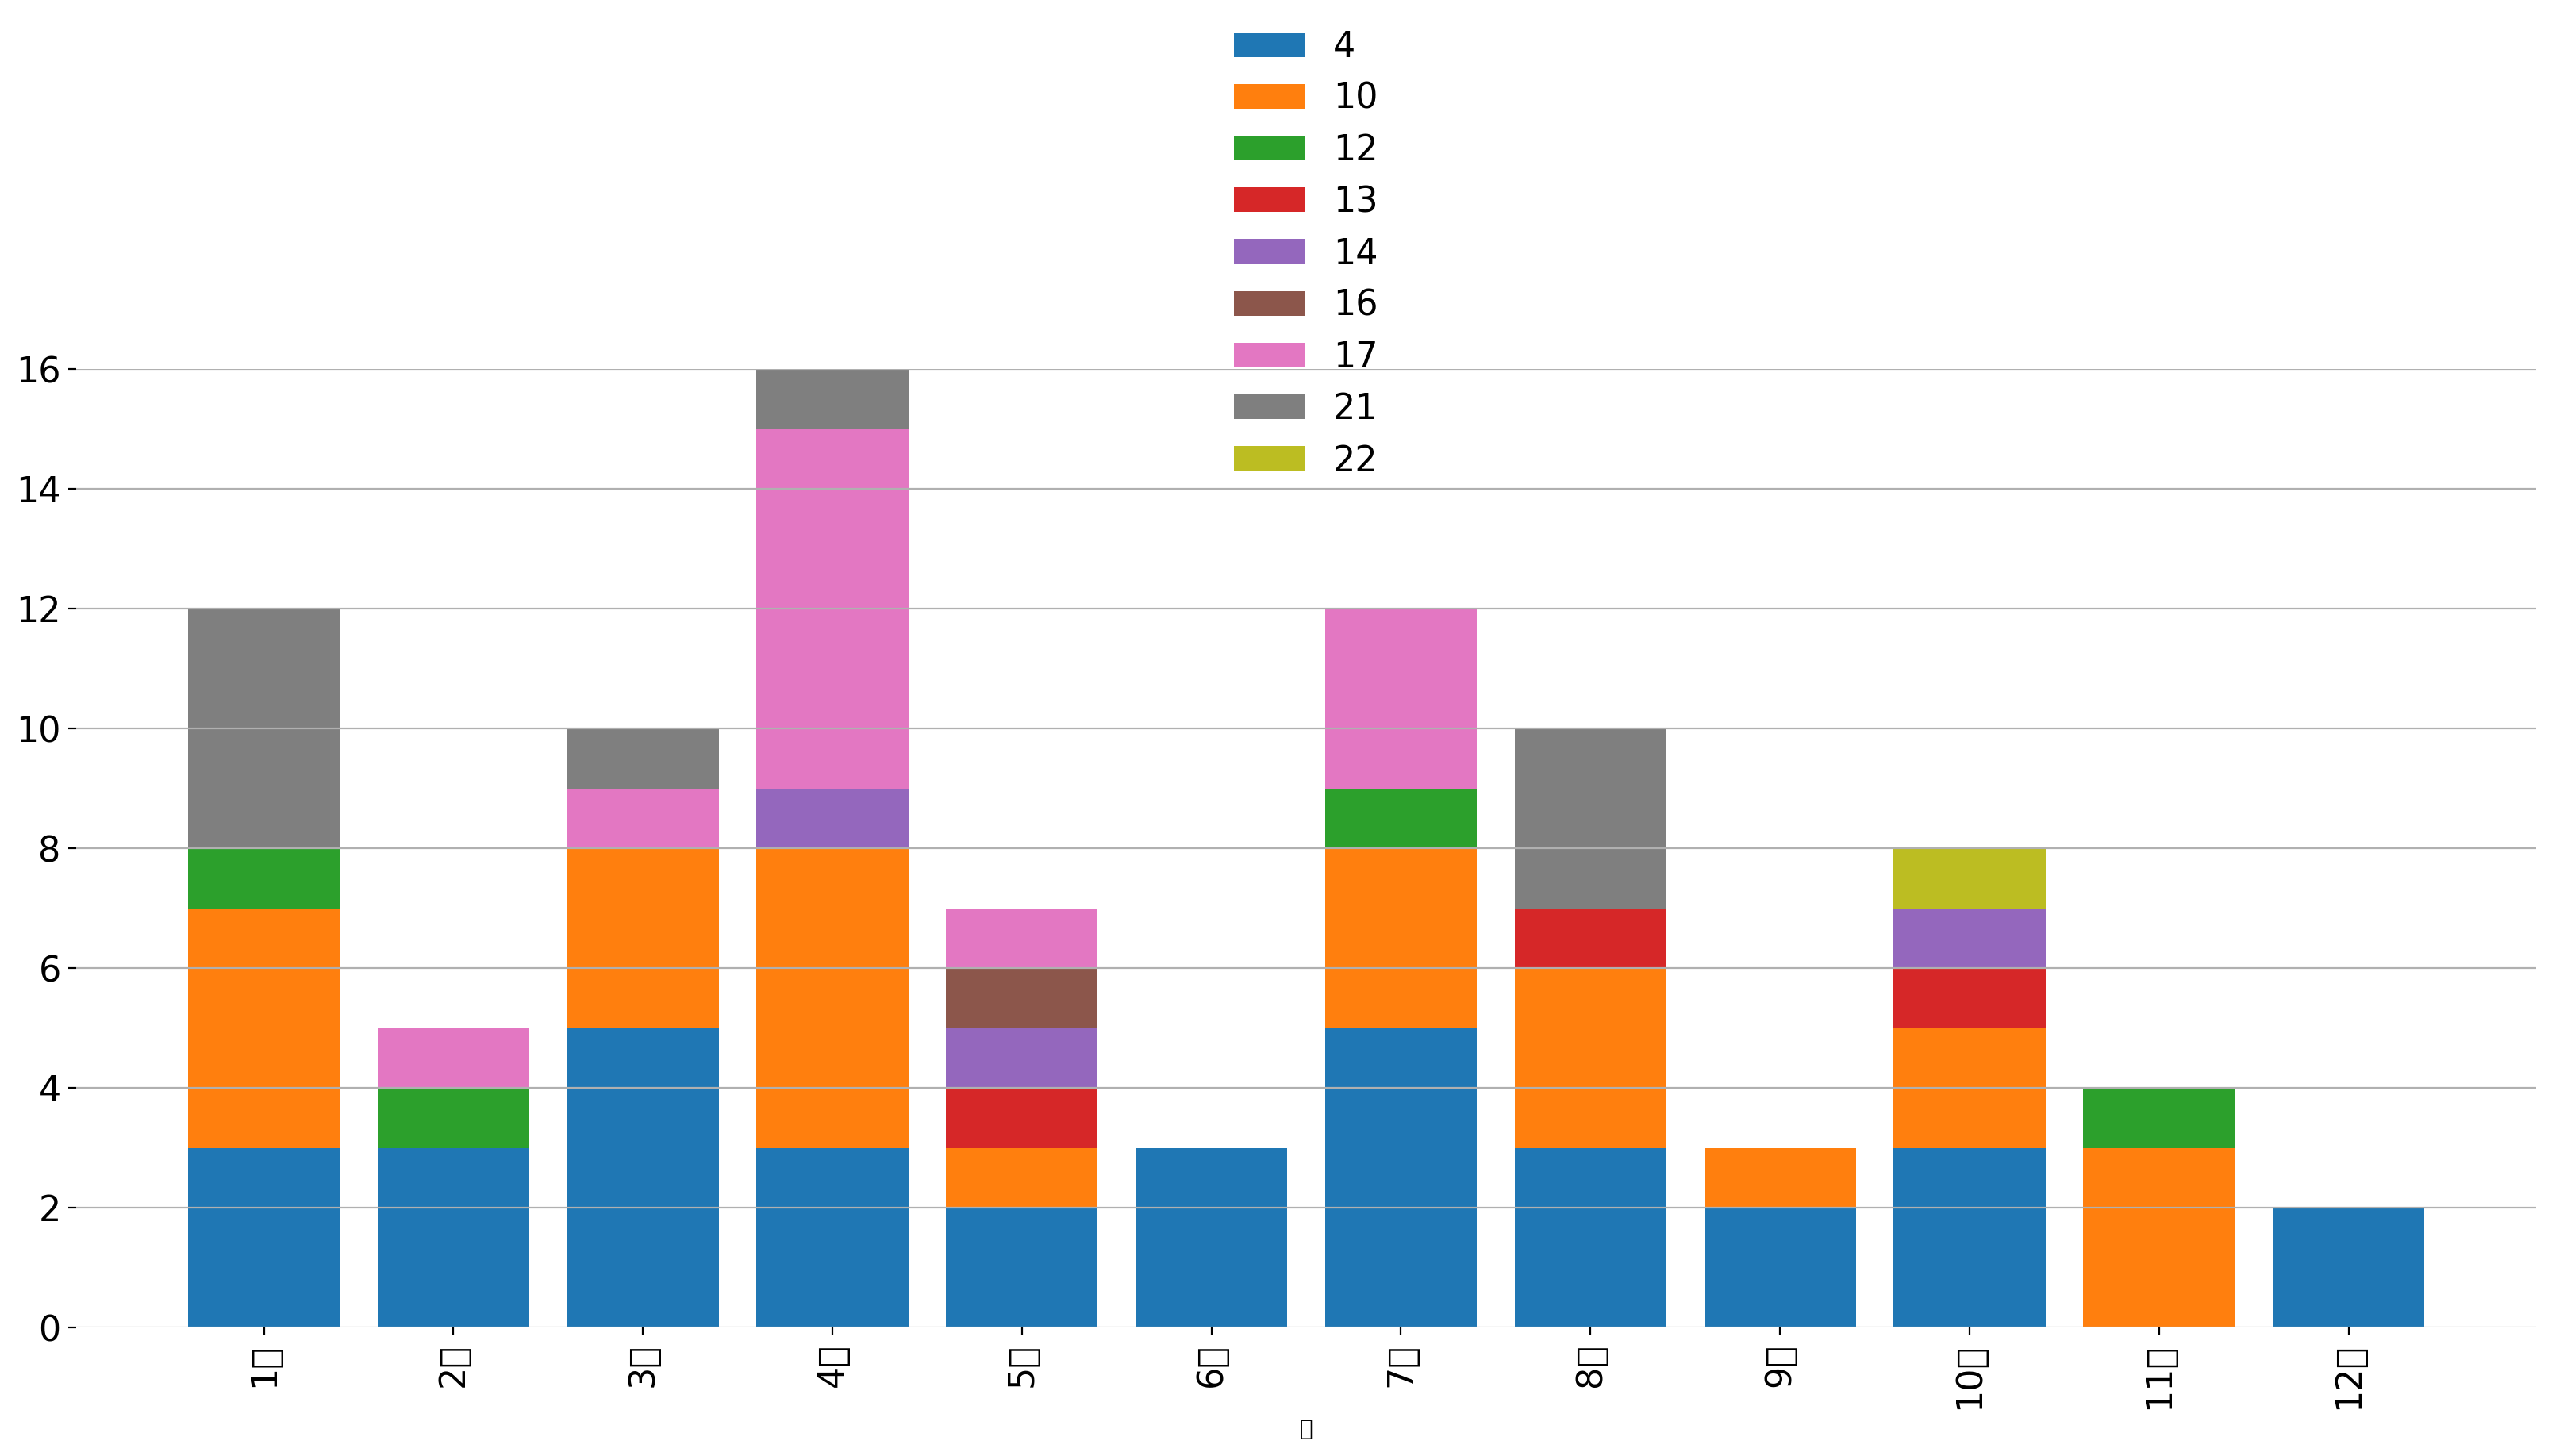

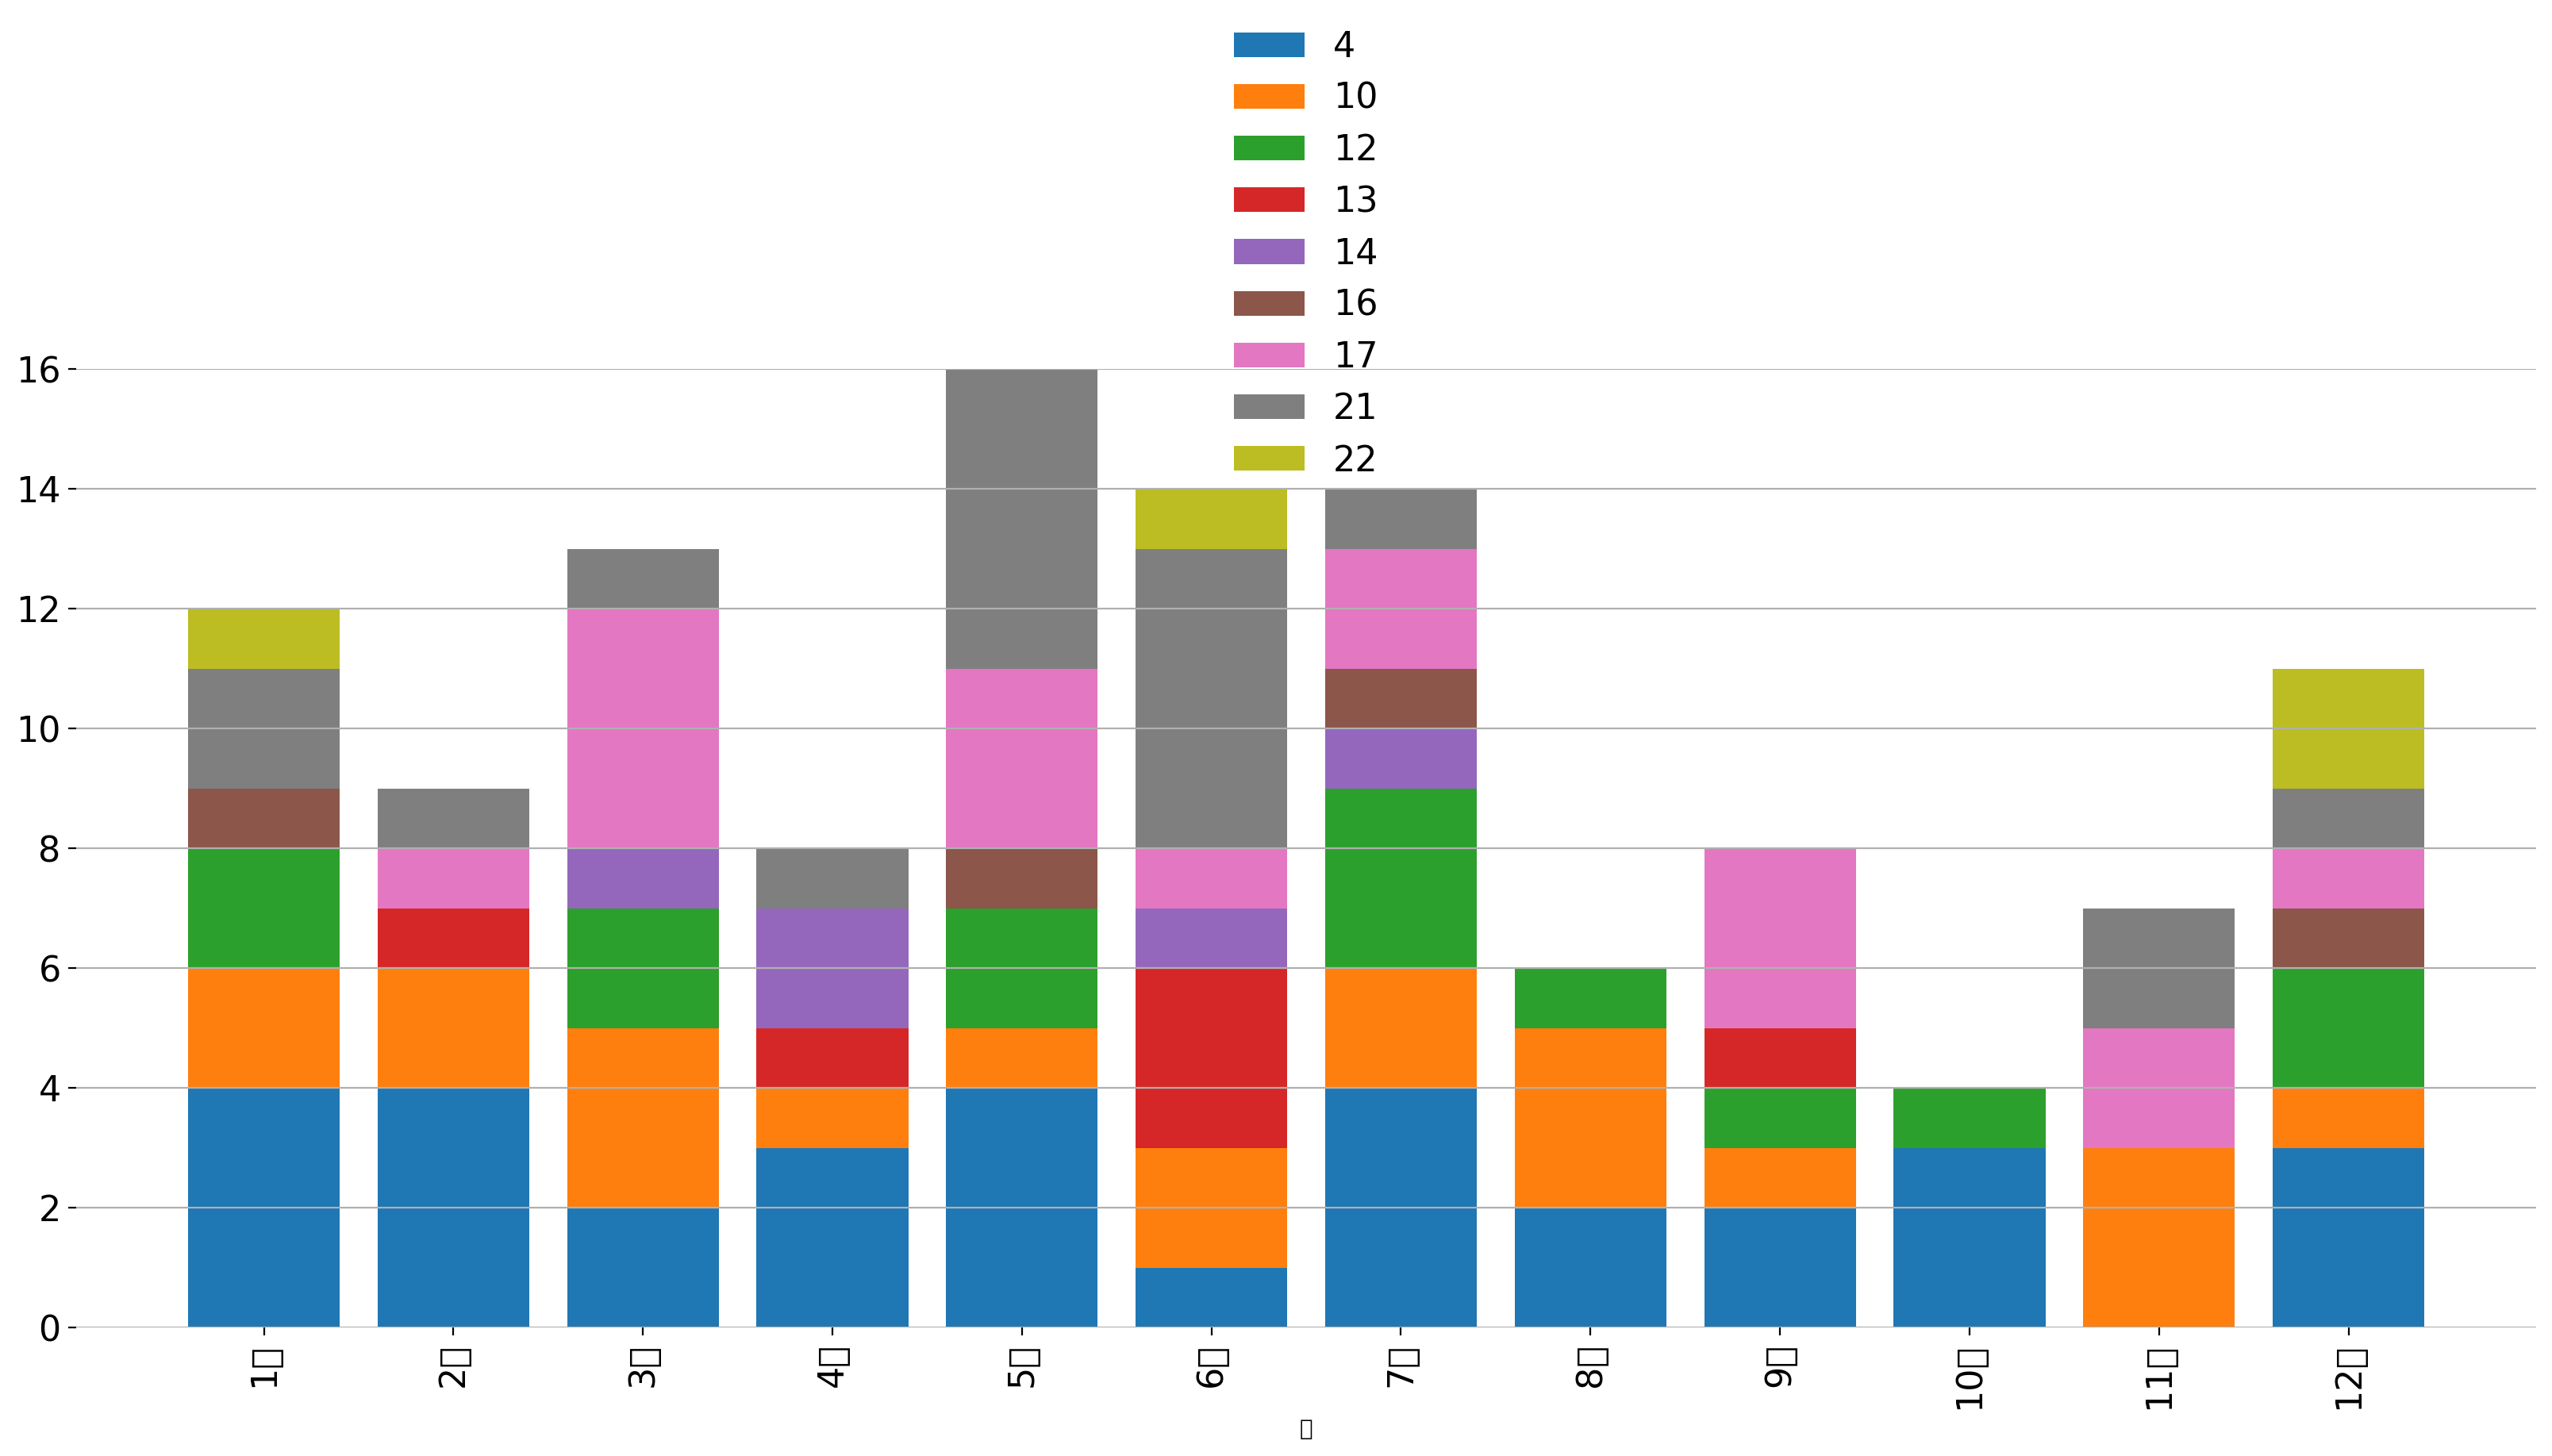

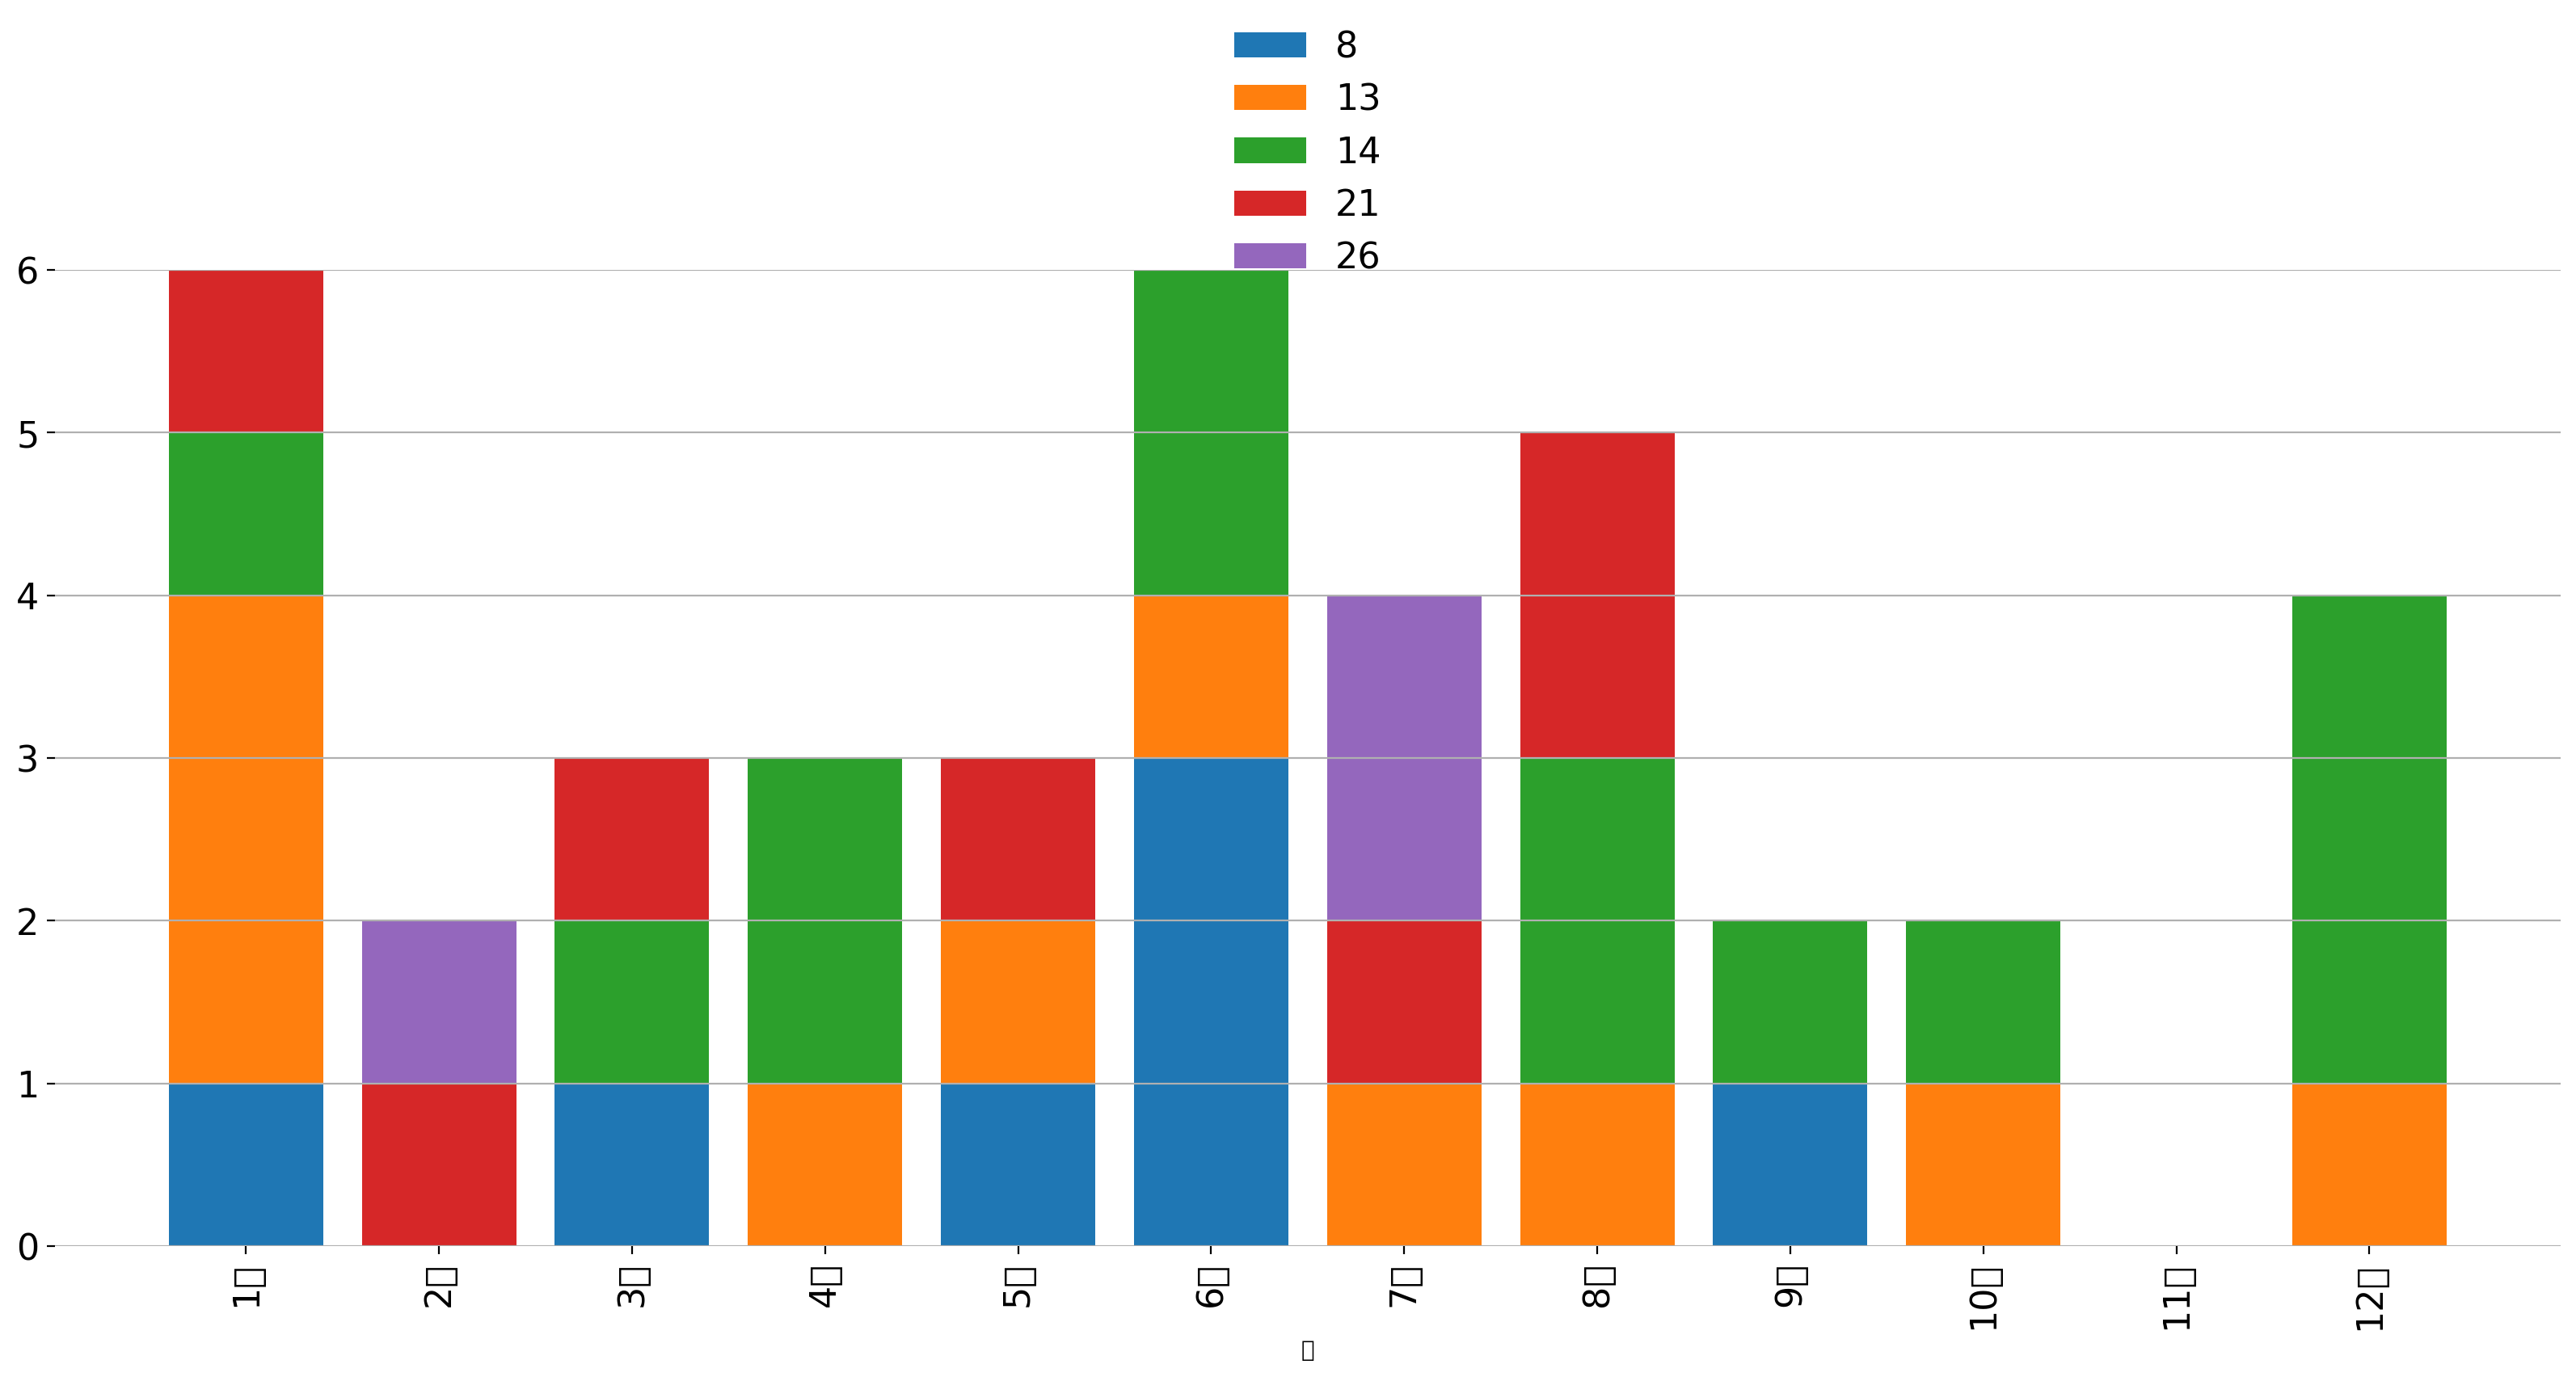

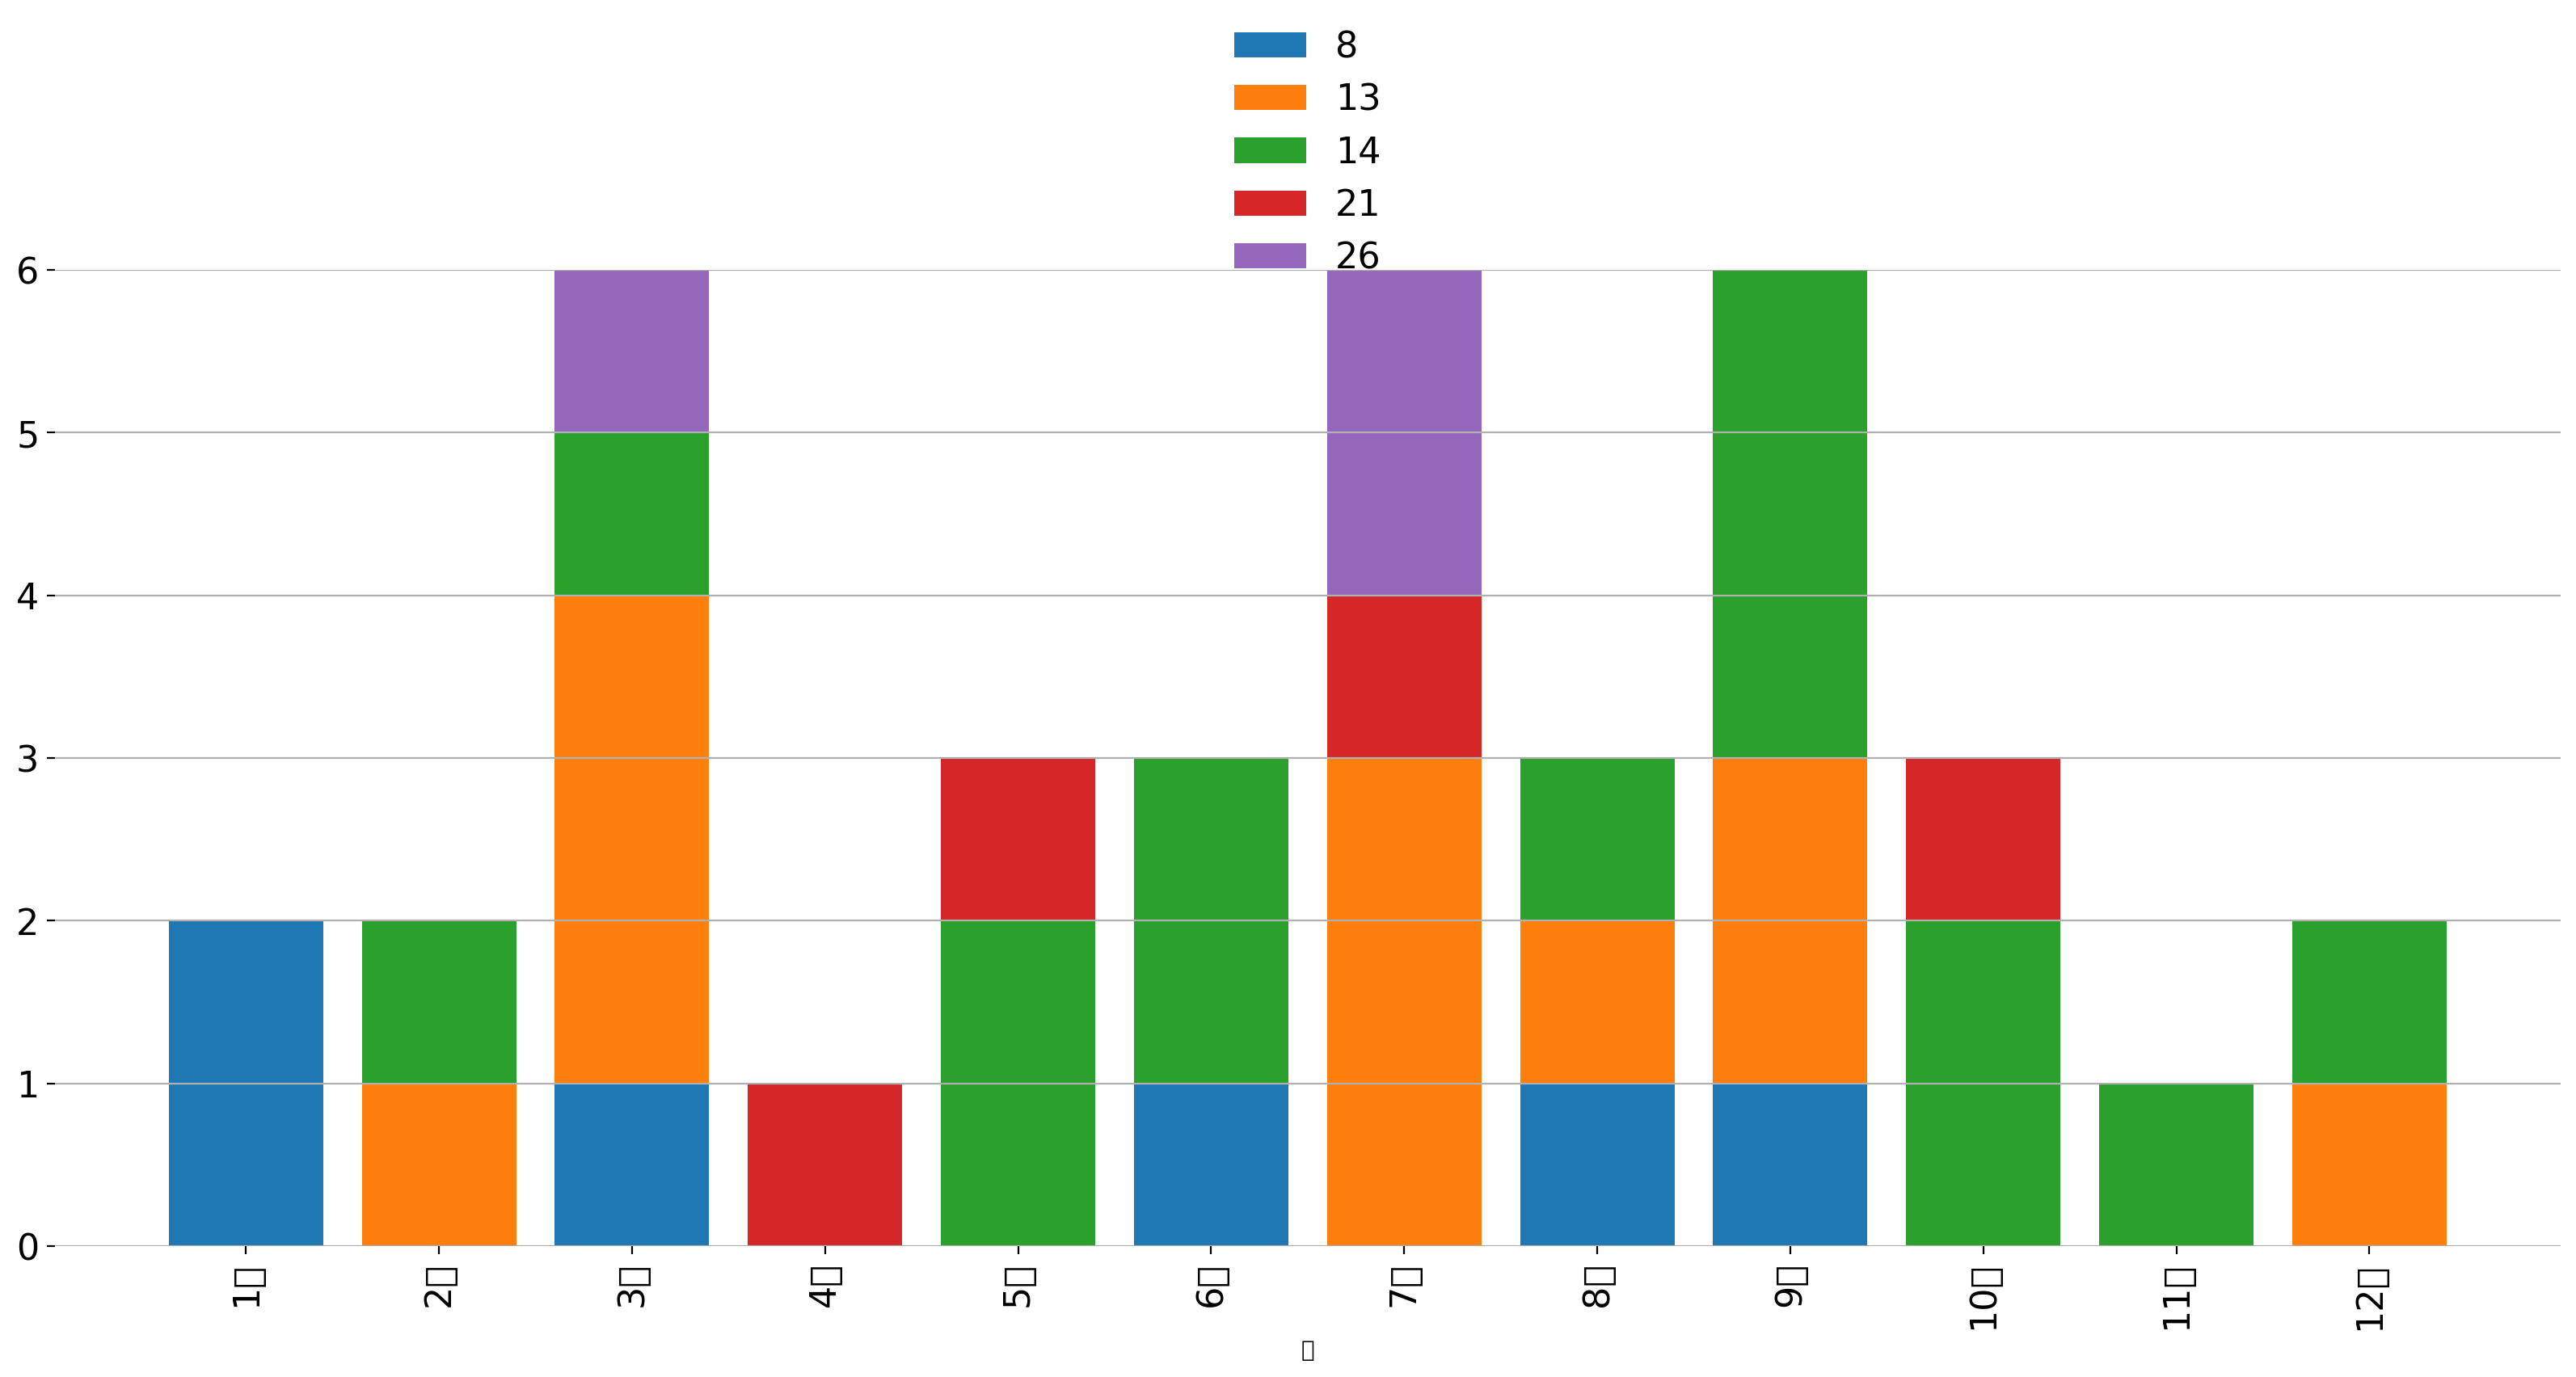

In [5]:
years=[2019,2020]
#データ格納用のディレクトリ作り
version='V2_2'#バージョン


place_master=master.get_place_master()
for place in tqdm(place_master.items()):
    place_name=place[1]
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    ################################################========================================================================================================================
    #各会場の成績の良かったモデルのスコアの読み込み
    dir_path = "../bot_database/{place_name}/{place_name}_train/train_{place_name}.csv".format(place_name=place_name)#学習のためのベースになるリザルトデータ
    result_base_df=pd.read_csv(dir_path)
    result_base_df=result_base_df.drop(["Unnamed: 0"],axis=1)

    model_dir_path = "../bot_database/{place_name}/model_score_{place_name}/use_model/use_model_{place_name}_{V}.csv".format(place_name=place_name,V=version)#使用するモデルのパラメータ読み込み
    use_model_df=pd.read_csv(model_dir_path)
    use_model_df=use_model_df.drop(["Unnamed: 0"],axis=1)
    
    
    for year in years:
        
        analysis.ym_analysis_rondom(result_base_df,use_model_df,place_name,version,year)
    
    print("=====================================================================================")
    
    
    #model_analysis.use_model_para(good_score_df,place_name,version)



In [3]:
for col in result_base_df.columns:
    print(col,' : ',result_base_df[col].dtypes)

date  :  object
result_com  :  int64
money  :  float64
number_race  :  int64
racer_1_ID  :  int64
racer_2_ID  :  int64
racer_3_ID  :  int64
racer_4_ID  :  int64
racer_5_ID  :  int64
racer_6_ID  :  int64
racer_1_rank  :  int64
racer_1_male  :  int64
racer_1_age  :  float64
racer_1_doub  :  float64
racer_1_ave_st  :  float64
racer_2_rank  :  int64
racer_2_male  :  int64
racer_2_age  :  float64
racer_2_doub  :  float64
racer_2_ave_st  :  float64
racer_3_rank  :  int64
racer_3_male  :  int64
racer_3_age  :  float64
racer_3_doub  :  float64
racer_3_ave_st  :  float64
racer_4_rank  :  int64
racer_4_male  :  int64
racer_4_age  :  float64
racer_4_doub  :  float64
racer_4_ave_st  :  float64
racer_5_rank  :  int64
racer_5_male  :  int64
racer_5_age  :  float64
racer_5_doub  :  float64
racer_5_ave_st  :  float64
racer_6_rank  :  int64
racer_6_male  :  int64
racer_6_age  :  float64
racer_6_doub  :  float64
racer_6_ave_st  :  float64
racer_1_bo  :  float64
racer_1_mo  :  float64
racer_2_bo  :  floa

In [4]:
dir_path = "../bot_database/{place_name}/{place_name}_train/train_{place_name}.csv".format(place_name=place_name)#学習のためのベースになるリザルトデータ
result_base_df=pd.read_csv(dir_path)
result_base_df=result_base_df.drop(["Unnamed: 0"],axis=1)
result_base_df

,date,result_com,money,number_race,racer_1_ID,racer_2_ID,racer_3_ID,racer_4_ID,racer_5_ID,racer_6_ID,...,racer_2_bo,racer_2_mo,racer_3_bo,racer_3_mo,racer_4_bo,racer_4_mo,racer_5_bo,racer_5_mo,racer_6_bo,racer_6_mo
0,2012-04-01,41,3330.0,2,3419,3777,4201,3935,4595,4531,...,30.0,26.0,32.0,34.0,56.0,55.0,20.0,24.0,46.0,48.0
1,2012-04-01,22,780.0,3,3044,3475,4054,3718,2843,4081,...,48.0,70.0,42.0,41.0,28.0,31.0,25.0,29.0,38.0,47.0
2,2012-04-01,68,1240.0,4,4169,3769,2874,3360,4488,3757,...,39.0,28.0,34.0,63.0,12.0,33.0,75.0,15.0,62.0,57.0
3,2012-04-01,68,2510.0,5,3739,4486,4521,3629,3892,3329,...,64.0,51.0,72.0,20.0,21.0,71.0,52.0,25.0,60.0,16.0
4,2012-04-01,1,830.0,7,3430,2787,4531,3596,4054,4068,...,13.0,40.0,46.0,48.0,66.0,44.0,42.0,41.0,55.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19083,2020-03-22,9,1340.0,8,4173,4091,3382,3448,3550,4327,...,36.0,45.0,15.0,65.0,68.0,80.0,66.0,62.0,49.0,76.0
19084,2020-03-22,29,8470.0,9,4180,4128,3741,4761,4581,5103,...,23.0,29.0,48.0,66.0,38.0,53.0,31.0,17.0,27.0,24.0
19085,2020-03-22,4,1220.0,10,4305,3463,4404,4802,3920,3505,...,45.0,58.0,11.0,38.0,64.0,50.0,72.0,15.0,62.0,46.0
19086,2020-03-22,5,840.0,11,4593,3997,4173,4756,4363,4382,...,24.0,67.0,71.0,78.0,65.0,51.0,75.0,32.0,47.0,42.0


In [4]:
val=0/0

ZeroDivisionError: division by zero